# F21DL | ML and Data Science Portfolio
Name: Gayathri Girish Nair

# Table Of Contents
* [Imports](#Imports)
* [Utility Functions](#Utility-Functions)
* [1. Getting Data](#1.-Getting-Data)
    * [1.1. Dataset Chosen & Reason For Choice](#1.1.-Dataset-Chosen-&-Reason-For-Choice)
    * [1.2. Dataset Contents](#1.2.-Dataset-Contents)
    * [1.3. Saving To .csv](#1.3.-Saving-To-.csv)
* [2. Exploratory Data Analysis (EDA) & Preprocessing](#2.-Exploratory-Data-Analysis-(EDA)-&-Preprocessing)
    * [2.1. Checking For Missing Data](#2.1.-Checking-For-Missing-Data)
    * [2.2. Attribute Types & Management](#2.2.-Attribute-Types-&-Management)
    * [2.3. Saving Augmented Dataset](#2.3.-Saving-Augmented-Dataset)
    * [2.4. Qualitative Data Frequency Distribution](#2.4.-Qualitative-Data-Frequency-Distribution)
    * [2.5. Handling Categorical Data](#2.5.-Handling-Categorical-Data)
    * [2.6. Checking for Outliers](#2.6.-Checking-for-Outliers)
    * [2.7. Quantitative Data Distribution](#2.7.-Quantitative-Data-Distribution)
        * [2.7.1. Handling Skewness](#2.7.1.-Handling-Skewness)
    * [2.8. Normalization](#2.8.-Normalization)
* [3. Checking For Correlation](#3.-Checking-For-Correlation)
* [4. Class Attribute & Feature Selection](#4.-Class-Attribute-&-Feature-Selection)
    * [4.1. Per Class Correlation Analysis](#4.1.-Per-Class-Correlation-Analysis)
* [5. Classifier Performance Evaluation Functions](#5.-Classifier-Performance-Evaluation-Functions)
* [6. Naive Bayes Classifier](#6.-Naive-Bayes-Classifier)
    * [6.1. Feature Selection Using Another Univariate Method: SelectKBest](#6.1.-Feature-Selection-Using-Another-Univariate-Method:-SelectKBest)
* [7. Clustering](#7.-Clustering)
    * [7.1. Scaling & Standardization](#7.1.-Scaling-&-Standardization)
    * [7.2.Visualizing Clusters](#7.2.-Visualizing-Clusters)
    * [7.3. Clustering Evaluation](#7.3.-Clustering-Evaluation)
    * [7.4. Hard Clustering: K-Means Clustering](#7.4.-Hard-Clustering:-K-Means-Clustering)
        * [7.4.1. Variability Problem](#7.4.1.-Variability-Problem)
        * [7.4.2. Optimal k Problem](#7.4.2.-Optimal-k-Problem)
        * [7.4.3. Spherical Clusters Problem](#7.4.3.-Spherical-Clusters-Problem)
    * [7.5. Soft Clustering: GMM](#7.5.-Soft-Clustering:-GMM)
    * [7.6. Soft Clustering: DBSCAN](#7.6.-Soft-Clustering:-DBSCAN)
    * [7.7. Predicting Clusters](#7.7.-Predicting-Clusters)
    * [7.8. Hillshade_Avg Experiment](#7.8.-Hillshade_Avg-Experiment)
* [8. Decision Trees](#8.-Decision-Trees)
* [8.1. Decision Tree Classifier](#8.1.-Decision-Tree-Classifier)
* [8.1.1 Overfitting Problem](#8.1.1-Overfitting-Problem)
* [8.1.2. Pre-Pruning: Setting Reguralization Parameters](#8.1.2.-Pre-Pruning:-Setting-Regularization-Parameters)
* [8.1.3. Post Pruning: Cost Complexity Pruning (CCP)](#8.1.3.-Post-Pruning:-Cost-Complexity-Pruning-(CCP))
* [8.2. Random Forest Classifier](#8.2.-Random-Forest-Classifier)
* [9. Linear Classification](#9.-Linear-Classification)
	* [9.1. Linear Separability](#-9.1.-Linear-Separability)
	* [9.2. Logistic Regression Based Classifier Experiments](#-9.2.-Logistic-Regression-Based-Classifier-Experiments)
* [10. Neural Networks (NNs)](#10.-Neural-Networks-(NNs))
	* [10.1. Artificial Neural Networks (ANNs)](#10.1.-Artificial-Neural-Networks-(ANNs))
	* [10.2. Convolutional Neural Networks (CNNs)](#10.2.-Convolutional-Neural-Networks-(CNNs))
		* [10.2.1. Preparing Data for CNN](#10.2.1.-Preparing-Data-for-CNN)
		* [10.2.2. Experiments With CNN](#10.2.2.-Experiments-With-CNN)
* [Conclusion](#Conclusion)
* [References](#References)

# Imports

In [ ]:
import pandas as pd # pandas
import matplotlib.pyplot as plt  # matplotlib
import json # json
import glob # glob
import os # os
import numpy as np # numpy
import scipy # scipy
import math # math
import seaborn as sns # seaborn

# Utility Functions
Following are some common functions that may be used from all sections of the notebook.

In [ ]:
class TextStyle:
    """ Class with text styles to add to strings. END specifies where text styles end. """
    def BOLD(self):  return "\033[1m{text}\033[0m".format(text=self)
    def RED(self): return "\033[31m{text}\033[0m".format(text=self)
    def GREEN(self): return "\033[32m{text}\033[0m".format(text=self)

In [ ]:
def print_list(arr, heading):
    ''' Prints an array element per line after the heading. '''
    print(TextStyle.BOLD(heading))
    for item in arr: print(item)

In [ ]:
def print_dict(dict_val, heading=None, num_tabs=0):
    ''' Recursively prints the structure of a dictionary. '''
    if heading != None: print(TextStyle.BOLD(heading))
    if type(dict_val) == dict: 
        for key, value in dict_val.items():
            if type(value) != dict: 
                print("{}{}: {}".format(('\t' * num_tabs), key, value))
            else:
                print("{}{}: ".format(('\t' * num_tabs), key))
                print_dict(value, None, num_tabs + 1)                       

In [ ]:
class Colors:
    """ Class with COLORS to use for visualization. """
    RED = "#ff5e5e"
    DARK_RED = "#c90000"
    BLUE = "#74b1fc"
    DARK_BLUE = "#0b00a8"
    YELLOW = "#fcff59"
    DARK_YELLOW = "#cfa200"
    GREEN = "#15b809"
    DARK_GREEN = "#084f03"
    PINK = "#ff91ff"
    DARK_PINK = "#ad21ad"
    PIE = ["#525252", "#9e9d9e", "#d891fa", "#cb63ff", "#862ab5", "#4d0970"]

# <u>Part 1</u>

# 1. Getting Data

## 1.1. Dataset Chosen & Reason For Choice
The Dataset chosen is the [Covertype Data Set](https://archive.ics.uci.edu/ml/datasets/Covertype). This dataset was downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and contains data related to properties of patches of wild land such as elevation, slope, soil type etc.

<b>This dataset was chosen for the following reasons.</b>
* This dataset has a large number of instances (581,012) which ensures availability of sufficient training and testing examples for ML algorithms. 
* There are 54 columns which can be condensed into 13 attributes. I believe it is possible to extract new, useful pieces of information from some of the attributes which shall add to the no. of attribtes.
* This dataset's content details are well documented in the "covtype.info" file that comes with the the dataset zip file upon download.

## 1.2. Dataset Contents
Below is an overview of attributes in the dataset as given in the "covtype.info" file that accompanies this data set.

| Attribute Name | Data Type | Measurement | Description |
| --- | --- | --- | --- |
| Elevation | quantitative | meters | Elevation in meters |
| Aspect | quantitative | azimuth  | Aspect in degrees azimuth | 
| Slope | quantitative | degrees | Slope in degrees |
| Horizontal_Distance_To_Hydrology | quantitative | meters | Horizontal Dist to nearest surface water features |
| Vertical_Distance_To_Hydrology | quantitative | meters | Vertical Dist to nearest surface water features |
| Horizontal_Distance_To_Roadways | quantitative | meters | Horizontal Dist to nearest surface water features |
| Hillshade_9am | quantitative | 0 to 255 index | Hillshade index at 9am, summer solstice |
| Hillshade_noon | quantitative | 0 to 255 index | Hillshade index at noon, summer solstice |
| Hillshade_3pm | quantitative | 0 to 255 index | Hillshade index at 3pm, summer solstice |
| Horizontal_Distance_To_Fire_Points | quantitative | meters | Horizontal Dist to nearest wildfire ignition points |
| Wilderness_Area (4 binary columns) | qualitative | 0 (absence) or 1 (presence) | Wilderness area designation |
| Soil_Type (40 binary columns) | qualitative |  0 (absence) or 1 (presence) | Soil Type designation |
| Cover_Type (7 types) | integer |  1 to 7 | Forest Cover Type designation |

## 1.3. Saving To .csv

This dataset upon extracting from the zip file, is available as a "covtype.data" file, with the data in a comma separated format but lacking the attribte headings. The following cell shall add attribute headings as per documentation provided in the "covtype.info" file and save the data as a .csv file.

In [ ]:
covtype_folder = "./Dataset_CoverType"
if not os.path.exists(covtype_folder): os.mkdir(covtype_folder)

covtype_data_file = covtype_folder + "/covtype.data"
covtype_csv_file = covtype_folder + "/covtype.csv"

is_create_file = True # skip this time consuming step if file already exists
if os.path.exists(covtype_csv_file):
    is_replace = input("file already exists, replace? (y/n) ")
    if  is_replace.lower() == 'n': is_create_file = False

if is_create_file:
    f = open(covtype_data_file, 'r')
    data = f.read()
    f.close()

    heading_str = "Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,"

    heading_str += "Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points"

    for i in range(4): 
            heading_str += ",Wilderness_Area{}".format(i+1)

    for i in range(40): 
            heading_str += ",Soil_Type{}".format(i+1)

    heading_str += ",Cover_Type\n"

    f = open(covtype_csv_file, 'w')
    f.write(heading_str + data)
    f.close()

    print(TextStyle.GREEN("data written to " + covtype_csv_file))

file already exists, replace? (y/n) 
data written to ./Dataset_CoverType/covtype.csv


# 2. Exploratory Data Analysis (EDA) & Preprocessing

In [ ]:
# IMPORTANT VARIABLES
DATSET_NAME = "Cover Type"
DATASET_FOLDER = "./Dataset_CoverType"
DATASET_PATH = DATASET_FOLDER + "/covtype.csv"
DF = pd.read_csv(DATASET_PATH, index_col = False, sep=',') # load data
ATTRIBUTE_COUNT = DF.shape[1]  # total no. of attributes
INSTANCE_COUNT = DF.shape[0] # total no of data instances 
ATTRIBUTE_LIST = list(DF.keys())
QUALITATIVE_ATTRIBUTES = {} # dict of all qulitative attributes and their encoding.
QUANTITATIVE_ATTRIBUTES = set({}) # set of all quantitative attributes

## 2.1. Checking For Missing Data

In [ ]:
print("no. of null values in dataset = {}".format(DF.isnull().sum().sum()))

no. of null values in dataset = 0


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

<font color='blue'><b>OBSERVATION: </b></font>From the above simple null value check performed, it is clear that here are <b>no null values</b>. But invalid data could have been entered as another string like a '?' or 'undefined'. But the info() function shows that all attributes are numeric in nature. This is a strong indicator that <b>no missing data</b> is present in this dataset. Every instance has a non-null value for every attribute.

## 2.2. Attribute Types & Management

<font color='blue'><b>OBSERVATION: </b></font>From information output from the info() function, it seems that the dataset consists of only integer values. Naively considereing all data to be quantitative however, would be misleading. Examining the documentation that came with the dataset revealed that categorical data has already been label encoded or one hot encoding. 
* Dictionaries that store key value pairs of category number and label can be created for retrieval of labels of a category given its number.
* Separate lists of qualitative and quantitative attribute names can be maintained to help differentiate between the 2 types of data easily. 

In [ ]:
display(DF[ATTRIBUTE_LIST[0:10] + ["Cover_Type"]].head())

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Cover_Type  
0                                6279           5  
1                                6225           5  
2                                6121           2  
3                                6211           2  
4                                6172           5

In [ ]:
print((DF["Horizontal_Distance_To_Hydrology"] < 0).any())
print((DF["Horizontal_Distance_To_Roadways"] < 0).any())
print((DF["Horizontal_Distance_To_Fire_Points"] < 0).any())
print((DF["Vertical_Distance_To_Hydrology"] < 0).any())

False
False
False
True


<font color="blue"><b>OBSERVATION: </b></font>
* Documentation of this dataset confirms that all above attributes, except "Cover_Type" is <b>quantitative</b> in nature. 
* The following are all the quantitative attributes and their more specific measurement levels(interval/ratio) as identified from data values. 
    * Elevation: The level of measurement that can be applied to this attribte is <b>ratio</b>.
    * Aspect: This attribute refers to the compass direction in which a piece of land is facing (Wikipedia, 2021) (Merriam-Webster, no date). The level of measurement that can be applied to it is <b>ratio</b>.
    * Slope: The level of measurement that can be applied to it is <b>ratio</b>.
    * Horizontal_Distance_To_Hydrology: This values records horizontal distance to the closest water body. The level of measurement that can be applied to it is <b>ratio</b>.
    * Vertical_Distance_To_Hydrology: This values records vetical distance to the closest water body. The level of measurement that can be applied to it is <b>interval</b> (not ratio because here, it can be negative).
    * Horizontal_Distance_To_Roadways: This values records horizontal distance to the closest roadways. The level of measurement that can be applied to it is <b>ratio</b>.
    * Hillshade_9am: Hillshade is the amount of light that an area recieves. This value ranges from 0/perfect darkness to 255/perfect light (geography.hunter, no date). The level of measurement that can be applied to it is <b>ratio</b>.
    * Hillshade_noon: The level of measurement that can be applied to it is <b>ratio</b>.
    * Hillshade_3pm: The level of measurement that can be applied to it is <b>ratio</b>.
    * Horizontal_Distance_To_Fire_Points: This values records horizontal distance to the closest point where fires are known to occur. The level of measurement that can be applied to it is <b>ratio</b>.

<b>Note:</b> Here, an attribute has been classified as <b>ratio</b>: (Crawford Scott, 2014)
* if it is numeric in nature, 
* it has a true 0 and will never fall below it, 
* it makes sense to do mathematical operations like addition, subtraction, mltiplication and division on it  
* and if it can be compared using fractions/ratios. 

and an attribute has been classified as <b>interval</b>: (Crawford Scott, 2014)
* if it is numeric in nature,
* if performing subtraction on it makes sense,
* if other operations like addition, multiplication or divisions does not apply to it,
* if it has no true 0
* if it can be negative as well 
* and if it is compared by taking differences.

In [ ]:
QUANTITATIVE_ATTRIBUTES = set(DF[ATTRIBUTE_LIST[0:10]])

Elevation, Aspect	Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways	Hillshade_9am, Hillshade_Noon, Hillshade_3pm and Horizontal_Distance_To_Fire_Points have been added to the list of quantitative attributes.

<font color="blue"><b>OBSERVATION: </b></font>Although attribute "Cover Type" referring to the kind of trees in an area, has dtype = int64, it is not quantitative as per the documentation. It is qualitative (categorical) in nature. It is numeric here because each number stands for a category (i.e. its categories have been label encoded).

In [ ]:
cover_type_encoding = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}
QUALITATIVE_ATTRIBUTES["Cover_Type"] = cover_type_encoding

Cover_Type has been added to the list of qualitative attributes.

In [ ]:
display(DF[ATTRIBUTE_LIST[10:14]])

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
0                      1                 0                 0                 0
1                      1                 0                 0                 0
2                      1                 0                 0                 0
3                      1                 0                 0                 0
4                      1                 0                 0                 0
...                  ...               ...               ...               ...
581007                 0                 0                 1                 0
581008                 0                 0                 1                 0
581009                 0                 0                 1                 0
581010                 0                 0                 1                 0
581011                 0                 0                 1                 0

[581012 rows x 4 columns]

In [ ]:
# checking if only 1 wilderness area out of the 4, can have value 1 per data instance.
sum([DF[wilderness_area].value_counts()[1] for wilderness_area in ATTRIBUTE_LIST[10:14]]) == INSTANCE_COUNT

True

<font color="blue"><b>OBSERVATION: </b></font>From documentation, it can be inferred that Wilderness_Area attributes are <b>nominal</b> in nature and refer to parts of the "Roosevelt National Forest of northern Colorado". Attributes "Wilderness_Area1" to "Wilderness_Area4" seem to be one hot encoded. These 4 separate attribute columns can be combined into one label encoded column making the data easier to handle.

In [ ]:
wilderness_area_encoding = {
    1: "Rawah",
    2: "Neota",
    3: "Comanche Peak",
    4: "Cache la Poudre"
}
QUALITATIVE_ATTRIBUTES["Wilderness_Area"] = wilderness_area_encoding

In [ ]:
# adding column Wilderness_Area
wilderness_area_condensed = []
DF[ATTRIBUTE_LIST[10:14]].apply(
    lambda instance: wilderness_area_condensed.append(list(instance).index(1)+1)
    , axis = 1
)
DF["Wilderness_Area"] = wilderness_area_condensed
DF = DF.drop(ATTRIBUTE_LIST[10:14], axis=1)

Wilderness_Area data has been made more managable and has been added to the list of qualitative attributes.

In [ ]:
display(DF[ATTRIBUTE_LIST[14:54]])

Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
581007           0           1           0           0           0   
581008           0           1           0           0           0   
581009           0           1           0           0           0   
581010           0           1           0           0           0   
581011           0           1           0           0           0   

        Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  ...  \
0                0           0           0           0            0  ...   
1                0           0           0           0            0  ...   
2                0           0           0           0            0  ...   
3                0           0           0           0            0  ...   
4                0           0           0           0            0  ...   
...            ...         ...         ...         ...          ...  ...   
581007           0           0           0           0            0  ...   
581008           0           0           0           0            0  ...   
581009           0           0           0           0            0  ...   
581010           0           0           0           0            0  ...   
581011           0           0           0           0            0  ...   

        Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
0                 0            0            0            0            0   
1                 0            0            0            0            0   
2                 0            0            0            0            0   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
581007            0            0            0            0            0   
581008            0            0            0            0            0   
581009            0            0            0            0            0   
581010            0            0            0            0            0   
581011            0            0            0            0            0   

        Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0                 0            0            0            0            0  
1                 0            0            0            0            0  
2                 0            0            0            0            0  
3                 0            0            0            0            0  
4                 0            0            0            0            0  
...             ...          ...          ...          ...          ...  
581007            0            0            0            0            0  
581008            0            0            0            0            0  
581009            0            0            0            0            0  
581010            0            0            0            0            0  
581011            0            0            0            0            0  

[581012 rows x 40 columns]

In [ ]:
# checking if only 1 soil type out of the 40, can have value 1 per data instance.
sum([DF[soil_type].value_counts()[1] for soil_type in ATTRIBUTE_LIST[14:54]]) == INSTANCE_COUNT

True

<font color="blue"><b>OBSERVATION: </b></font>From documentation, it can be inferred that Soil_Type attributes are <b>nominal</b> in nature and refer to USFS Ecological Landtype Units (ELUs) standing for various terrain features. Attributes "Soil_Type1" to "Soil_Type40" seem to be one hot encoded. These 40 separate attribute columns can be combined into one label encoded column making the data set easier to handle.

In [ ]:
soil_type_encoding = {
    1: {"code": 2702, "description": "Cathedral family - Rock outcrop complex, extremely stony."},
    2: {"code": 2703, "description": "Vanet - Ratake families complex, very stony."},
    3: {"code": 2704, "description": "Haploborolis - Rock outcrop complex, rubbly."},
    4: {"code": 2705, "description": "Ratake family - Rock outcrop complex, rubbly."},
    5: {"code": 2706, "description": "Vanet family - Rock outcrop complex complex, rubbly."},
    6: {"code": 2717, "description": "Vanet - Wetmore families - Rock outcrop complex, stony."},
    7: {"code": 3501, "description": "Gothic family."},
    8: {"code": 3502, "description": "Supervisor - Limber families complex."},
    9: {"code": 4201, "description": "Troutville family, very stony."},
    10: {"code": 4703, "description": "Bullwark - Catamount families - Rock outcrop complex, rubbly."},
    11: {"code": 4704, "description": "Bullwark - Catamount families - Rock land complex, rubbly."},
    12: {"code": 4744, "description": "Legault family - Rock land complex, stony."},
    13: {"code": 4758, "description": "Catamount family - Rock land - Bullwark family complex, rubbly."},
    14: {"code": 5101, "description": "Pachic Argiborolis - Aquolis complex."},
    15: {"code": 5151, "description": "unspecified in the USFS Soil and code Survey."},
    16: {"code": 6101, "description": "Cryaquolis - Cryoborolis complex."},
    17: {"code": 6102, "description": "Gateview family - Cryaquolis complex."},
    18: {"code": 6731, "description": "Rogert family, very stony."},
    19: {"code": 7101, "description": "Typic Cryaquolis - Borohemists complex."},
    20: {"code": 7102, "description": "Typic Cryaquepts - Typic Cryaquolls complex."},
    21: {"code": 7103, "description": "Typic Cryaquolls - Leighcan family, till substratum complex."},
    22: {"code": 7201, "description": "Leighcan family, till substratum, extremely bouldery."},
    23: {"code": 7202, "description": "Leighcan family, till substratum - Typic Cryaquolls complex."},
    24: {"code": 7700, "description": "Leighcan family, extremely stony."},
    25: {"code": 7701, "description": "Leighcan family, warm, extremely stony."},
    26: {"code": 7702, "description": "Granile - Catamount families complex, very stony."},
    27: {"code": 7709, "description": "Leighcan family, warm - Rock outcrop complex, extremely stony."},
    28: {"code": 7710, "description": "Leighcan family - Rock outcrop complex, extremely stony."},
    29: {"code": 7745, "description": "Como - Legault families complex, extremely stony."},
    30: {"code": 7746, "description": "Como family - Rock land - Legault family complex, extremely stony."},
    31: {"code": 7755, "description": "Leighcan - Catamount families complex, extremely stony."},
    32: {"code": 7756, "description": "Catamount family - Rock outcrop - Leighcan family complex, extremely stony."},
    33: {"code": 7757, "description": "Leighcan - Catamount families - Rock outcrop complex, extremely stony."},
    34: {"code": 7790, "description": "Cryorthents - Rock land complex, extremely stony."},
    35: {"code": 8703, "description": "Cryumbrepts - Rock outcrop - Cryaquepts complex."},
    36: {"code": 8707, "description": "Bross family - Rock land - Cryumbrepts complex, extremely stony."},
    37: {"code": 8708, "description": "Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony."},
    38: {"code": 8771, "description": "Leighcan - Moran families - Cryaquolls complex, extremely stony."},
    39: {"code": 8772, "description": "Moran family - Cryorthents - Leighcan family complex, extremely stony."},
    40: {"code": 8776, "description": "Moran family - Cryorthents - Rock land complex, extremely stony."}
}
QUALITATIVE_ATTRIBUTES["Soil_Type"] = soil_type_encoding

In [ ]:
# adding column "Soil_Type"
soil_type_condensed = []
DF[ATTRIBUTE_LIST[14:54]].apply(
    lambda instance: soil_type_condensed.append(list(instance).index(1)+1)
    , axis = 1
)
DF["Soil_Type"] = soil_type_condensed
DF = DF.drop(ATTRIBUTE_LIST[14:54], axis=1)

Soil_Type data has been made more managable and has been added to the list of qualitative attributes.

<font color="blue"><b>OBSERVATION: </b></font>In the documentation, it is mentioned that the first 2 digits of the Soil_Type USFS ELU Code has specific meanings associated to it. The 1st digit identifies climatic zone while the 2nd one identifies geologic zones as follows.
* <b>First digit:  climatic zone</b>
    * 1: lower montane dry
    * 2: lower montane
    * 3: montane dry
    * 4: montane
    * 5: montane dry and montane
    * 6: montane and subalpine
    * 7: subalpine
    * 8: alpine
* <b>Second digit:  geologic zones</b>
    * 1:  alluvium
    * 2:  glacial
    * 3:  shale
    * 4:  sandstone
    * 5:  mixed sedimentary
    * 6:  unspecified 
    * 7:  igneous and metamorphic
    * 8:  volcanic
    
2 new potentially useful nominal attributes, "Climatic_Zone" and "Geologic_Zone" can thus be extracted and added to the dataset.

In [ ]:
climatic_zone_encoding = {
    1: "lower montane dry",
    2: "lower montane",
    3: "montane dry",
    4: "montane",
    5: "montane dry and montane",
    6: "montane and subalpine",
    7: "subalpine",
    8: "alpine"
}
QUALITATIVE_ATTRIBUTES["Climatic_Zone"] = climatic_zone_encoding

In [ ]:
geologic_zone_encoding = {
    1: "alluvium",
    2: "glacial",
    3: "shale",
    4: "sandstone",
    5: "mixed sedimentary",
    6: "unspecified",
    7: "igneous and metamorphic",
    8: "volcanic"
}
QUALITATIVE_ATTRIBUTES["Geologic_Zone"] = geologic_zone_encoding

In [ ]:
# adding columns "Climatic_Zone" and "Geologic_Zone"
climatic_zone = []
geologic_zone = []

for num in DF["Soil_Type"].values:
    code_str = str(QUALITATIVE_ATTRIBUTES["Soil_Type"][num]["code"])
    climatic_zone.append(int(code_str[0]))
    geologic_zone.append(int(code_str[1]))
    
DF["Climatic_Zone"] = climatic_zone
DF["Geologic_Zone"] = geologic_zone

Climatic_Zone and Geologic_Zone have been added to the list of qualitative attributes.

<font color="blue"><b>OBSERVATION: </b></font>Slope measured in degrees can be classified into categories (Sikdar P. K. et al, 2004) and Aspect which ranges from 0 to 360, can also be classified as given below (GISGeography, 2021). Two new qualitative columns "Slope_Class" and "Aspect_Class" can be added to the dataset from the "Slope" and "Aspect" numeric attributes via <b>BINNING</b>. These new attributes wold be <b>ordinal</b> in nature. 

| Slope |Slope Class | Aspect | Aspect Class |
| --- | --- | --- | --- |
| 0 to 5 | very gentle |0 to 22.5|north|
| 5 to 10| gentle |22.5 to 67.5|northeast|
| 10 to 15 | moderate |67.5 to 112.5|east|
| 15 to 25 | moderately steep |112.5 to 157.5|southeast|
| 25 to 35 | steep |157.5 to 202.5|south|
| >35 | very steep |202.5 to 247.5|southwest|
|||247.5 to 292.5|west|
|||292.5 to 337.5| northwest|
|||337.5 to 360|north|

In [ ]:
slope_class_encoding = {
    1: "very gentle",
    2: "gentle",
    3: "moderate",
    4: "moderately steep",
    5: "steep",
    6: "very steep"
}
QUALITATIVE_ATTRIBUTES["Slope_Class"] = slope_class_encoding

In [ ]:
# adding column "Slope_Class"
slope_bins = [-1, 5, 10, 15, 25, 35, 100]
slope_labels = list(QUALITATIVE_ATTRIBUTES["Slope_Class"].keys())
DF["Slope_Class"] = pd.cut(DF["Slope"], bins=slope_bins, labels=slope_labels)
DF["Slope_Class"].value_counts()

4    165334
3    158869
2    146890
1     60836
5     43633
6      5450
Name: Slope_Class, dtype: int64

In [ ]:
aspect_class_encoding = {
    1: "N",
    2: "NE",
    3: "E",
    4: "SE",
    5: "S",
    6: "SW",
    7: "W",
    8: "NW",
}
QUALITATIVE_ATTRIBUTES["Aspect_Class"] = aspect_class_encoding

In [ ]:
# adding column "Aspect_Class"
aspect_class_list = list(DF["Aspect"])
bins = [-1, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]
for i in range(len(aspect_class_list)):
    val = aspect_class_list[i]
    category = 0
    for j in range(len(bins)):
        if val >= j: 
            if j == len(bins)-1: category = 1
            else: category = j+1
    aspect_class_list[i] = category
DF["Aspect_Class"] = aspect_class_list
DF["Aspect_Class"].value_counts()

1    566728
5      2267
7      2242
8      2194
6      2063
4      1945
3      1902
2      1671
Name: Aspect_Class, dtype: int64

Slope_Class and Aspect_Class have been added to the list of qualitative attributes.

In [ ]:
display(DF.head(3))

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   

   Horizontal_Distance_To_Fire_Points  Cover_Type  Wilderness_Area  Soil_Type  \
0                                6279           5                1         29   
1                                6225           5                1         29   
2                                6121           2                1         12   

   Climatic_Zone  Geologic_Zone Slope_Class  Aspect_Class  
0              7              7           1             1  
1              7              7           1             1  
2              4              7           2             1

<font color="blue"><b>OBSERVATION: </b></font>An attribute "Hillshade_Avg" can be added to represent hilldhade value (amount of light an area recieves) in general.

In [ ]:
DF["Hillshade_Avg"] = DF[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]].apply(
    lambda instance: sum(list(instance))/len(instance),
    axis = 1
)

In [ ]:
QUANTITATIVE_ATTRIBUTES.add("Hillshade_Avg")

Added attribute Hillshade_Avg

## 2.3. Saving Augmented Dataset

The more manageable and possibly more useful, augmented dataset thus obtained shall now be saved as a csv file for quick access later.

In [ ]:
AUGMENTED_DATASET_PATH = DATASET_FOLDER + "/covtype_augmented.csv"

In [ ]:
is_create_file = True # skip this time consuming step if file already exists
if os.path.exists(AUGMENTED_DATASET_PATH):
    is_replace = input("file already exists, replace? (y/n) ")
    if  is_replace.lower() == 'n': is_create_file = False
if is_create_file:
    DF.to_csv(AUGMENTED_DATASET_PATH, index=False)
    print(TextStyle.GREEN("augmented dataet written to " + AUGMENTED_DATASET_PATH))

file already exists, replace? (y/n) n


In [ ]:
DF = pd.read_csv(AUGMENTED_DATASET_PATH)
ATTRIBUTE_LIST = list(DF.keys())
display(DF.head(3))
print(DF.info())

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   

   Horizontal_Distance_To_Fire_Points  Cover_Type  Wilderness_Area  Soil_Type  \
0                                6279           5                1         29   
1                                6225           5                1         29   
2                                6121           2                1         12   

   Climatic_Zone  Geologic_Zone  Slope_Class  Aspect_Class  Hillshade_Avg  
0              7              7            1             1     200.333333  
1              7              7            1             1     202.000000  
2              4              7            2             1     202.333333

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  int64  
 1   Aspect                              581012 non-null  int64  
 2   Slope                               581012 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64  
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 6   Hillshade_9am                       581012 non-null  int64  
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64  
 10  Cover_Type                          581012 non-null  int64  
 11  Wilderness_Area           

In [ ]:
DF.isnull().sum().sum()

0

<font color="blue"><b>OBSERVATION: </b></font> The dataset now amounts to having 581012 data instances with data pertaining to 18 attributes (11 quantitative attributes and 7 qualitative attributes).

In [ ]:
print_list(QUANTITATIVE_ATTRIBUTES, "QUANTITATIVE_ATTRIBUTES")
print_dict(QUALITATIVE_ATTRIBUTES, "\nQUALITATIVE_ATTRIBUTES")

QUANTITATIVE_ATTRIBUTES
Aspect
Elevation
Hillshade_Avg
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_Noon
Slope
Hillshade_3pm
Horizontal_Distance_To_Fire_Points
Hillshade_9am

QUALITATIVE_ATTRIBUTES
Cover_Type: 
	1: Spruce/Fir
	2: Lodgepole Pine
	3: Ponderosa Pine
	4: Cottonwood/Willow
	5: Aspen
	6: Douglas-fir
	7: Krummholz
Wilderness_Area: 
	1: Rawah
	2: Neota
	3: Comanche Peak
	4: Cache la Poudre
Soil_Type: 
	1: 
		code: 2702
		description: Cathedral family - Rock outcrop complex, extremely stony.
	2: 
		code: 2703
		description: Vanet - Ratake families complex, very stony.
	3: 
		code: 2704
		description: Haploborolis - Rock outcrop complex, rubbly.
	4: 
		code: 2705
		description: Ratake family - Rock outcrop complex, rubbly.
	5: 
		code: 2706
		description: Vanet family - Rock outcrop complex complex, rubbly.
	6: 
		code: 2717
		description: Vanet - Wetmore families - Rock outcrop complex, stony.
	7: 
		code: 3501
		desc

## 2.4. Qualitative Data Frequency Distribution 
Plotting frequency distribution data of attributes can help provide an overall understanding of the contents of the dataset. Relative Frequency Distribution (RFD) shows the percentage of the data that each category accounts for compared to the rest. Hence, plotting RFD can help see and compare proportions better (Anderson David R et al., 2020).

In [ ]:
def plot_qualitative_rfd(df):
    ''' Plots bar/pie charts with the relative frequency distribution for every qualitative attribute. '''
    
    global QUALITATIVE_ATTRIBUTES
    
    print("Total no. of instances = {}.".format(len(df)))
    
    fig = plt.figure(figsize=(12,20))
    
    ax1 = plt.subplot(4, 2, 1) # Cover_Type
    plt.title("Cover_Type")
    cover_type_yticks = list(QUALITATIVE_ATTRIBUTES["Cover_Type"].keys())
    cover_type_ytick_labels = list(QUALITATIVE_ATTRIBUTES["Cover_Type"].values())
    plt.yticks(labels=cover_type_ytick_labels, ticks=cover_type_yticks)
    cover_type_value_counts = df["Cover_Type"].value_counts(normalize=True)
    plt.barh(list(cover_type_value_counts.keys()), cover_type_value_counts, color=Colors.GREEN)
    for p in ax1.patches: plt.annotate('{:4.2f}%'.format(p.get_width()), (p.get_width(), p.get_y()+0.3))

    ax2 = plt.subplot(4, 2, 2) # Wilderness_Area
    plt.title("Wilderness_Area")
    val_counts = df["Wilderness_Area"].value_counts()
    val_counts.plot(
        kind="pie", 
        labels=[QUALITATIVE_ATTRIBUTES["Wilderness_Area"][key] for key in val_counts.keys()], 
        colors=Colors.PIE,
        autopct='%.2f'
    )
    plt.ylabel("")

    ax3 = plt.subplot(4, 2, 3) # Climatic_Zone
    plt.title("Climatic_Zone")
    climatic_zone_yticks = list(QUALITATIVE_ATTRIBUTES["Climatic_Zone"].keys())
    climatic_zone_ytick_labels = list(QUALITATIVE_ATTRIBUTES["Climatic_Zone"].values())
    plt.yticks(labels=climatic_zone_ytick_labels, ticks=climatic_zone_yticks)
    climatic_zone_value_counts = df["Climatic_Zone"].value_counts(normalize=True)
    plt.barh(list(climatic_zone_value_counts.keys()), climatic_zone_value_counts, color=Colors.BLUE)
    for p in ax3.patches: plt.annotate('{:4.2f}%'.format(p.get_width()), (p.get_width(), p.get_y()+0.3))

    ax4 = plt.subplot(4, 2, 4) # Slope_Class
    plt.title("Slope_Class")
    val_counts = df["Slope_Class"].value_counts()
    val_counts.plot(
        kind="pie", 
        labels=[QUALITATIVE_ATTRIBUTES["Slope_Class"][key] for key in val_counts.keys()], 
        colors=Colors.PIE,
        autopct='%.2f'
    )
    plt.ylabel("")
    
    ax5 = plt.subplot(4, 2, 5) # Geologic_Zone
    plt.title("Geologic_Zone")
    geologic_zone_yticks = list(QUALITATIVE_ATTRIBUTES["Geologic_Zone"].keys())
    geologic_zone_ytick_labels = list(QUALITATIVE_ATTRIBUTES["Geologic_Zone"].values())
    plt.yticks(labels=geologic_zone_ytick_labels, ticks=geologic_zone_yticks)
    geologic_value_counts = df["Geologic_Zone"].value_counts(normalize=True)
    plt.barh(list(geologic_value_counts.keys()), geologic_value_counts, color=Colors.YELLOW)
    for p in ax5.patches: plt.annotate('{:4.2f}%'.format(p.get_width()), (p.get_width(), p.get_y()+0.3))
    
    ax6 = plt.subplot(4, 2, 6) # Aspect_Class
    plt.title("Aspect_Class")
    aspect_class_yticks = list(QUALITATIVE_ATTRIBUTES["Aspect_Class"].keys())
    aspect_class_ytick_labels = list(QUALITATIVE_ATTRIBUTES["Aspect_Class"].values())
    plt.yticks(labels=aspect_class_ytick_labels, ticks=aspect_class_yticks)
    aspect_class_value_counts = df["Aspect_Class"].value_counts(normalize=True)
    plt.barh(list(aspect_class_value_counts.keys()), aspect_class_value_counts, color=Colors.PINK)
    for p in ax6.patches: plt.annotate('{:4.2f}%'.format(p.get_width()), (p.get_width(), p.get_y()+0.3))

    ax7 = plt.subplot(4, 1, 4) # Soil_Type
    plt.title("Soil_Type")
    soil_type_xticks = list(QUALITATIVE_ATTRIBUTES["Soil_Type"].keys())
    soil_type_xtick_labels = soil_type_xticks
    plt.xticks(labels=soil_type_xtick_labels, ticks=soil_type_xticks)
    soil_type_value_counts = df["Soil_Type"].value_counts(normalize=True)
    plt.bar(list(soil_type_value_counts.keys()), soil_type_value_counts, color=Colors.RED)
    for p in ax7.patches: plt.annotate('{:4.2f}%'.format(p.get_height()), (p.get_x()-0.1, p.get_height()+0.001))

    plt.show()

Qualitative attributes before removing outliers.
Total no. of instances = 581012.


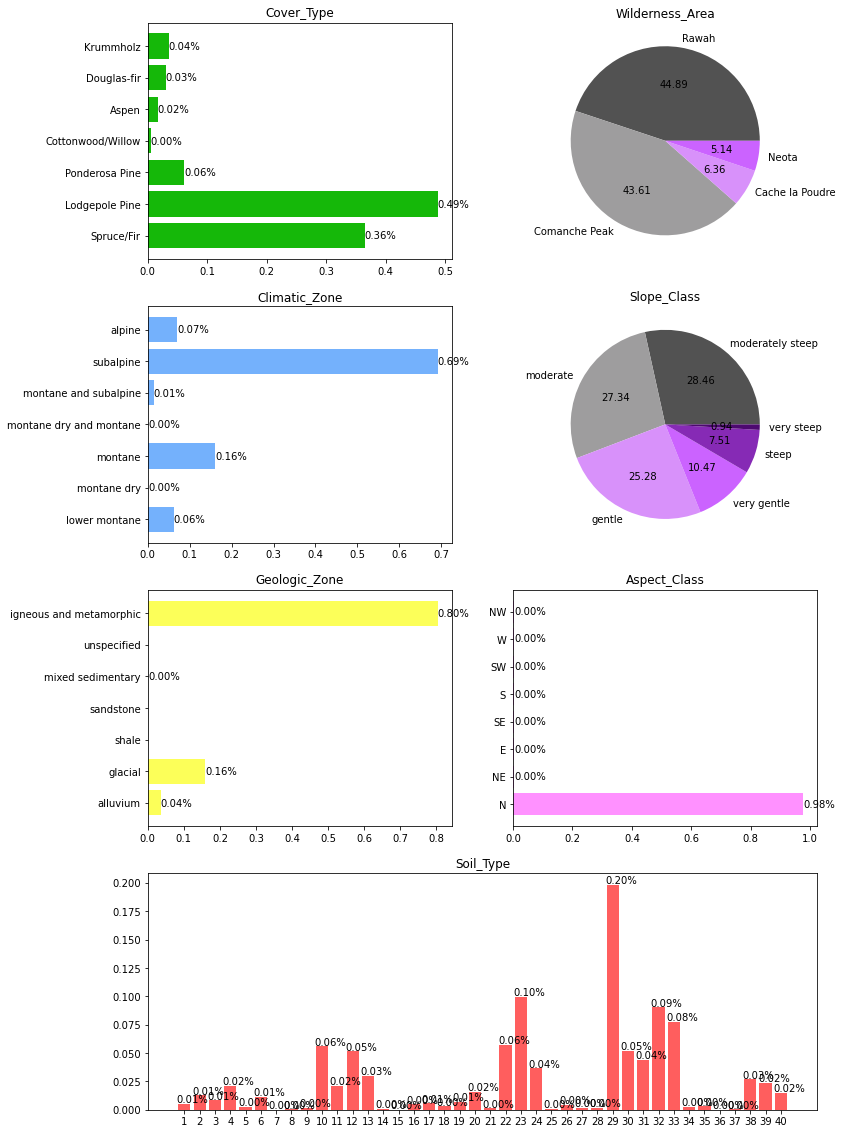

In [ ]:
print(TextStyle.BOLD("Qualitative attributes before removing outliers."))
plot_qualitative_rfd(DF[QUALITATIVE_ATTRIBUTES])

<font color="blue"><b>OBSERVATION: </b></font> The following observations were made from above plots.
* With respect to collected data instances, pine and spruce/fir trees dominate the Cover_Type with 94% of all instances having them for their Cover_Type. 
* Most data instances (92.5%) were collected from the Rawah and Comanche Peak wildernesses.
* Most land areas (68.1%) have a gentle to moderate slope.
* Most land areas in the dataset (75%) lie within the subalpine climatic zone. This is justified since spruce/fir and pine are the dominant species in a subalpine climate zone (NPS.gov, 2019).
* Most (76%) land areas in the dataset fall within the igneous and metamorphic geological zone.
* Almost all data instances collected have a Northerly Aspect. At first glance, this seems strange. Upon some research, it was found that areas with a north-facing slope/northerly aspect tend to have higher vegetation and wildlife (Yang Jie et al, 2020). Since data in this dataset was collected in order to record the dominant cover types (dominant tree species) in each area, it would make sense that areas rich in vegetation were sought after, which likely had a notherly aspect that contributes to rich biomass in the area.
* Soil types 1 to 9,  14 to 21, 25 to 28 and 34 to 37 have negligible frequency densities amongst data instances.
* It is clear that all attribtes contain <b>unbalanced classes</b>.

## 2.5. Handling Categorical Data
Categorical data are often stored as labels in the form of string objects. But most ML algorithms work with numeric data. So, all categorical data is to be transformed such that each category is represented by a unique number (label encoding) or is represented by a vector full of 0s of length n (n possible categories) where only the index of the corresponding category holds value 1 (one hot encoding).
<br><br>As discovered during EDA, categories like Wilderness_Area and Soil_Type were already one hot encoded. While one hot encoding can be a great way to represent categorical data for ML models, if there are too many categories then this can unnecessarily increase the no. of attributes. In such cases, label encoding would be better. So, since here, the 40 different soil types were contributing to 40 different columns, they were compressed and effectively represented in 1 column with label encoding. Similarly, the Wilderness_Area columns were also combined into 1. Thus, resulting in 7 qualitative attributes instead of 49.
<br><br>Scikit Learn, does provides a LabelEncoder for preprocessing (sklearn.preprocessing.LabelEncoder) that can be used to label encode columns with object categories in one go (Das Sukamal, 2020). Here, however, it was more convinent to encode categories along the way, as and when discovered during EDA. Also, custom encoding made it easier to store a dictionary with key-value pairs of category numbers and labels making it possible to retrieve category label from their numbers later.

## 2.6. Checking For Outliers
Quantitative data may be misleading when outliers are present. Box plots are a great way to check for outliers in a dataset as they have median (the measure of central tendency least affected by outliers), 1st quartile (Q1), 3rd quartile (Q3) and the inter quartile range (1QR), all summarized in an easy to understand format. If a data point lies outside the range \[Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)\] then that the data point is considered an outlier (PSU, no date).

In [ ]:
def plot_boxplots(df):
    ''' Plots boxplots of all numeric attributes in the given dataset. '''
    
    print("Total no. of instances = {}.".format(df.shape[0]))
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    sns.boxplot(data=df[["Elevation"]], ax=axes[0][0])
    sns.boxplot(data=df[["Aspect"]], ax=axes[0][1])
    sns.boxplot(data=df[["Slope"]], ax=axes[1][0])
    sns.boxplot(
        data=df[["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Hydrology"]], 
        ax=axes[1][1]
    )
    sns.boxplot(
        data=df[["Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points"]], 
        ax=axes[2][0]
    )
    sns.boxplot(
        data=df[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Hillshade_Avg"]], 
        ax=axes[2][1]
    )
    plt.show()

With Possible Outliers
Total no. of instances = 581012.


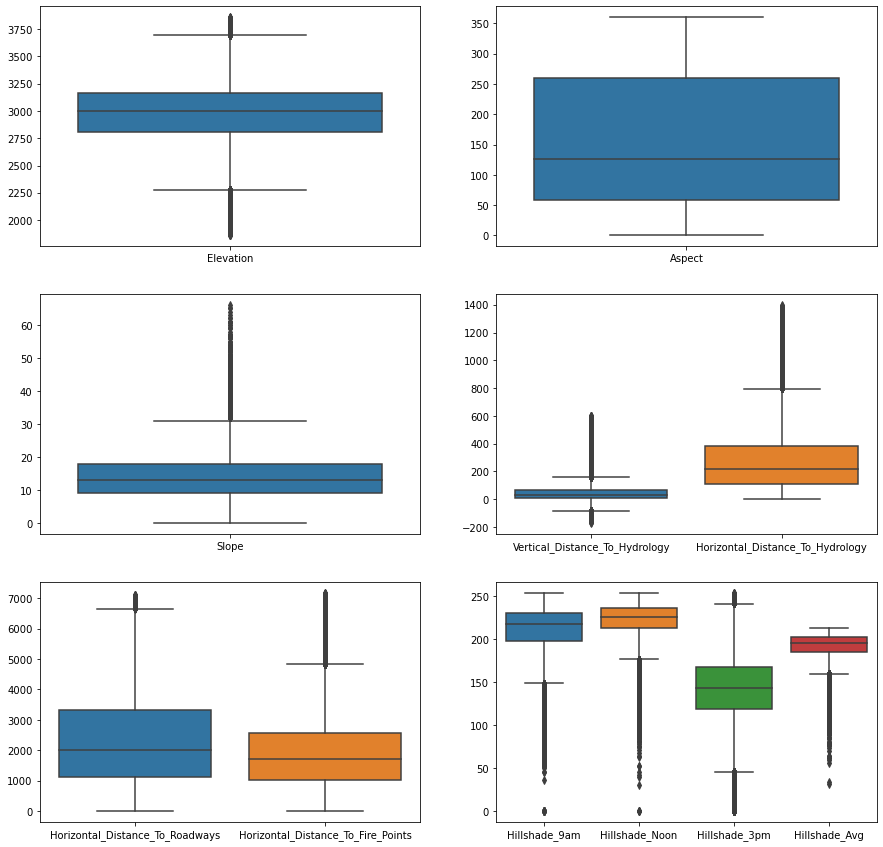

In [ ]:
print(TextStyle.BOLD("With Possible Outliers"))
plot_boxplots(DF[QUANTITATIVE_ATTRIBUTES])

<font color="blue"><b>OBSERVATION: </b></font> All attributes but "Aspect" have a large number of outliers. Outliers can cause measures of central tendency to become misleading. Also, outliers introduce unwanted varience in the data that can cause ML models to be less accurate. But discarding outliers may not always be the best choice (Goyal Chirag, 2021). Especially if values to be predicted are critical ones like say, a diagnosis of a disease. In such cases even some rare cases may be too risky to disregard completely. In other situations, when data instances are few, eliminating outliers may cause the no. of data instances to reduce furthur rendering the dataset unsuitable for training ML models. In such scenarios and otherwise too, it may be best to plot data in groups to differenciate the truly invalid/erraneous outliers from the rest (Das Sukamal, 2020). An example of such selective removal of outliers is shown below. 

Before removing outliers.


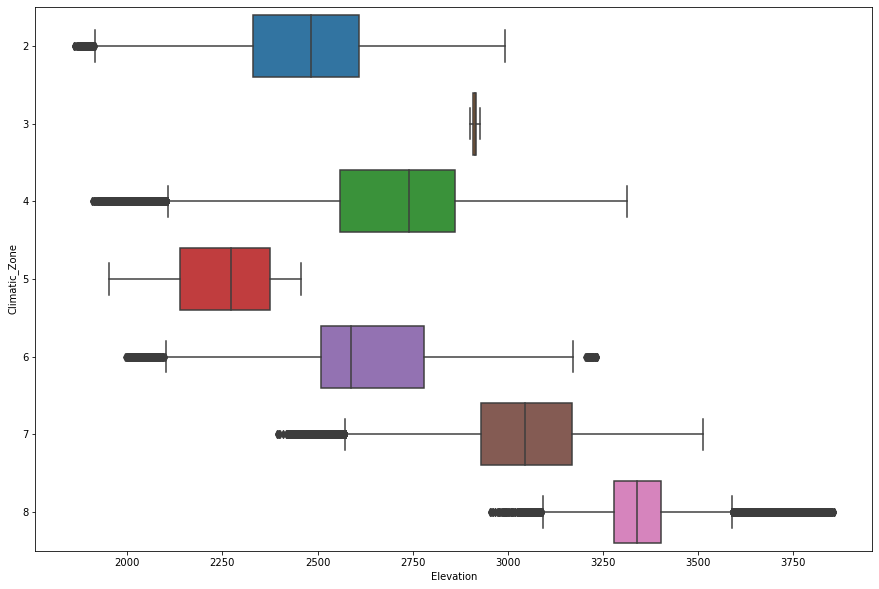

In [ ]:
print("Before removing outliers.")
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(data=DF, x="Elevation", y="Climatic_Zone", ax=ax1, orient="h")
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> From the above box plot, it can be seen that for some climatic zones like 5, lower elevation values that may be outliers for other climatic zones, is within range. Similarly, for climatic zone 4, some high elevation values that may be outliers for say climatic zone 6, is within range. So, selective filtering can be done as shown below to remove only true outliers.

After selective removal of outliers.


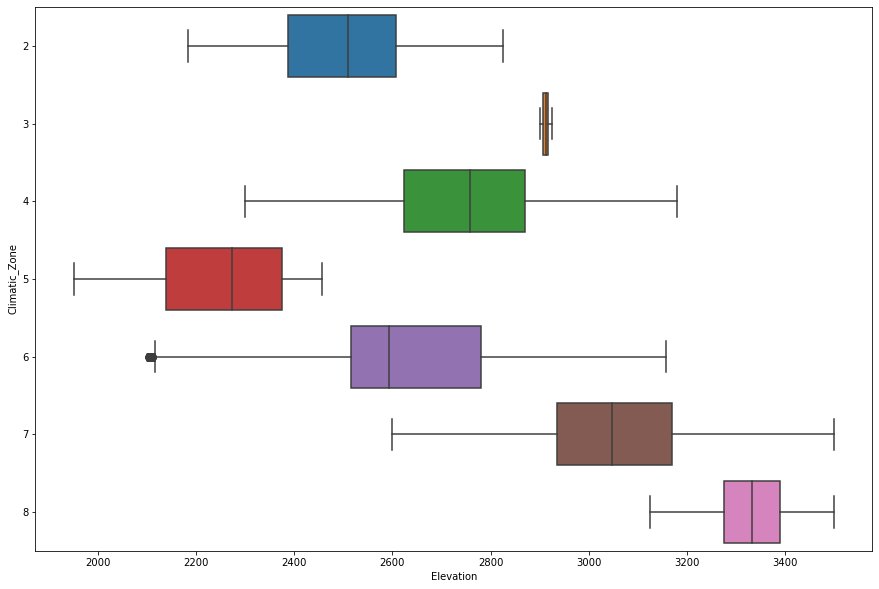

In [ ]:
to_drop_indices = (DF[
    ((DF["Climatic_Zone"] == 2) & ((DF["Elevation"] < 2185) | (DF["Elevation"] > 2825)))|
    ((DF["Climatic_Zone"] == 4) & ((DF["Elevation"] > 3180) | (DF["Elevation"] < 2300)))|
    (DF["Climatic_Zone"] == 5 & (DF["Elevation"] > 2400))|
    ((DF["Climatic_Zone"] == 6) & ((DF["Elevation"] > 3160) | (DF["Elevation"] < 2100)))|
    ((DF["Climatic_Zone"] == 7) & ((DF["Elevation"] < 2600) | (DF["Elevation"] > 3500)))|
    ((DF["Climatic_Zone"] == 8) & ((DF["Elevation"] > 3500) | (DF["Elevation"] < 3125)))
]).index.values.tolist()

no_outliers_df = DF.drop(to_drop_indices)

print("After selective removal of outliers.")
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(data=no_outliers_df, x="Elevation", y="Climatic_Zone", ax=ax1, orient="h")
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> While a careful selective removal of outliers over many iterations may be needed for critical datasets, with a non-critical dataset that has a very large no. of instances like this one and equal parts numeric and categorical attributes, doing selective removal of outliers is daunting and not practical. Instead, removing outliers based on interquartile range or z-scores (in case of normal distributions) is a better option.
<br><br>From the median line and spread observed from the boxplots, it seems that most attributes except say "Elevation" and "Hillshade_3pm" are very skewed. In such a scenario, using the interquartile range based outlier removal method is the best option.

In [ ]:
def remove_outliers(df, attributes):
    ''' Returns given dataframe with all values outside 1.5 times 
        the interquartile range (above and below) removed for
        given attributes. 
    '''
     # recursively remove all outliers from a dataframe for all given attributes
    
    df_len_before = len(df)
    df_len_after = 0
    
    while df_len_before != df_len_after:
        df_len_before = len(df)
        for attribute in attributes:
            description = df[attribute].describe() 
            q1 = description["25%"] # 1st quartile == 25th percentile
            q3 = description["75%"] # 3rd quartile == 75th percentile
            iqr = q3 - q1 # inter quartile range
            lower_bound = q1 - (1.5 * iqr) # if val < lower_bound, then val is an outlier
            upper_bound = q3 + (1.5 * iqr) # if val > upper_bound, then val is an outlier
            df = df.loc[(df[attribute] > lower_bound) & (df[attribute] < upper_bound)] # get df without outliers
        df_len_after = len(df)
    
    return df

In [ ]:
print("With all outliers: DF = {}, DF_QT = {}".format(DF.shape[0], DF[QUANTITATIVE_ATTRIBUTES].shape[0]))
DF = remove_outliers(DF, QUANTITATIVE_ATTRIBUTES)
print("After removing all outliers from DF: DF = {}, DF_QT = {}".format(DF[QUANTITATIVE_ATTRIBUTES].shape[0], DF[QUANTITATIVE_ATTRIBUTES].shape[0]))
DF = DF.reset_index().drop(["index"],axis=1)

With all outliers: DF = 581012, DF_QT = 581012
After removing all outliers from DF: DF = 415388, DF_QT = 415388


After Removing All Outliers
Total no. of instances = 415388.


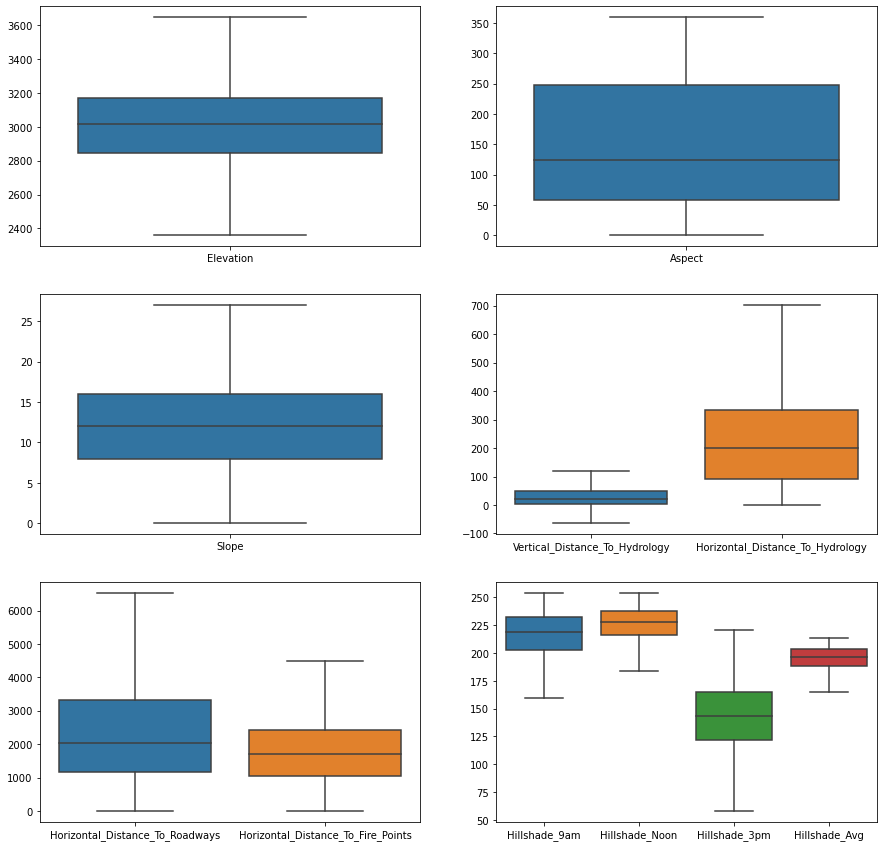

In [ ]:
print(TextStyle.BOLD("After Removing All Outliers"))
plot_boxplots(DF[QUANTITATIVE_ATTRIBUTES])

All outliers have been removed. Let's view frequency ditribution of qualitative attributes to check for any changes after removing outliers.

Qualitative attributes after removing outliers.
Total no. of instances = 415388.


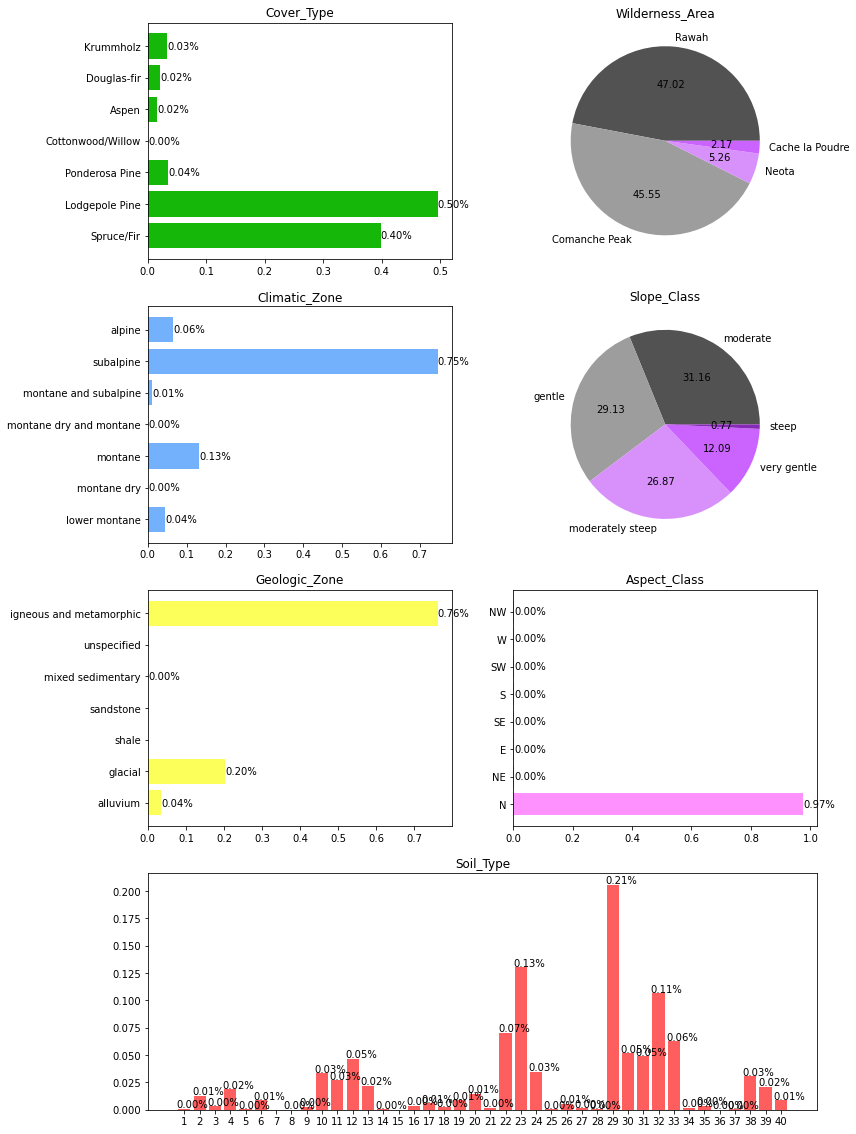

In [ ]:
print(TextStyle.BOLD("Qualitative attributes after removing outliers."))
plot_qualitative_rfd(DF[QUALITATIVE_ATTRIBUTES])

<font color="blue"><b>OBSERVATION: </b></font> The distribution of qualitative attributes are not too different after outliers have been removed. This shows that most values in the dataset are consistent. Most outliers seem to have been from the "Cache La Poudre" wilderness as this is the wilderness most affected by the removal of outliers. It is possible that some of the outliers may have been valid data points from this wilderness which probably contributes to more outliers on account of conditions there perhaps being more extreme compared to other wildernesses. Nevertheless, removal of these values do not significantly affect the general distribution of datapoints in a dataset as large as this one.

## 2.7. Quantitative Data Distribution

In [ ]:
DF[QUANTITATIVE_ATTRIBUTES].describe()

Aspect      Elevation  Hillshade_Avg  \
count  415388.000000  415388.000000  415388.000000   
mean      152.171271    2990.833662     195.236497   
std       110.410476     229.606541      10.863436   
min         0.000000    2359.000000     164.666667   
25%        58.000000    2844.000000     188.000000   
50%       124.000000    3015.000000     196.333333   
75%       247.000000    3168.000000     203.666667   
max       359.000000    3647.000000     213.666667   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     415388.000000                   415388.000000   
mean                         227.967077                       29.514136   
std                          165.553170                       32.614294   
min                            0.000000                      -64.000000   
25%                           90.000000                        4.000000   
50%                          201.000000                       22.000000   
75%                          335.000000                       50.000000   
max                          702.000000                      118.000000   

       Horizontal_Distance_To_Roadways  Hillshade_Noon          Slope  \
count                    415388.000000   415388.000000  415388.000000   
mean                       2383.271050      226.540786      12.143302   
std                        1525.922958       15.343763       5.528984   
min                           0.000000      184.000000       0.000000   
25%                        1180.000000      216.000000       8.000000   
50%                        2042.000000      228.000000      12.000000   
75%                        3319.000000      238.000000      16.000000   
max                        6527.000000      254.000000      27.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Hillshade_9am  
count  415388.000000                       415388.000000  415388.000000  
mean      143.112740                         1802.292907     216.055965  
std        30.996935                          956.908288      20.357478  
min        58.000000                            0.000000     160.000000  
25%       122.000000                         1057.000000     203.000000  
50%       143.000000                         1714.000000     219.000000  
75%       165.000000                         2432.000000     232.000000  
max       221.000000                         4494.000000     254.000000

Histograms are a great way to see how quantitative attribute values are distributed. This can further help understand the nature of the dataset better.
<br><b>The following cells plot histograms from values of all quantitative attributes with appropriate custom bin specifications for each attribute.</b>
* Distance to hydrology, vertical and horizontal, since they both refer to distance from water bodies, have been plotted together.
* Hillshade values at 9 am, noon and 3 pm have also been plotted together since they all are measures of the amount of light recieved in an area ranging from 0 (indicating perfect dark) and 255 (indicating perfect light).
* Some histograms have been plotted to show frequency in the log scale because otherwise, due to the very large no. of instances in the dataset, it is not possible to see a wide range of smaller frequencies from the histogram.

In [ ]:
def get_skewness(df):
    ''' Returns skewness of given attributes of given DataFrame. '''
    skewness = {}
    for col in df.columns:
        skewness_val = scipy.stats.skew(df[col])
        skewness[col] = skewness_val
    return skewness

In [ ]:
def plot_histograms(df, is_norm=False): #(stats.aukland, no date)
    ''' Plots histograms of all quantitative attributes with appropriate bin sizes. 
        If is norm is True, this indicates that the dataset is normalized and all same
        bin sizes can be used. Returns the skewness ofevery attribute.
    '''
    
    print("Total no. of instances = {}\n".format(df.shape[0]))
    
    # plot histograms
    fig, axes = plt.subplots(4, 2, figsize=(15, 15))

    # BINS
    if is_norm:
        elevation_bins = aspect_bins = slope_bins = hydrology_bins = roadway_firepoints_bins = hillshade_bins = list(np.arange(0, 1, 0.05))
    else: 
        elevation_bins =  list(np.arange(2350, 3651, 50))
        aspect_bins = list(np.arange(0, 361, 10))
        slope_bins =  list(np.arange(0, 30, 1))
        hydrology_bins = list(np.arange(-60, 711, 10))
        roadway_firepoints_bins = list(np.arange(0, 6552, 150))
        hillshade_bins = (np.arange(50, 256, 5))
        hillshade_avg_bins = (np.arange(160, 220, 5))

    # ELEVATION HISTOGRAM
    df["Elevation"].hist(
        ax=axes[0][0], 
        bins=elevation_bins, 
        color=Colors.BLUE, 
        edgecolor='black',  
        label="Elevation",
        log=True
    )
    axes[0][0].axvline(np.median(df["Elevation"]), color=Colors.DARK_BLUE, label="median")
    axes[0][0].legend()

    # ASPECT HISTOGRAM
    df["Aspect"].hist(
        ax=axes[0][1], 
        bins=aspect_bins, 
        color=Colors.BLUE, 
        edgecolor='black',  
        label="Aspect",
        log=False
    )
    axes[0][1].axvline(np.median(df["Aspect"]), color=Colors.DARK_BLUE, label="median")
    axes[0][1].legend()

    # SLOPE HISTOGRAM
    df["Slope"].hist(
        ax=axes[1][0], 
        bins=slope_bins, 
        color=Colors.BLUE, 
        edgecolor='black',  
        label="Slope",
        log=False
    )
    axes[1][0].axvline(np.median(df["Slope"]), color=Colors.DARK_BLUE, label="median")
    axes[1][0].legend()

    # DISTANCE TO HYDROLOGY HISTOGRAMS
    df["Horizontal_Distance_To_Hydrology"].hist(
        ax=axes[1][1], 
        bins=hydrology_bins, 
        color=Colors.RED, 
        edgecolor='black', 
        alpha=0.5,  
        label="Horizontal_Distance_To_Hydrology",
        log=True
    )
    df["Vertical_Distance_To_Hydrology"].hist(
        ax=axes[1][1], 
        bins=hydrology_bins, 
        color=Colors.BLUE, 
        edgecolor='black', 
        alpha=0.5, 
        label="Vertical_Distance_To_Hydrology",
        log=False
    )
    axes[1][1].axvline(np.median(df["Horizontal_Distance_To_Hydrology"]), color=Colors.DARK_RED, label="hor_median")
    axes[1][1].axvline(np.median(df["Vertical_Distance_To_Hydrology"]), color=Colors.DARK_BLUE, label="ver_median")
    axes[1][1].legend()

    # DISTANCE TO ROADWAYS HISTOGRAM
    df["Horizontal_Distance_To_Roadways"].hist(
        ax=axes[2][0], 
        bins=roadway_firepoints_bins, 
        color=Colors.BLUE, 
        edgecolor="black", 
        linewidth=1.2, 
        label="Horizontal_Distance_To_Roadways",
        log=False,
    )
    axes[2][0].axvline(np.median(df["Horizontal_Distance_To_Roadways"]), color=Colors.DARK_BLUE, label="median")
    axes[2][0].legend()
    
    
    # DISTANCE TO FIRE POINTS HISTOGRAM
    df["Horizontal_Distance_To_Fire_Points"].hist(
        ax=axes[2][1], 
        bins=roadway_firepoints_bins, 
        color=Colors.RED, 
        edgecolor="black", 
        linewidth=1.2,
        label="Horizontal_Distance_To_Fire_Points",
        log=False,
    )
    axes[2][1].axvline(np.median(df["Horizontal_Distance_To_Fire_Points"]), color=Colors.DARK_BLUE, label="median")
    axes[2][1].legend()

    # HILLSHADE HISTOGRAMS
    df["Hillshade_Avg"].hist(
        ax=axes[3][0], 
        bins=hillshade_bins, 
        color=Colors.PINK, 
        edgecolor="black", 
        linewidth=1.2,
        label="Hillshade_Avg",
        log=False,
    )
    axes[3][0].axvline(np.median(df["Hillshade_Avg"]), color=Colors.DARK_PINK, label="median")
    axes[3][0].legend()
    
    df["Hillshade_9am"].hist(
        ax=axes[3][1], 
        bins=hillshade_bins, 
        color=Colors.BLUE, 
        edgecolor='black', 
        alpha=0.5,  
        label="Hillshade_9am",
        log=False
    )
    df["Hillshade_Noon"].hist(
        ax=axes[3][1], 
        bins=hillshade_bins, 
        color=Colors.YELLOW, 
        edgecolor='black', 
        alpha=0.5, 
        label="Hillshade_Noon",
        log=False
    )
    df["Hillshade_3pm"].hist(
        ax=axes[3][1], 
        bins=hillshade_bins, 
        color=Colors.RED, 
        edgecolor='black', 
        alpha=0.5, 
        label="Hillshade_3pm",
        log=False
    )
    axes[3][1].axvline(np.median(df["Hillshade_9am"]), color=Colors.DARK_BLUE, label="9_median")
    axes[3][1].axvline(np.median(df["Hillshade_Noon"]), color=Colors.DARK_YELLOW, label="noon_median")
    axes[3][1].axvline(np.median(df["Hillshade_3pm"]), color=Colors.DARK_RED, label="3_median")
    axes[3][1].legend()

    plt.show()

Total no. of instances = 415388



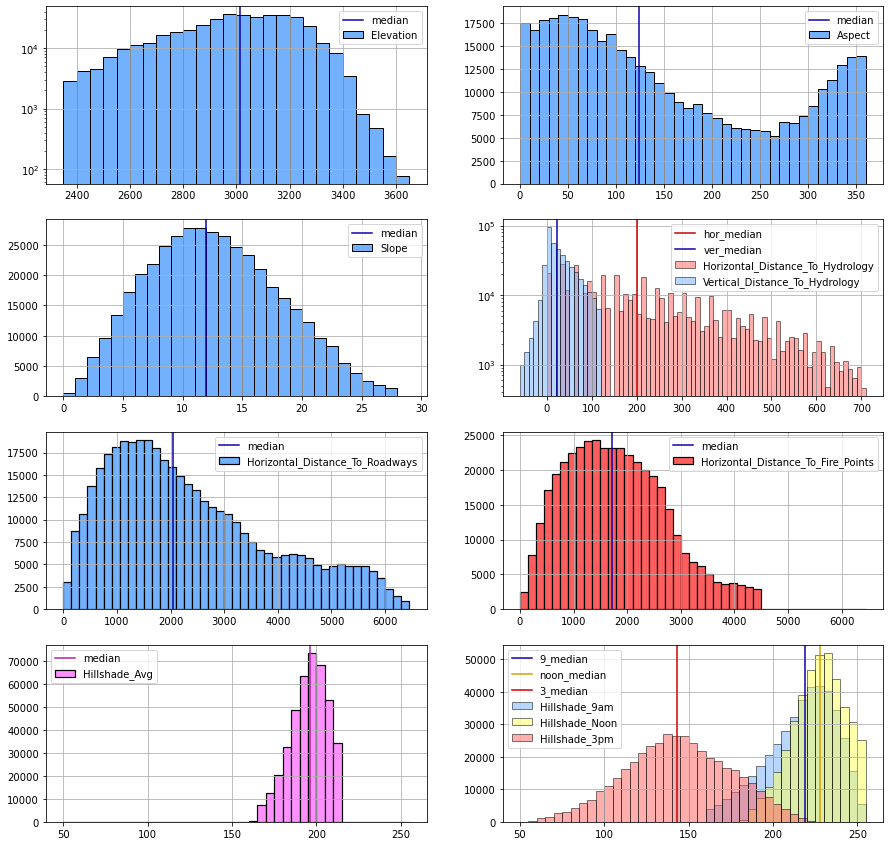

Skewness
Aspect: 0.46838207321409586
Elevation: -0.4669742689718435
Hillshade_Avg: -0.4723606197649432
Horizontal_Distance_To_Hydrology: 0.6805213521555039
Vertical_Distance_To_Hydrology: 0.6539521211726971
Horizontal_Distance_To_Roadways: 0.6981733549009671
Hillshade_Noon: -0.3345087937946284
Slope: 0.24401010418341654
Hillshade_3pm: -0.051169992386306075
Horizontal_Distance_To_Fire_Points: 0.4995901949088271
Hillshade_9am: -0.553530224229552


In [ ]:
plot_histograms(DF[QUANTITATIVE_ATTRIBUTES])
skewness = get_skewness(DF[QUANTITATIVE_ATTRIBUTES])
print_dict(skewness, TextStyle.BOLD("Skewness"))

<font color="blue"><b>OBSERVATION: </b></font>Following table shows observations made regarding each histogram also drawing from the 5 number summary of each attribute provided by the describe() function. (Frost Jim, no date)

|Attribute|Mean|Min|Max|Peaks|Spread|Shape|
|---|---|---|---|---|---|---|
|Elevation|2990|2356|3647|Unimodal|1291|Slightly Skewed Left|
|Aspect|152|0|359|Bimodal|359|Skewed Right|
|Slope|12|0|27|UniModal|27|Skewed Right|
|Vertical_Distance_To_Hydrology|30|-64|121|Unimodal|187|Skewed Right|
|Horiontal_Distance_To_Hydrology|229|0|702|Unimodal|702|Skewed Right|
|Horiontal_Distance_To_Roadways|2379|0|6522|Unimodal|6522|Skewed Right|
|Horiontal_Distance_To_Fire_Points|1801|0|4496|Unimodal|2695|Skewed Right|
|Hillshade_9am|216|160|254|Unimodal|94|Skewed Left|
|Hillshade_Noon|226|184|254|Unimodal|70|Slightly Skewed Left|
|Hillshade_3pm|143|56|221|Unimodal|165|Symmetric|
|Hillshade_Avg|195|164|214|Unimodal|50|Skewed Left|

<font color="blue"><b>OBSERVATION: </b></font> The histograms confirm the observation made from box plots that most attributes (all except Hillshade_3pm) hava a skewed distribution. This indicates probable unbalaced classes in chosen class attribute.

### 2.7.1. Handling Skewness
Many models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc, assume that data follows a somewhat normal distribution (A. Barai, 2020). A lot of the attributes in this dataset is skewed which can make calculations difficult. Thus, reduction of skewness would result in better predictions. A common way to reduce skewness is by applying a <b>square root transform</b> or <b>square transform</b> function to the attributes. Square root transform is best with right (positive) skewed data and square transform is best for left (negative) skewed data(Vadali, 2017).

<font color="blue"><b>OBSERVATION: </b></font> Here, "Vertical_Distance_To_Hydrology" has negative numbers. "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways" and "Horizontal_Distance_To_Roadways" has minimum value as 0. Applying square root transformation can thus result in division by 0 or NaN. A common way to over come this is to add a constant to each attribute values such that they are not negative ((Wicklin, 2011). Later, these values will be normalized before using as input to ML models and so, this is a viable approach. Also, since "Hillshade_3pm" is not skewed, this attributes shall be excempted from the process.

In [ ]:
# The minimum value of attribute Vertical_Distance_To_Hydrology is -64, so 65 shall be the constant added to Vertical_Distance_To_Hydrology
problem_min_val_attributes = [
    "Aspect", 
    "Slope", 
    "Vertical_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Hydrology", 
    "Horizontal_Distance_To_Roadways",  
    "Horizontal_Distance_To_Fire_Points",
    'Hillshade_Noon', 
    'Hillshade_Avg', 
    'Elevation', 
    'Hillshade_9am'
]

for attribute in problem_min_val_attributes: 
    const = abs(min(DF[attribute])) + 0.001
    DF[attribute] = DF[attribute] + const

In [ ]:
skewness_before = get_skewness(DF[QUANTITATIVE_ATTRIBUTES])
print_dict(skewness_before, TextStyle.BOLD("Skewness Before Hanlding"))

Skewness Before Hanlding
Aspect: 0.4683820732140915
Elevation: -0.46697426897180266
Hillshade_Avg: -0.4723606197649432
Horizontal_Distance_To_Hydrology: 0.6805213521555008
Vertical_Distance_To_Hydrology: 0.6539521211726887
Horizontal_Distance_To_Roadways: 0.6981733549009607
Hillshade_Noon: -0.3345087937946559
Slope: 0.24401010418342292
Hillshade_3pm: -0.051169992386306075
Horizontal_Distance_To_Fire_Points: 0.4995901949088193
Hillshade_9am: -0.5535302242295685


In [ ]:
positive_skewed_attributes = [
    'Horizontal_Distance_To_Roadways', 
    'Horizontal_Distance_To_Hydrology', 
    'Aspect', 
    'Horizontal_Distance_To_Fire_Points', 
    'Slope', 
    'Vertical_Distance_To_Hydrology'
]

negative_skewed_attributes = [
    'Hillshade_Noon', 
    'Hillshade_Avg', 
    'Elevation', 
    'Hillshade_9am'
]

DF[positive_skewed_attributes] = np.sqrt(DF[positive_skewed_attributes])
DF[negative_skewed_attributes] = DF[negative_skewed_attributes] ** 2

In [ ]:
skewness_after =  get_skewness(DF[QUANTITATIVE_ATTRIBUTES])
print_dict(skewness_after, TextStyle.BOLD("Skewness After Hanlding"))

Skewness After Hanlding
Aspect: -0.10585707083128441
Elevation: -0.3719711027938235
Hillshade_Avg: -0.40817479151527275
Horizontal_Distance_To_Hydrology: -0.25598140751623993
Vertical_Distance_To_Hydrology: 0.09091359259937348
Horizontal_Distance_To_Roadways: 0.0805108278305236
Hillshade_Noon: -0.2537350629720794
Slope: -0.3794941417066305
Hillshade_3pm: -0.051169992386306075
Horizontal_Distance_To_Fire_Points: -0.15926014163446503
Hillshade_9am: -0.4424092820628703


Skewness has thus been reduced.

## 2.8. Normalization
As it is, the attributes have very different magnitudes and units. For many algorithms like K nearest neighbours that uses eucildian distance as loss function, k means clustering algorithm etc and also for CNNs (where images are to be normalized as well), it is the case that providing normalized values as input increases performance and reduces run time (Naik Krish, 15 Aug 2019). Normalization is also a great way to scale down the data values resulting in a more manageable, less misleading and efficient dataset.

<font color="blue"><b>OBSERVATION: </b></font>While other normalization options like Z-Score normalization exists, here, standard scaler shall be used to standardize data and normalize it to fall within a similar range. Standard scaler is the industry standard when it comes to scaling/normalizing datasets as many ml algorithms, especially ones involving distance calculation like K means clustring, performs better on a more standardized dataset. (Jeff Hale, 2019)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
QT = pd.DataFrame(standard_scaler.fit_transform(DF[QUANTITATIVE_ATTRIBUTES]), columns=DF[QUANTITATIVE_ATTRIBUTES].columns)
QL = DF[QUALITATIVE_ATTRIBUTES]
DF = pd.merge(QT, QL, left_index=True, right_index=True)
display(DF.head(3))

Aspect  Elevation  Hillshade_Avg  Horizontal_Distance_To_Hydrology  \
0  0.195764  -0.478195       0.743804                          0.893278   
1  0.641481  -0.504050       1.639666                          0.145250   
2  0.170550  -0.148133       0.304286                          0.682008   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.021373                         1.646097   
1                        0.102570                         1.529573   
2                       -0.116149                         1.923233   

   Hillshade_Noon     Slope  Hillshade_3pm  \
0        0.878138 -0.075538      -0.229466   
1        1.771940  0.877927       1.157769   
2        0.608552  0.732384      -0.745647   

   Horizontal_Distance_To_Fire_Points  Hillshade_9am  Cover_Type  \
0                            1.936476       0.888270           2   
1                            2.114465      -0.521989           2   
2                            1.480859       1.203988           2   

   Wilderness_Area  Soil_Type  Climatic_Zone  Geologic_Zone  Slope_Class  \
0                1         30              7              7            3   
1                1         30              7              7            4   
2                1         29              7              7            4   

   Aspect_Class  
0             1  
1             1  
2             1

In [ ]:
DF.describe()

Aspect     Elevation  Hillshade_Avg  \
count  4.153880e+05  4.153880e+05   4.153880e+05   
mean   9.110595e-15  3.395558e-14   5.319216e-15   
std    1.000001e+00  1.000001e+00   1.000001e+00   
min   -2.323343e+00 -2.636293e+00  -2.728606e+00   
25%   -7.645569e-01 -6.585600e-01  -6.792615e-01   
50%   -4.114501e-02  8.485111e-02   8.663127e-02   
75%    9.003256e-01  7.703839e-01   7.754124e-01   
max    1.564405e+00  3.041024e+00   1.736981e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      4.153880e+05                    4.153880e+05   
mean                      -1.266676e-14                    9.273493e-15   
std                        1.000001e+00                    1.000001e+00   
min                       -2.258147e+00                   -5.641384e+00   
25%                       -7.085932e-01                   -7.587682e-01   
50%                        6.011434e-02                   -1.481028e-01   
75%                        7.362206e-01                    6.860801e-01   
max                        2.078792e+00                    2.358455e+00   

       Horizontal_Distance_To_Roadways  Hillshade_Noon         Slope  \
count                     4.153880e+05    4.153880e+05  4.153880e+05   
mean                     -5.932012e-15    1.816973e-14  7.189133e-14   
std                       1.000001e+00    1.000001e+00  1.000001e+00   
min                      -2.877927e+00   -2.663534e+00 -3.959568e+00   
25%                      -7.347806e-01   -7.010489e-01 -6.527026e-01   
50%                      -5.802123e-02    7.704549e-02  9.881567e-02   
75%                       7.177104e-01    7.430253e-01  7.323844e-01   
max                       2.165172e+00    1.841812e+00  2.146559e+00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Hillshade_9am  \
count   4.153880e+05                        4.153880e+05   4.153880e+05   
mean    1.159577e-16                        5.961411e-15   1.054766e-13   
std     1.000001e+00                        1.000001e+00   1.000001e+00   
min    -2.745847e+00                       -3.450124e+00  -2.613256e+00   
25%    -6.811243e-01                       -6.999231e-01  -6.669251e-01   
50%    -3.637150e-03                        5.273809e-02   1.198513e-01   
75%     7.061113e-01                        7.229171e-01   7.840915e-01   
max     2.512744e+00                        2.223506e+00   1.959219e+00   

          Cover_Type  Wilderness_Area      Soil_Type  Climatic_Zone  \
count  415388.000000    415388.000000  415388.000000  415388.000000   
mean        1.935282         2.028763      25.029194       6.432066   
std         1.319364         1.005818       8.672043       1.436355   
min         1.000000         1.000000       1.000000       2.000000   
25%         1.000000         1.000000      22.000000       7.000000   
50%         2.000000         2.000000      29.000000       7.000000   
75%         2.000000         3.000000      31.000000       7.000000   
max         7.000000         4.000000      40.000000       8.000000   

       Geologic_Zone    Slope_Class   Aspect_Class  
count  415388.000000  415388.000000  415388.000000  
mean        5.770094       2.751023       1.104459  
std         2.201828       1.005985       0.721015  
min         1.000000       1.000000       1.000000  
25%         7.000000       2.000000       1.000000  
50%         7.000000       3.000000       1.000000  
75%         7.000000       4.000000       1.000000  
max         7.000000       5.000000       8.000000

<font color="blue"><b>OBSERVATION: </b></font>From the above description, it is clear that standard scaler has done its job as all attributes now have a mean that is very close to 0 and a standard deviation thats very close to 1.

In [ ]:
print(DF.isnull().sum().sum())

0


# 3. Checking For Correlations
A great way to check for correlations amogst all attributes (even qualitative attributes since they were label encoded) is to use the corr() function to get pearson's correlation values and then plot them on a heatmap for easy viewing.

In [ ]:
def show_correlation_heatmap(df):
    ''' Calculates correlation matrix and displays it as a heatmap. 
        The correlation matrix calculated is returned.
    '''
    print(TextStyle.BOLD("Correlation Heatmap"))

    fig, ax1 = plt.subplots(1, 1, figsize=(20,15))
    corr_matrix = df.corr()
    corr_mask = np.zeros_like(corr_matrix)
    corr_mask[np.triu_indices_from(arr=corr_mask, k=1)] = True
    sns.heatmap(corr_matrix, cmap="bwr", annot=True, mask=corr_mask, ax=ax1)
    plt.show()
    
    return corr_matrix

In [ ]:
def show_corr_attribute(df, attribute):
    ''' Displays positive and negative correlations for a single attribute. '''
    print(TextStyle.BOLD(attribute))
    cor_mat = df.corr()
    pos_cor = cor_mat[attribute][cor_mat[attribute] > 0].sort_values(ascending=False)
    neg_cor = cor_mat[attribute][cor_mat[attribute] < 0].sort_values(ascending=True)
    print(TextStyle.BOLD("positive correlations"))
    display(pos_cor)
    print(TextStyle.BOLD("\nnegative correlations"))
    display(neg_cor)

Correlation Heatmap


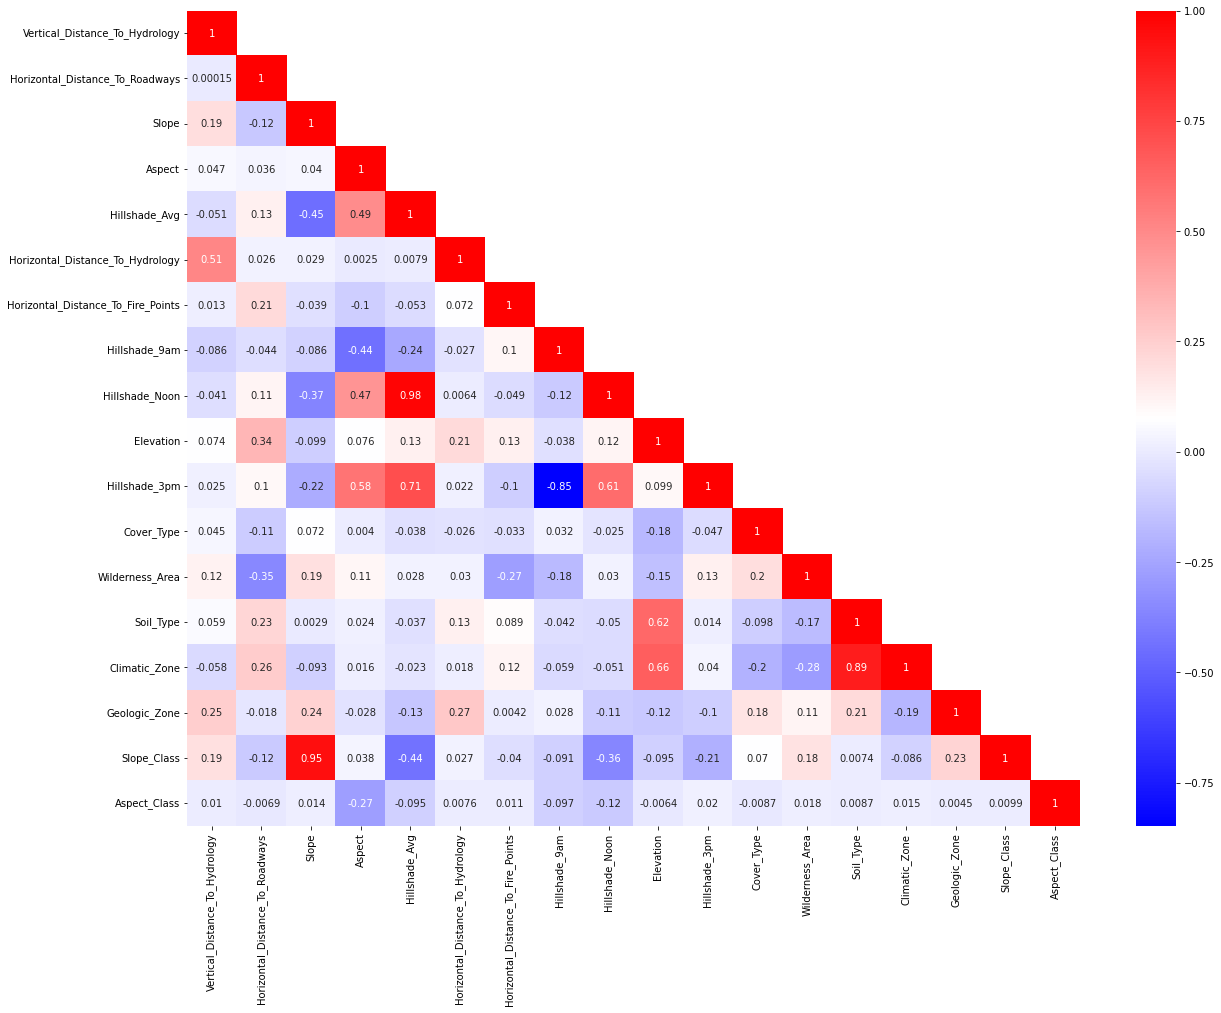

In [ ]:
corr_mat = show_correlation_heatmap(DF)

<font color="blue"><b>OBSERVATION: </b></font>Following are observations made from above heatmap.

|Attribute1|Attribute2|Correlation|Justification|Is_Spurious/Is_Useless|
|---|---|---|---|---|
|Hillshade_Noon|Hillshade_Avg|0.98|Hillshade_Avg is the average of all 3 Hillshade values |Yes|
|Slope_Class|Slope|0.95|Slope_Class was creted by binning Slope|Yes|
|Climatic_Zone|Soil_Type|0.89|Climatic_Zone is a parameter used to determine Soil_Type categorization because climate is an important soil forming factor (Sindler Meghan, 2015).|No|
|Hillshade_3pm|Hillshade_Avg|0.71|Hillshade_Avg is the average of all 3 Hillshade values |Yes|
|Climatic_Zone|Elevation|0.66|Climate changes with elevation.|No|
|Soil_Type|Elevation|0.62|Eelvation is correlated to climatic zone which is correlated to soil type.|No|
|Hillshade_Noon|Hillshade_3pm|0.61|Noon and 3pm are close to each other in terms of time  and if an area recieves increased light in the afternoon, then it makes sense that it continues recieve increased light at 3pm which is slightly after noon.|No|
|Aspect|Hillshade_3pm|0.58|When an area faces more to the west (higher Aspect value) the light it recieves at 3 pm (Hillshade_3pm) when the sun is more to the west will be higher.|No|
|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Hydrology|0.51|Consider a water body located at a fixed position away from a piece of land. The distance from the land area to the water body can be considered to be the hypotenuse (hyp) of a right angled triangle whose height is the vertical distance to hydrology (h) and base is the horizontal distance to hydrology(b). From pythagorous theorem, (hyp)^2 = (h^2) + (b^2). So, when the distance to a water body increases or decreases, Horizontal_Distance_To_Hydrology (b) and Vertical_Distance_To_Hydrology (h) will both increase or decrease.|No|
|Hillshade_Avg|Aspect|0.49|Aspect is positively correlated to Hillshade_Noon and negatively so to Hillshade_9am.|No|
|Aspect|Hillshade_Noon|0.47|Aspect has high positive correlation with Hillshade 3pm which has a correlation with Hillshade_Noon|No|
|Elevation|Horizontal_Distance_To_Roadways|0.34|Building roads on higher grounds tends to more difficult.|No|

|Hillshade_3pm|Hillshade_9am|-0.85|If an area recieves lots of light at 9am (high Hillshade_9am), when the sun is more to the east, this means that the land is facing more towards the East. At 3pm, when the sun moves more towards the west, lands that face more to the east will recieve lower light (low Hillshade_3pm value).|No|
|Hillshade_Avg|Slope|-0.45|Hillshade_Noon has a negative correlation with Hillshade_Avg.|No|
|Aspect|Hillshade_9am|-0.44|Aspect has a positive correlation with Hilshade_3pm which has a negative correlation with Hillshade_9am.|No|
|Hillshade_Avg|Slope_Class|-0.44|Hillshade_Noon has a negative correlation with Slope.|No|
|Hillshade_Noon|Slope|-0.37|The sun is right overhead at noon. On flat land with less slope light from the sun reaches the grond more as there are fewer geographic inconsistencies that can cast shadows.|No|
|Hillshade_Noon|Slope_Class|-0.36|Hillshade_Noon has a negative correlation with Slope.|No|
|Wilderness_Area|Horizontal_Distance_To_Roadways|-0.35|Wilderness area no. is nominal and has no order|Yes|

All other correlations between 2 attributes are insignificant.

# 4. Class Attribute & Feature Selection

A great way to identify class/target attributes is to identify dependent variables. Independent variables would then become the features that are input into the model to help it best predict the class attribute (Frost Jim, No date).

<font color="blue"><b>OBSERVATION: </b></font>Following is a list of dependent variables & possible corresponding independent variables based on understanding of the natural world.

|Dependent Variable|Possible Corresponding Independent Variables|
|---|---|
|Soil_Type|Elevation, Climatic_Zone, Geologic_Zone, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Hillshade|
|Cover_Type|Climatic_Zone, Geologic_Zone, Soil_Type, Wilderness_Area, Elevation, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Aspect|
|Wilderness_Area|Horizontal_Distance_To_Roadways, Climatic_Zone, Geologic_Zone, Soil_Type, Cober_Type, Elevation, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Aspect|
|Horizontal_Distance_To_Roadways|Elevation, Slope, Climatic_Zone, Geologic_Zone, Soil_Type, Cover_Type|
|Horizontal_Distance_To_Hydrology|Slope, Hillshade, Soil_Type, Cover_Type, Climatic_Zone, Geologic_Zone|
|Vertical_Distance_To_Hydrology|Slope, Hillshade, Soil_Type, Cover_Type, Climatic_Zone, Geologic_Zone|
|Hillshade(9am, Noon, 3pm, Avg)|Slope, Cover_Type, Aspect|
|Horizontal_Distance_To_Fire_Points|Hillshade|Horizontal_Distance_To_Roadways|
|Climatic_Zone|Elevation|
|Aspect|Slope|Hillshade|
|-|Geologic_Zone|
|-|Slope|
|-|Elevation|

<font color="blue"><b>OBSERVATION: </b></font>3 Dependent variables that could be potential class attributes based on correlations and general understanding of the natural world are ""Soil_Type", "Cover_Type", "Horizontal_Distance_To_Hydrology", "Wilderness_Area", and "Hillshade_Avg". All of them have uneven classes. Classes of class attributes should have a somewhat balanced frequency distribution to produce best reults with ML models. To get around this <b>class  imbalance</b>, the no. of classes in each attribute can be grouped to create fewer but more balance classes and during model evaluation, other performance measures like confusion matrix, precision, recall, ROC AUC value, etc, shall be valued higher than just accuracy rate.

<b>Horizontal_Distance_To_Hydrology</b>

horizontal distance to hydrology class 0 = 1 ranges from -2.258147017604592 to -0.4384017828188274
horizontal distance to hydrology class 1 = 2 ranges from -0.4384017828188274 to 0.4936088464128842
horizontal distance to hydrology class 2 = 3 ranges from 0.4936088464128842 to 2.0787915952329645


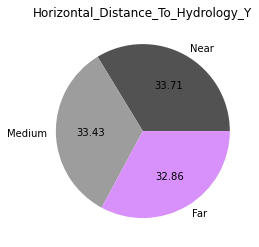

In [ ]:
# HANDLING CLASS IMBALANCE
DF["Horizontal_Distance_To_Hydrology_Y"], hor_dist_road_bins = pd.qcut(DF["Horizontal_Distance_To_Hydrology"], q=3, labels=[0,1,2], retbins=True)
DF["Horizontal_Distance_To_Hydrology_Y"] = DF["Horizontal_Distance_To_Hydrology_Y"].astype(int)

QUALITATIVE_ATTRIBUTES["Horizontal_Distance_To_Hydrology_Y"] = {0:"Near", 1:"Medium", 2:"Far"}
print("horizontal distance to hydrology class 0 = 1 ranges from {} to {}".format(hor_dist_road_bins[0], hor_dist_road_bins[1]))
print("horizontal distance to hydrology class 1 = 2 ranges from {} to {}".format(hor_dist_road_bins[1], hor_dist_road_bins[2]))
print("horizontal distance to hydrology class 2 = 3 ranges from {} to {}".format(hor_dist_road_bins[2], hor_dist_road_bins[3]))

plt.title("Horizontal_Distance_To_Hydrology_Y")
val_counts = DF["Horizontal_Distance_To_Hydrology_Y"].value_counts()
val_counts.plot(
    kind="pie", 
    labels=[QUALITATIVE_ATTRIBUTES["Horizontal_Distance_To_Hydrology_Y"][key] for key in val_counts.keys()], 
    colors=Colors.PIE,
    autopct='%.2f'
)
plt.ylabel("")
plt.show()

In [ ]:
show_corr_attribute(DF, "Horizontal_Distance_To_Hydrology_Y")

Horizontal_Distance_To_Hydrology_Y
positive correlations


Horizontal_Distance_To_Hydrology_Y    1.000000
Horizontal_Distance_To_Hydrology      0.903344
Vertical_Distance_To_Hydrology        0.500006
Geologic_Zone                         0.227709
Elevation                             0.188946
Soil_Type                             0.117699
Horizontal_Distance_To_Fire_Points    0.065358
Wilderness_Area                       0.024647
Horizontal_Distance_To_Roadways       0.024578
Hillshade_3pm                         0.022719
Climatic_Zone                         0.020672
Hillshade_Avg                         0.017551
Hillshade_Noon                        0.013544
Aspect_Class                          0.006729
Name: Horizontal_Distance_To_Hydrology_Y, dtype: float64


negative correlations


Cover_Type      -0.020498
Hillshade_9am   -0.018434
Aspect          -0.009389
Slope_Class     -0.006844
Slope           -0.006494
Name: Horizontal_Distance_To_Hydrology_Y, dtype: float64

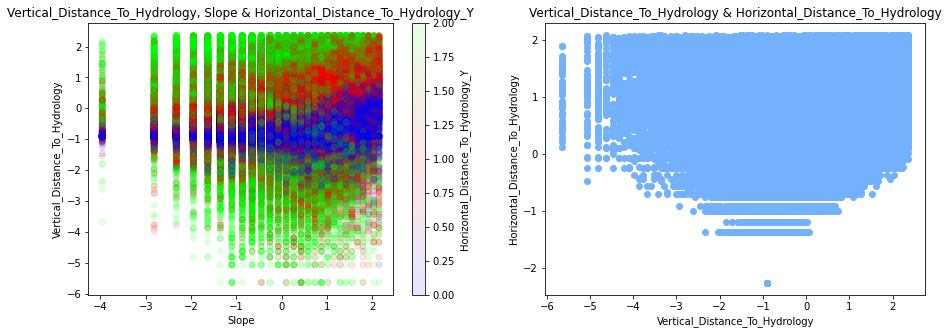

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title("Vertical_Distance_To_Hydrology, Slope & Horizontal_Distance_To_Hydrology_Y")
plt.xlabel("Slope")
plt.ylabel("Vertical_Distance_To_Hydrology")
x_axis = DF["Slope"]
y_axis = DF["Vertical_Distance_To_Hydrology"]
color = DF["Horizontal_Distance_To_Hydrology_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'brg'
), label="Horizontal_Distance_To_Hydrology_Y")

ax2 = plt.subplot(1,2,2)
plt.title("Vertical_Distance_To_Hydrology & Horizontal_Distance_To_Hydrology")
plt.xlabel("Vertical_Distance_To_Hydrology")
plt.ylabel("Horizontal_Distance_To_Hydrology")
x_axis = DF["Vertical_Distance_To_Hydrology"]
y_axis = DF["Horizontal_Distance_To_Hydrology"]
plt.scatter(x = x_axis, y = y_axis, color=Colors.BLUE)

plt.show()

<font color="blue"><b>OBSERVATION: </b></font>The above scatter plots confirm the negative correlation between "Vertical_Distance_To_Hydrology" and "Horizontal_Distance_To_Hydrology". "Vertical_Distance_To_Hydrology" and "Slope" seem like plausible feature choices to classify "Horizontal_Distance_To_Hydrology_Y" in this dataset.

<b>Hillshade_Avg</b>

hillshade avg class 0 = 1 ranges from -2.7286060923357134 to 0.08663126701043042
hillshade avg class 1 = 2 ranges from 0.08663126701043042 to 1.7369814854758474


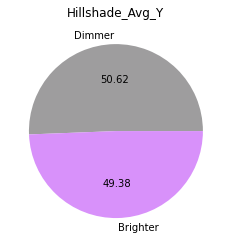

In [ ]:
# HANDLING CLASS IMBALANCE
DF["Hillshade_Avg_Y"], hillshade_avg_bins = pd.qcut(DF["Hillshade_Avg"], q=2, labels=[0,1], retbins=True)
DF["Hillshade_Avg_Y"] = DF["Hillshade_Avg_Y"].astype(int)

QUALITATIVE_ATTRIBUTES["Hillshade_Avg_Y"] = {0:"Dimmer", 1:"Brighter"}
print("hillshade avg class 0 = 1 ranges from {} to {}".format(hillshade_avg_bins[0], hillshade_avg_bins[1]))
print("hillshade avg class 1 = 2 ranges from {} to {}".format(hillshade_avg_bins[1], hillshade_avg_bins[2]))
# print("hillshade avg class 2 = 3 ranges from {} to {}".format(hillshade_avg_bins[2], hillshade_avg_bins[3]))

plt.title("Hillshade_Avg_Y")
val_counts = DF["Hillshade_Avg_Y"].value_counts()
val_counts.plot(
    kind="pie", 
    labels=[QUALITATIVE_ATTRIBUTES["Hillshade_Avg_Y"][key] for key in val_counts.keys()], 
    colors=Colors.PIE[1:3],
    autopct='%.2f'
)
plt.ylabel("")
plt.show()

In [ ]:
show_corr_attribute(DF, "Hillshade_Avg_Y")

Hillshade_Avg_Y
positive correlations


Hillshade_Avg_Y                       1.000000
Hillshade_Avg                         0.813221
Hillshade_Noon                        0.804715
Hillshade_3pm                         0.577434
Aspect                                0.440029
Elevation                             0.110781
Horizontal_Distance_To_Roadways       0.110276
Wilderness_Area                       0.010726
Horizontal_Distance_To_Hydrology_Y    0.006287
Name: Hillshade_Avg_Y, dtype: float64


negative correlations


Slope                                -0.426173
Slope_Class                          -0.409341
Hillshade_9am                        -0.193723
Geologic_Zone                        -0.134292
Aspect_Class                         -0.097525
Horizontal_Distance_To_Fire_Points   -0.061311
Vertical_Distance_To_Hydrology       -0.052128
Cover_Type                           -0.033646
Soil_Type                            -0.033400
Climatic_Zone                        -0.013182
Horizontal_Distance_To_Hydrology     -0.003370
Name: Hillshade_Avg_Y, dtype: float64

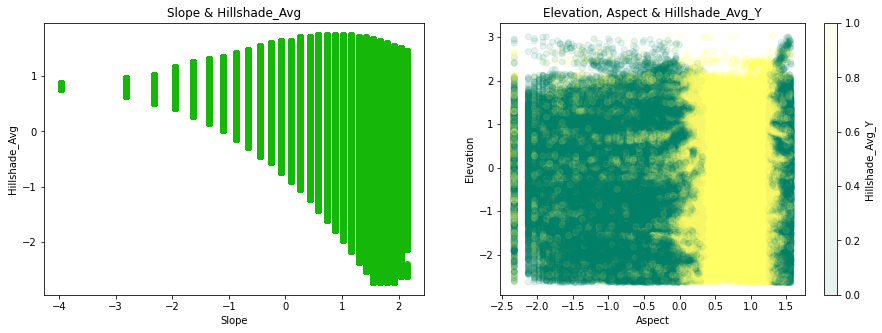

In [ ]:
fig = plt.figure(figsize=(15,5))

ax2 = plt.subplot(1,2,1)
plt.title("Slope & Hillshade_Avg")
plt.xlabel("Slope")
plt.ylabel("Hillshade_Avg")
x_axis = DF["Slope"]
y_axis = DF["Hillshade_Avg"]
plt.scatter(
    x = x_axis,
    y = y_axis,
    c = Colors.GREEN
)

ax2 = plt.subplot(1,2,2)
plt.title("Elevation, Aspect & Hillshade_Avg_Y")
plt.xlabel("Aspect")
plt.ylabel("Elevation")
x_axis = DF["Aspect"]
y_axis = DF["Elevation"]
color = DF["Hillshade_Avg_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'summer'
), label="Hillshade_Avg_Y")

plt.show()

<font color="blue"><b>OBSERVATION: </b></font>The negative correlation that "Hillshade_Avg" has with "Slope" is visible in the scatter plot. "Elevation", "Aspect" and "Slope" are likely good feature choices to classify "Hillshade_Avg_Y" in this dataset as scatter plot shows some clustering.

<b>Soil_Type</b>

soil type class 0 = 1 ranges from 1.0 to 23.0
soil type class 1 = 2 ranges from 23.0 to 30.0
soil type class 2 = 3 ranges from 30.0 to 40.0


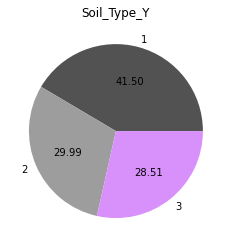

In [ ]:
# HANDLING CLASS IMBALANCE
DF["Soil_Type_Y"], soil_type_bins = pd.qcut(DF["Soil_Type"], q=3, labels=[0,1,2], retbins=True)
DF["Soil_Type_Y"] = DF["Soil_Type_Y"].astype(int)

QUALITATIVE_ATTRIBUTES["Soil_Type_Y"] = {0:1, 1:2, 2:3}
print("soil type class 0 = 1 ranges from {} to {}".format(soil_type_bins[0], soil_type_bins[1]))
print("soil type class 1 = 2 ranges from {} to {}".format(soil_type_bins[1], soil_type_bins[2]))
print("soil type class 2 = 3 ranges from {} to {}".format(soil_type_bins[2], soil_type_bins[3]))

plt.title("Soil_Type_Y")
val_counts = DF["Soil_Type_Y"].value_counts()
val_counts.plot(
    kind="pie", 
    labels=[QUALITATIVE_ATTRIBUTES["Soil_Type_Y"][key] for key in val_counts.keys()], 
    colors=Colors.PIE,
    autopct='%.2f'
)
plt.ylabel("")
plt.show()

In [ ]:
show_corr_attribute(DF, "Soil_Type_Y")

Soil_Type_Y
positive correlations


Soil_Type_Y                           1.000000
Soil_Type                             0.821211
Geologic_Zone                         0.588031
Climatic_Zone                         0.525065
Elevation                             0.396495
Horizontal_Distance_To_Hydrology      0.226468
Horizontal_Distance_To_Hydrology_Y    0.199665
Vertical_Distance_To_Hydrology        0.180834
Wilderness_Area                       0.177598
Slope_Class                           0.118953
Slope                                 0.118071
Horizontal_Distance_To_Roadways       0.062815
Cover_Type                            0.032005
Aspect                                0.027991
Aspect_Class                          0.013455
Hillshade_3pm                         0.007823
Name: Soil_Type_Y, dtype: float64


negative correlations


Hillshade_Avg_Y                      -0.058572
Hillshade_9am                        -0.057252
Hillshade_Noon                       -0.054798
Hillshade_Avg                        -0.054727
Horizontal_Distance_To_Fire_Points   -0.006079
Name: Soil_Type_Y, dtype: float64

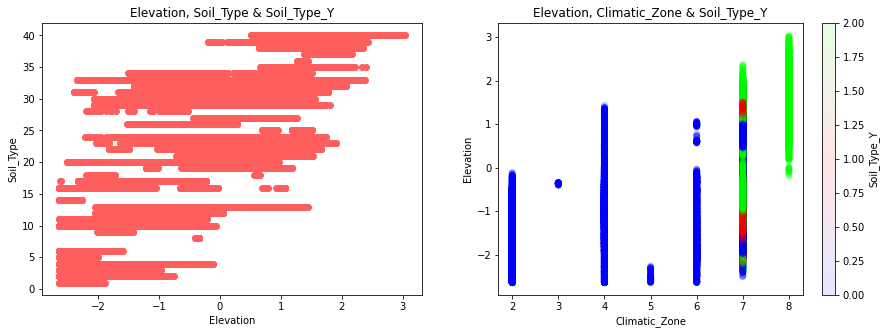

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title("Elevation, Soil_Type & Soil_Type_Y")
plt.xlabel("Elevation")
plt.ylabel("Soil_Type")
x_axis = DF["Elevation"]
y_axis = DF["Soil_Type"]
plt.scatter(x = x_axis, y = y_axis, color=Colors.RED)

ax2 = plt.subplot(1,2,2)
plt.title("Elevation, Climatic_Zone & Soil_Type_Y")
plt.xlabel("Climatic_Zone")
plt.ylabel("Elevation")
x_axis = DF["Climatic_Zone"]
y_axis = DF["Elevation"]
color = DF["Soil_Type_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'brg'
), label="Soil_Type_Y")

plt.show()

<font color="blue"><b>OBSERVATION: </b></font>The above scatter plots confirm the positive correlation between "Elevation" and "Soil_Type". "Elevation" and "Climatic Zone" are likely good feature choices to classify "Soil_Type" in this dataset.

<b>Cover_Type</b>

In [ ]:
print(QUALITATIVE_ATTRIBUTES["Cover_Type"])
DF["Cover_Type"].value_counts()

{1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}


2    206077
1    165466
3     14579
7     13840
6      8652
5      6648
4       126
Name: Cover_Type, dtype: int64

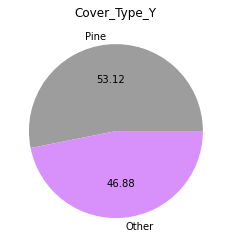

In [ ]:
# HANDLING CLASS IMBALANCE
DF["Cover_Type_Y"] = [0]*len(DF)
DF.loc[DF["Cover_Type"] == 2, "Cover_Type_Y"] = 1
DF.loc[DF["Cover_Type"] == 3, "Cover_Type_Y"] = 1

QUALITATIVE_ATTRIBUTES["Cover_Type_Y"] = {0:"Other", 1:"Pine"}

plt.title("Cover_Type_Y")
val_counts = DF["Cover_Type_Y"].value_counts()
val_counts.plot(
    kind="pie", 
    labels=[QUALITATIVE_ATTRIBUTES["Cover_Type_Y"][key] for key in val_counts.keys()], 
    colors=Colors.PIE[1:3],
    autopct='%.2f'
)
plt.ylabel("")
plt.show()

In [ ]:
show_corr_attribute(DF, "Cover_Type_Y")

Cover_Type_Y
positive correlations


Cover_Type_Y                          1.000000
Geologic_Zone                         0.218389
Cover_Type                            0.105523
Horizontal_Distance_To_Hydrology      0.084838
Horizontal_Distance_To_Hydrology_Y    0.075717
Vertical_Distance_To_Hydrology        0.067436
Hillshade_9am                         0.063360
Hillshade_Noon                        0.045092
Slope                                 0.035490
Slope_Class                           0.033920
Hillshade_Avg                         0.026885
Hillshade_Avg_Y                       0.012069
Wilderness_Area                       0.003689
Name: Cover_Type_Y, dtype: float64


negative correlations


Elevation                            -0.440494
Climatic_Zone                        -0.285436
Soil_Type                            -0.206130
Horizontal_Distance_To_Roadways      -0.111509
Soil_Type_Y                          -0.061657
Hillshade_3pm                        -0.035309
Aspect                               -0.011944
Aspect_Class                         -0.011378
Horizontal_Distance_To_Fire_Points   -0.002155
Name: Cover_Type_Y, dtype: float64

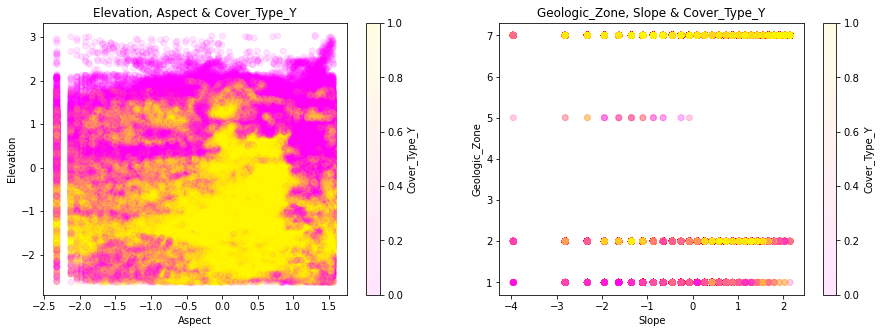

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title("Elevation, Aspect & Cover_Type_Y")
plt.xlabel("Aspect")
plt.ylabel("Elevation")
x_axis = DF["Aspect"]
y_axis = DF["Elevation"]
color = DF["Cover_Type_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'spring'
), label="Cover_Type_Y")

ax2 = plt.subplot(1,2,2)
plt.title("Geologic_Zone, Slope & Cover_Type_Y")
plt.xlabel("Slope")
plt.ylabel("Geologic_Zone")
x_axis = DF["Slope"]
y_axis = DF["Geologic_Zone"]
color = DF["Cover_Type_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'spring'
), label="Cover_Type_Y")

plt.show()

<font color="blue"><b>OBSERVATION: </b></font>"Elevation", "Aspect", "Slope" and "Wilderness_Area" are likely good feature choices to classify "Cover_Type_Y" in this dataset as scatter plot shows some clustering.

<b>Wilderness_Area</b>

In [ ]:
print(QUALITATIVE_ATTRIBUTES["Wilderness_Area"])
print(DF["Wilderness_Area"].value_counts())

{1: 'Rawah', 2: 'Neota', 3: 'Comanche Peak', 4: 'Cache la Poudre'}
1    195301
3    189221
2     21852
4      9014
Name: Wilderness_Area, dtype: int64


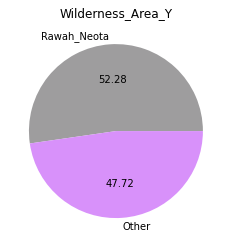

In [ ]:
# HANDLING CLASS IMBALANCE
DF["Wilderness_Area_Y"] = [0]*len(DF)
DF.loc[DF["Wilderness_Area"] <= 2, "Wilderness_Area_Y"] = 1

QUALITATIVE_ATTRIBUTES["Wilderness_Area_Y"] = {0:"Other", 1:"Rawah_Neota"}

plt.title("Wilderness_Area_Y")
val_counts=DF["Wilderness_Area_Y"].value_counts()
val_counts.plot(
    kind="pie", 
    labels=[QUALITATIVE_ATTRIBUTES["Wilderness_Area_Y"][key] for key in val_counts.keys()], 
    colors=Colors.PIE[1:3],
    autopct='%.2f'
)
plt.ylabel("")
plt.show()

In [ ]:
show_corr_attribute(DF, "Wilderness_Area_Y")

Wilderness_Area_Y
positive correlations


Wilderness_Area_Y                     1.000000
Horizontal_Distance_To_Roadways       0.273394
Horizontal_Distance_To_Fire_Points    0.259194
Climatic_Zone                         0.255115
Hillshade_9am                         0.161613
Elevation                             0.157291
Soil_Type                             0.138191
Name: Wilderness_Area_Y, dtype: float64


negative correlations


Wilderness_Area                      -0.965794
Soil_Type_Y                          -0.201141
Slope                                -0.185558
Slope_Class                          -0.178832
Cover_Type                           -0.176647
Geologic_Zone                        -0.133840
Vertical_Distance_To_Hydrology       -0.120286
Hillshade_3pm                        -0.118213
Aspect                               -0.086414
Hillshade_Noon                       -0.028546
Hillshade_Avg                        -0.024953
Horizontal_Distance_To_Hydrology     -0.024784
Cover_Type_Y                         -0.022588
Horizontal_Distance_To_Hydrology_Y   -0.019388
Aspect_Class                         -0.017311
Hillshade_Avg_Y                      -0.007503
Name: Wilderness_Area_Y, dtype: float64

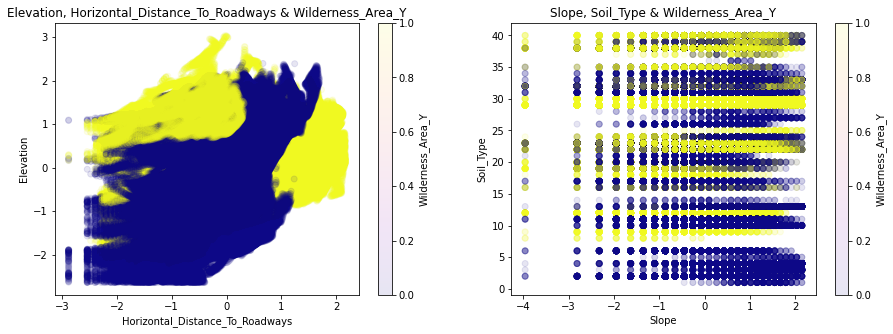

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title("Elevation, Horizontal_Distance_To_Roadways & Wilderness_Area_Y")
plt.xlabel("Horizontal_Distance_To_Roadways")
plt.ylabel("Elevation")
x_axis = DF["Horizontal_Distance_To_Roadways"]
y_axis = DF["Elevation"]
color = DF["Wilderness_Area_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'plasma'
), label="Wilderness_Area_Y")

ax2 = plt.subplot(1,2,2)
plt.title("Slope, Soil_Type & Wilderness_Area_Y")
plt.xlabel("Slope")
plt.ylabel("Soil_Type")
x_axis = DF["Slope"]
y_axis = DF["Soil_Type"]
color = DF["Wilderness_Area_Y"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'plasma'
), label="Wilderness_Area_Y")

plt.show()

<font color="blue"><b>OBSERVATION: </b></font>"Elevation", "Horizontal_Distance_To_Roadways", "Slope", "Climatic_Zone" and "Soil_Type" (since it has high correlation with climatic zone) are likely good feature choices to classify "Cover_Type_Y" in this dataset as scatter plot shows some clustering.

<font color="blue"><b>OBSERVATION: </b></font><b>Hillshade_Avg_Y</b> shall be the current chosen <b>class attribute</b> as it has fairly balanced classes and shows good clustering and correlations.

Let attributes that are redundant, spurious or unnecessary w.r.t. "Hillsahde_Avg_Y" as class attribute be removed from the data set to create a new dataframe object upin which to apply Naive Bayes classifier.

In [ ]:
CLASS_ATTRIBUTE = "Hillshade_Avg_Y"
NUM_CLASSES = len(DF["Hillshade_Avg_Y"].value_counts())
Hillshade_Avg_Y_INVALID_ATTRIBUTES = [
    "Cover_Type_Y",  
    "Soil_Type_Y",  
    "Wilderness_Area_Y",  
    "Hillshade_9am",  
    "Hillshade_3pm",  
    "Hillshade_Noon",  
    "Hillshade_Avg"
] 
DF_part1 = DF.drop(Hillshade_Avg_Y_INVALID_ATTRIBUTES, axis=1)

##  4.1. Per Class Correlation Analysis

In [ ]:
QUALITATIVE_ATTRIBUTES["Hillshade_Avg_Y"]

{0: 'Dimmer', 1: 'Brighter'}

Following cells shall analyze class wise correlating features for the "Wilderness_Area_Y" target attribute.

In [ ]:
# SPLITTING CLASSES OF TARGET ATTRIBUTE 
class1_Brighter = DF_part1[CLASS_ATTRIBUTE].values.tolist()
class2_Dimmer = [1-x for x in DF_part1[CLASS_ATTRIBUTE].values.tolist()]

DF_1Brighter =  DF_part1.drop([CLASS_ATTRIBUTE], axis=1)
DF_1Brighter[CLASS_ATTRIBUTE] = class1_Brighter

DF_2Dimmer =  DF_part1.drop([CLASS_ATTRIBUTE], axis=1)
DF_2Dimmer[CLASS_ATTRIBUTE] = class2_Dimmer

In [ ]:
# CLASS 1 correlations
show_corr_attribute(DF_1Brighter, "Hillshade_Avg_Y")

Hillshade_Avg_Y
positive correlations


Hillshade_Avg_Y                       1.000000
Aspect                                0.438961
Elevation                             0.110325
Horizontal_Distance_To_Roadways       0.109706
Wilderness_Area                       0.011019
Horizontal_Distance_To_Hydrology_Y    0.006258
Name: Hillshade_Avg_Y, dtype: float64


negative correlations


Slope                                -0.424304
Slope_Class                          -0.407767
Geologic_Zone                        -0.133617
Aspect_Class                         -0.097950
Horizontal_Distance_To_Fire_Points   -0.061734
Vertical_Distance_To_Hydrology       -0.051548
Cover_Type                           -0.033390
Soil_Type                            -0.033273
Climatic_Zone                        -0.013261
Horizontal_Distance_To_Hydrology     -0.003284
Name: Hillshade_Avg_Y, dtype: float64

<font color="blue"><b>OBSERVATION: </b></font>Most correlating features compared to others for class 1 are: "Aspect", "Slope", "Horizontal_Distance_To_Roadways", "Elevation", "Horizontal_Distance_To_Fire_Points" and "Vertical_Distance_To_Hydrology".

In [ ]:
# CLASS 2 correlations
show_corr_attribute(DF_2Dimmer, "Hillshade_Avg_Y")

Hillshade_Avg_Y
positive correlations


Hillshade_Avg_Y                       1.000000
Slope                                 0.424304
Slope_Class                           0.407767
Geologic_Zone                         0.133617
Aspect_Class                          0.097950
Horizontal_Distance_To_Fire_Points    0.061734
Vertical_Distance_To_Hydrology        0.051548
Cover_Type                            0.033390
Soil_Type                             0.033273
Climatic_Zone                         0.013261
Horizontal_Distance_To_Hydrology      0.003284
Name: Hillshade_Avg_Y, dtype: float64


negative correlations


Aspect                               -0.438961
Elevation                            -0.110325
Horizontal_Distance_To_Roadways      -0.109706
Wilderness_Area                      -0.011019
Horizontal_Distance_To_Hydrology_Y   -0.006258
Name: Hillshade_Avg_Y, dtype: float64

<font color="blue"><b>OBSERVATION: </b></font>Most correlating features compared to others for class 1 are: "Slope", "Aspect", "Horizontal_Distance_To_Roadways", "Elevation", "Horizontal_Distance_To_Fire_Points" and "Vertical_Distance_To_Hydrology".

# 5. Classifier Performance Evaluation Functions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [ ]:
def calculate_performance_measures(cm_df):
    ''' Calculates and returns:
        * TP, TN, FP, FN
        * Precision, Recall
        * F-Measure
        of every class in given confusion matrix DataFrame.
    '''
    metrics = {}
    attributes = list(cm_df.columns)
    
    for attribute in attributes:
        tp = cm_df.loc[[attribute], [attribute]].values[0][0]
        fp = cm_df.loc[:, [attribute]].drop([attribute],axis=0).values.sum()
        fn = cm_df.loc[[attribute], :].drop([attribute],axis=1).values.sum()
        tn = sum([cm_df.loc[[label], [label]].values[0][0] for label in attributes if label != attribute])
        precision = tp/(tp+fn)
        recall = tp/(tp+fp)
        f = 2*((recall*precision)/(recall+precision))
        tp_rate = tp/(tp+fn)
        fp_rate = fp/(fp+tn)
        metrics[attribute] = {
            "TP": tp, 
            "TN": tn,
            "FP": fp, 
            "FN": fn, 
            "Precision": precision, 
            "Recall": recall, 
            "F": f
        }
        
    return metrics

In [ ]:
def get_performance_measures(classifier_name, df_name, test, prediction, class_attribute):
    ''' Returns all performance measures of current model on given dataset. '''
    print(TextStyle.GREEN(TextStyle.BOLD("Performance of {} on {}.".format(classifier_name, df_name))))
    
    performance_measures = {}
    test = np.array(test)
    
    accuracy = accuracy_score(test, prediction)
    performance_measures["Accuracy"] = accuracy
    
    # confusion matrix
    labels = list(QUALITATIVE_ATTRIBUTES[class_attribute].values())
    cm = pd.DataFrame(confusion_matrix(test, prediction), index=labels, columns=labels)
    performance_measures["Confusion Matrix"] = cm.values.tolist()
    
    # other performance measures for each attribute
    performance_measures["Class Specific Performance"] = calculate_performance_measures(cm)
    
    # get ROC curve parameters and AUC
    fp_rate, tp_rate, threshold = roc_curve(test, prediction)
    auc_val = auc(fp_rate, tp_rate)
    performance_measures["ROC"] = {
        "FP Rate": fp_rate[1],
        "TP Rate": tp_rate[1],
        "AUC": auc_val
    }
    
    print_dict(performance_measures, "\nPerformance Measures")

    # plziptting measures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    sns.heatmap(cm, cmap="viridis", annot=True, ax=ax1)  # plot confusion matrix
    ax1.set_title("Confusion Matrix")

    # plot roc curve
    plt.plot(
        fp_rate, 
        tp_rate, 
        linestyle='-', 
        label="AUC = {:0.3f}".format(auc_val), 
        color=Colors.PINK, 
        axes=ax2
    )
    ax2.set_title("ROC Curve - AUC")
    ax2.legend()    
    plt.show()
    
    return performance_measures

# 6. Naive Bayes Classifier

In [ ]:
y = DF_part1["Hillshade_Avg_Y"]
corr5best = DF_part1[["Slope", "Aspect", "Horizontal_Distance_To_Roadways", "Elevation", "Horizontal_Distance_To_Fire_Points"]]
corr3best = DF_part1[["Slope", "Aspect", "Elevation"]]
corr1best = DF_part1[["Slope"]]

In [ ]:
from sklearn.model_selection import train_test_split

corr5best_X_train, corr5best_X_test, corr5best_y_train, corr5best_y_test = train_test_split(corr5best, y, test_size = 0.25, random_state = 23, stratify=y)
print("corr5best_X_train shape = {}, corr5best_X_test shape = {}, corr5best_y_train shape = {}, corr5best_y_test shape = {}".format(
    corr5best_X_train.shape,
    corr5best_X_test.shape,
    corr5best_y_train.shape,
    corr5best_y_test.shape
))

corr3best_X_train, corr3best_X_test, corr3best_y_train, corr3best_y_test = train_test_split(corr3best, y, test_size = 0.25, random_state = 23)
print("corr3best_X_train shape = {}, corr3best_X_test shape = {}, corr3best_y_train shape = {}, corr3best_y_test shape = {}".format(
    corr3best_X_train.shape,
    corr3best_X_test.shape,
    corr3best_y_train.shape,
    corr3best_y_test.shape
))

corr1best_X_train, corr1best_X_test, corr1best_y_train, corr1best_y_test = train_test_split(corr1best, y, test_size = 0.25, random_state = 23)
print("corr1best_X_train shape = {}, corr1best_X_test shape = {}, corr1best_y_train shape = {}, corr1best_y_test shape = {}".format(
    corr1best_X_train.shape,
    corr1best_X_test.shape,
    corr1best_y_train.shape,
    corr1best_y_test.shape
))

corr5best_X_train shape = (311541, 5), corr5best_X_test shape = (103847, 5), corr5best_y_train shape = (311541,), corr5best_y_test shape = (103847,)
corr3best_X_train shape = (311541, 3), corr3best_X_test shape = (103847, 3), corr3best_y_train shape = (311541,), corr3best_y_test shape = (103847,)
corr1best_X_train shape = (311541, 1), corr1best_X_test shape = (103847, 1), corr1best_y_train shape = (311541,), corr1best_y_test shape = (103847,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_Classifier = GaussianNB()

Performance of NB_Classifier on corr5best_X_test.

Performance Measures
Accuracy: 0.7999075563088004
Confusion Matrix: [[42404, 10159], [10620, 40664]]
Class Specific Performance: 
	Dimmer: 
		TP: 42404
		TN: 40664
		FP: 10620
		FN: 10159
		Precision: 0.8067271654966421
		Recall: 0.7997133373566687
		F: 0.8032049400020836
	Brighter: 
		TP: 40664
		TN: 42404
		FP: 10159
		FN: 10620
		Precision: 0.7929178691209734
		Recall: 0.8001101863329595
		F: 0.7964977915324122
ROC: 
	FP Rate: 0.1932728345033579
	TP Rate: 0.7929178691209734
	AUC: 0.7998225173088078


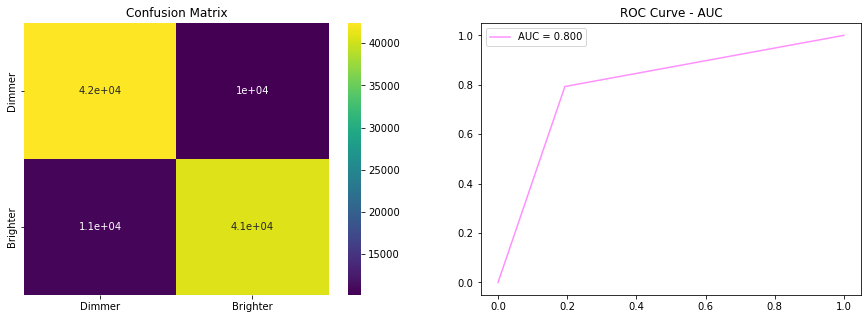

Performance of NB_Classifier on corr3best_X_test.

Performance Measures
Accuracy: 0.7982897917128082
Confusion Matrix: [[42130, 10394], [10553, 40770]]
Class Specific Performance: 
	Dimmer: 
		TP: 42130
		TN: 40770
		FP: 10553
		FN: 10394
		Precision: 0.8021095118422055
		Recall: 0.7996887041360591
		F: 0.8008972786981854
	Brighter: 
		TP: 40770
		TN: 42130
		FP: 10394
		FN: 10553
		Precision: 0.7943806870214134
		Recall: 0.7968493471972481
		F: 0.7956131021495408
ROC: 
	FP Rate: 0.19789048815779453
	TP Rate: 0.7943806870214134
	AUC: 0.7982450994318094


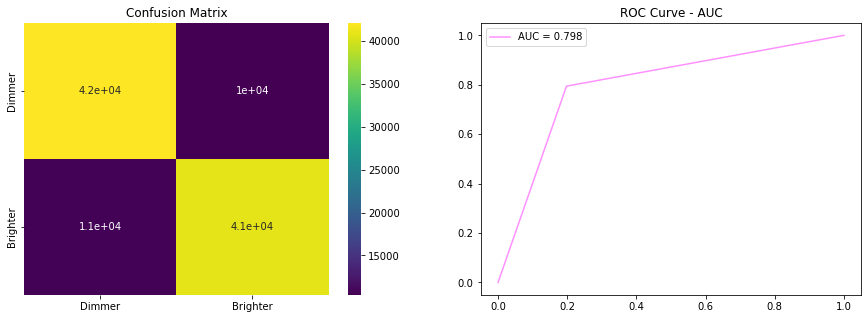

Performance of NB_Classifier on corr1best_X_test.

Performance Measures
Accuracy: 0.681637408880372
Confusion Matrix: [[40264, 12260], [20801, 30522]]
Class Specific Performance: 
	Dimmer: 
		TP: 40264
		TN: 30522
		FP: 20801
		FN: 12260
		Precision: 0.7665828954382758
		Recall: 0.6593629738802915
		F: 0.7089418869784927
	Brighter: 
		TP: 30522
		TN: 40264
		FP: 12260
		FN: 20801
		Precision: 0.5947041287531906
		Recall: 0.7134308821466973
		F: 0.6486796663301632
ROC: 
	FP Rate: 0.23341710456172415
	TP Rate: 0.5947041287531906
	AUC: 0.6806435120957331


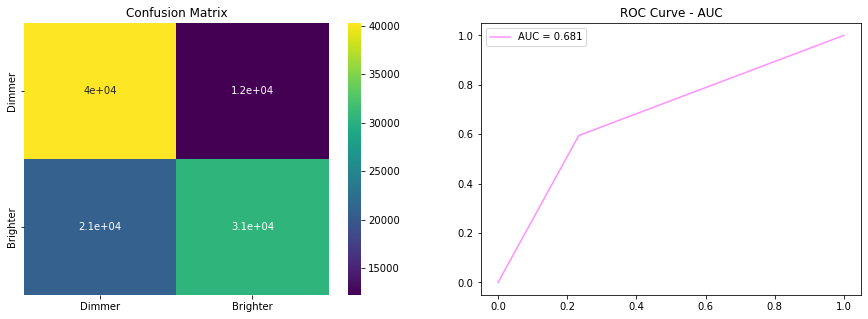

In [ ]:
NB_Classifier.fit(corr5best_X_train, corr5best_y_train)
corr5best_y_predicted = NB_Classifier.predict(corr5best_X_test)
corr5best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "corr5best_X_test", corr5best_y_test, corr5best_y_predicted, "Hillshade_Avg_Y")

NB_Classifier.fit(corr3best_X_train, corr3best_y_train)
corr3best_y_predicted = NB_Classifier.predict(corr3best_X_test)
corr3best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "corr3best_X_test", corr3best_y_test, corr3best_y_predicted, "Hillshade_Avg_Y")

NB_Classifier.fit(corr1best_X_train, corr1best_y_train)
corr1best_y_predicted = NB_Classifier.predict(corr1best_X_test)
corr1best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "corr1best_X_test", corr1best_y_test, corr1best_y_predicted, "Hillshade_Avg_Y")

<font color="blue"><b>OBSERVATION: </b></font>From performance analysis results of all 3 datasets, corr5best with 5 features reports highest ROC AUC, F values and accuracy compared to corr1best and corr3best. Attributes, "Slope", "Aspect", "Horizontal_Distance_To_Roadways", "Elevation" and "Horizontal_Distance_To_Fire_Points" are the attributes best suited to be features when trying to predict "Hillshade_Avg_Y" class.

## 6.1. Feature Selection Using Another Univariate Method: SelectKBest
(Shaikh Rahil, 2018)

To see if there exists other better feature choices that could have led to better predictions for "Hillshade_Avg_Y", this time, features are chosen using SelectKBest feature selector from the sklearn library using "F-Measures" for scorring (f1 scorring) instead of using correlations between 2 variables.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = DF_part1.drop(["Hillshade_Avg_Y"], axis=1)
y = DF_part1["Hillshade_Avg_Y"]

feature_selector5 = SelectKBest(f_classif, k=5)
feature_selector5.fit_transform(X, y)
selected_cols = feature_selector5.get_support(indices=False)
k5best = X.iloc[:,selected_cols]
display(k5best.head(3))

feature_selector3 = SelectKBest(f_classif, k=3)
feature_selector3.fit_transform(X, y)
selected_cols = feature_selector3.get_support(indices=False)
k3best = X.iloc[:,selected_cols]
display(k3best.head(3))

feature_selector1 = SelectKBest(f_classif, k=1)
feature_selector1.fit_transform(X, y)
selected_cols = feature_selector1.get_support(indices=False)
k1best = X.iloc[:,selected_cols]
display(k1best.head(3))

Aspect  Elevation     Slope  Geologic_Zone  Slope_Class
0  0.195764  -0.478195 -0.075538              7            3
1  0.641481  -0.504050  0.877927              7            4
2  0.170550  -0.148133  0.732384              7            4

Aspect     Slope  Slope_Class
0  0.195764 -0.075538            3
1  0.641481  0.877927            4
2  0.170550  0.732384            4

Aspect
0  0.195764
1  0.641481
2  0.170550

In [ ]:
k5best_X_train, k5best_X_test, k5best_y_train, k5best_y_test = train_test_split(k5best, y, test_size = 0.25, random_state = 23, stratify=y)
print("k5best_X_train shape = {}, k5best_X_test shape = {}, k5best_y_train shape = {}, k5best_y_test shape = {}".format(
    k5best_X_train.shape,
    k5best_X_test.shape,
    k5best_y_train.shape,
    k5best_y_test.shape
))

k3best_X_train, k3best_X_test, k3best_y_train, k3best_y_test = train_test_split(k3best,y,test_size = 0.25,random_state = 23)
print("k3best_X_train shape = {}, k3best_X_test shape = {}, k3best_y_train shape = {}, k3best_y_test shape = {}".format(
    k3best_X_train.shape,
    k3best_X_test.shape,
    k3best_y_train.shape,
    k3best_y_test.shape
))

k1best_X_train, k1best_X_test, k1best_y_train, k1best_y_test = train_test_split(k1best,y,test_size = 0.25,random_state = 23)
print("k1best_X_train shape = {}, k1best_X_test shape = {}, k1best_y_train shape = {}, k1best_y_test shape = {}".format(
    k1best_X_train.shape,
    k1best_X_test.shape,
    k1best_y_train.shape,
    k1best_y_test.shape
))

k5best_X_train shape = (311541, 5), k5best_X_test shape = (103847, 5), k5best_y_train shape = (311541,), k5best_y_test shape = (103847,)
k3best_X_train shape = (311541, 3), k3best_X_test shape = (103847, 3), k3best_y_train shape = (311541,), k3best_y_test shape = (103847,)
k1best_X_train shape = (311541, 1), k1best_X_test shape = (103847, 1), k1best_y_train shape = (311541,), k1best_y_test shape = (103847,)


Performance of NB_Classifier on k5best_X_test.

Performance Measures
Accuracy: 0.7457509605477288
Confusion Matrix: [[42963, 9600], [16803, 34481]]
Class Specific Performance: 
	Dimmer: 
		TP: 42963
		TN: 34481
		FP: 16803
		FN: 9600
		Precision: 0.8173620227155984
		Recall: 0.7188535287621725
		F: 0.7649493897390701
	Brighter: 
		TP: 34481
		TN: 42963
		FP: 9600
		FN: 16803
		Precision: 0.6723539505498791
		Recall: 0.7822190966629614
		F: 0.7231374193886646
ROC: 
	FP Rate: 0.18263797728440156
	TP Rate: 0.6723539505498791
	AUC: 0.7448579866327387


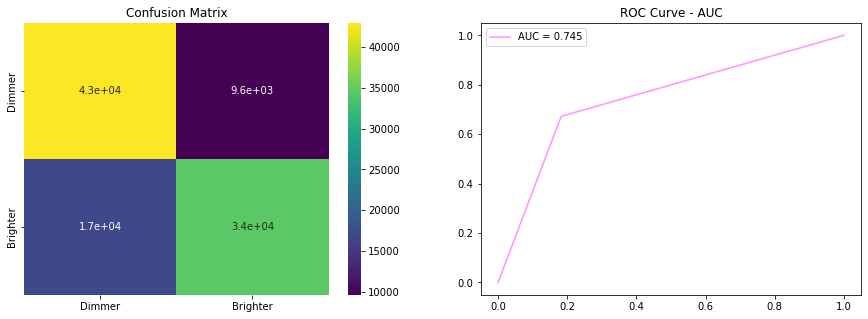

Performance of NB_Classifier on k3best_X_test.

Performance Measures
Accuracy: 0.7338006875499533
Confusion Matrix: [[42681, 9843], [17801, 33522]]
Class Specific Performance: 
	Dimmer: 
		TP: 42681
		TN: 33522
		FP: 17801
		FN: 9843
		Precision: 0.8125999543066027
		Recall: 0.7056810290664991
		F: 0.7553758207528802
	Brighter: 
		TP: 33522
		TN: 42681
		FP: 9843
		FN: 17801
		Precision: 0.6531574537731621
		Recall: 0.7730197163611208
		F: 0.7080517066576547
ROC: 
	FP Rate: 0.1874000456933973
	TP Rate: 0.6531574537731621
	AUC: 0.7328787040398824


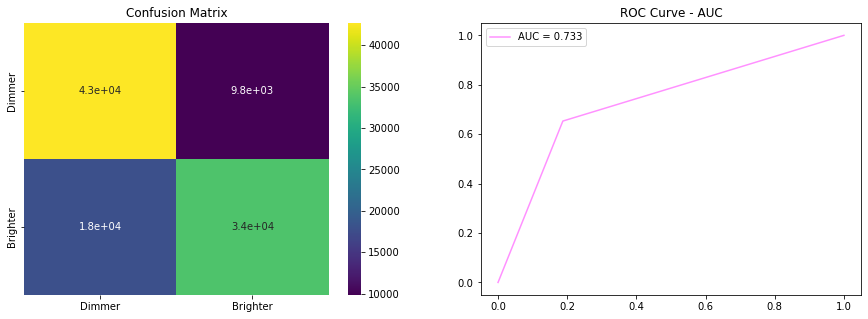

Performance of NB_Classifier on k1best_X_test.

Performance Measures
Accuracy: 0.7850973066145387
Confusion Matrix: [[39726, 12798], [9519, 41804]]
Class Specific Performance: 
	Dimmer: 
		TP: 39726
		TN: 41804
		FP: 9519
		FN: 12798
		Precision: 0.7563399588759424
		Recall: 0.8067011879378617
		F: 0.7807092533089645
	Brighter: 
		TP: 41804
		TN: 39726
		FP: 12798
		FN: 9519
		Precision: 0.8145275997116302
		Recall: 0.7656129812094795
		F: 0.7893131932971442
ROC: 
	FP Rate: 0.24366004112405756
	TP Rate: 0.8145275997116302
	AUC: 0.7854337792937863


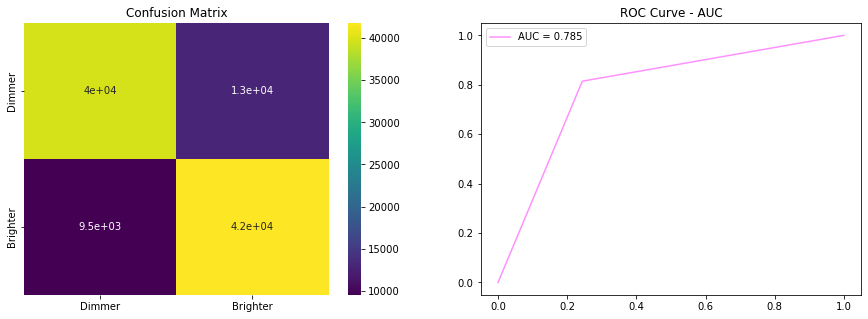

In [ ]:
NB_Classifier.fit(k5best_X_train, k5best_y_train)
k5best_y_predicted = NB_Classifier.predict(k5best_X_test)
k5best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "k5best_X_test", k5best_y_test, k5best_y_predicted, "Hillshade_Avg_Y")

NB_Classifier.fit(k3best_X_train, k3best_y_train)
k3best_y_predicted = NB_Classifier.predict(k3best_X_test)
k3best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "k3best_X_test", k3best_y_test, k3best_y_predicted, "Hillshade_Avg_Y")

NB_Classifier.fit(k1best_X_train, k1best_y_train)
k1best_y_predicted = NB_Classifier.predict(k1best_X_test)
k1best_NB_Classifier_performance = get_performance_measures("NB_Classifier", "k1best_X_test", k1best_y_test, k1best_y_predicted, "Hillshade_Avg_Y")

<font color="blue"><b>OBSERVATION: </b></font>
* The manual, correlation and general understanding through statistical inference based method showed better performance in terms of accuracy, F values and ROC AUC. This suggests that method adopted to pick feature attributes is valid. 
* Both univariate methods of feature selection have yielded almost similar results with best ROC AUC values being 0.79 & 0.78 indicating that Naive Bayes Classifier is able to classify Hillshade_Avg_Y fairly well. This suggests that method followed to identify a suitable class attribute has led to success. 
* With attributes chosen by the SelectKBest methods, the curse of dimensionality is clearly visible as just using 1 feature produces better results than using 5 or 3.

# <u>Part 2</u>
In the previous part, through manual tests and statistical inference, "Hillshade_Avg" was identified as an attribute that could be a good class attribute. This values of this attribite was then binned to create 2 classes and Naive Bayes classifier was used to try and predict the new class attribute, "Hillshade_Avg_Y". This led to an ROC AUC value in the range (70, 80).

Since hillshade corresponds to light recieved in an area, it was intuitive to divide those values which are known to be within a fixed range [0,255] into 2 classes, "Brigher" and "Dimmer". But, with other more continuous numeric attributes, manually identifying patters and classifying them is not so easy.

So, in part 2, it shall be the aim to identify clusters of data points w.r.t. some of the other continuous numeric attributes. This can be done using hard/soft clustering algorithms. Here, K-Means clustring shall be the hard clustering algorithm explore and Gaussian Mixture Models (GMM) and DBSCAN clustering  shall be the soft clustring models explored. The data set could then be categorized based on the clusters found using unsupervised clustering algorithms and then supervised learning algorithms like can be used to try and predict these newyly discovered classes.

# 7. Clustering
(Carleton AI Society, 2021)

Clustering is the process of taking data points in a dataset and grouping them based on similarities and differences between the points w.r.t. some selected attributes. In clustering, the aim is to group similar points together such that the points in a cluster are as similar to each other as possible and as different from points in other clusters as possible. Clusering is often considered for unsupervised learning since identifying clusters can be helpful in determining classes in a dataset when no class attribute is known beforehand.

  There are 2 broad categories of clustering algorithms. (Srinivasan, 2018) 
   1. <b>Hard Clustering: </b> In this type of clustering, each data point is assigned a discrete cluster. Every data point would belong to just 1 cluster.
   2. <b>Soft Clustering:</b> In this type of clustering, the probability of the data point belonging to each of n plausible clusters is determined for each data point and the cluster with highest probability is chosen.

Clustering can further be classified into 4 types. (J. Thompson, 2019) 
1. <b>Connectivity Based:</b> In this kind of clustering, clusters are formed based on the distances between the data points themselves. Here, wither one starts with a cluster per data point and then groups points together depending on distances between them until k clusters are obtained or one can start with one big cluster and divide it into smaller clusters based on distances between data points until k clusters are obtained. Hierarchical clustering is an example of connectivity based clustering.
2. <b>Centroid Based:</b> In this kind of clustering, data points are assigned clusters based on distance to a centroids (usually mean) of clusters with the cluster with smallest distance getting chosen at the end. K-Means clustering is an example of centroid based clustering.
3. <b>Expectation Maximization (EM) Based:</b> Such algorithms calculate for each data point, the probability of it belonging to each cluster based on a probability distribution. Each data point can then be assigned the cluster which it has maximum probability of belonging to. Mixture models like the Gaussian Mixture Model is an example of EM based clustering algorithms.  (RapidMiner Studio Core, no date)
4. <b>Density Based:</b> These algorithms take into account denstiy differences between data points. They try to determine areas where the points are packed together closely and where they are sparse. An example of such an algorithm would be Density-Based Spatial Clustering of Applications with Noise (DBSCAN). (ArcGIS Pro 2.8, no date)

In [ ]:
DF_part2 = DF

## 7.1. Scaling & Standardization

Clustering algorithms like K Means Clustering calculate distances (like distance to centroid) and so, tend to perform better when the data is standardised and all attributes have similar scale (Shivangi Singh, 2021). The StandardScaler was already used in part 1 to scale and standardize the quantitative attributes in this dataset. So we're good to go!

In [ ]:
display(DF_part2[QUANTITATIVE_ATTRIBUTES].head())

Aspect  Elevation  Hillshade_Avg  Horizontal_Distance_To_Hydrology  \
0  0.195764  -0.478195       0.743804                          0.893278   
1  0.641481  -0.504050       1.639666                          0.145250   
2  0.170550  -0.148133       0.304286                          0.682008   
3 -0.951088  -0.417751      -2.099637                          0.286092   
4 -0.203811  -0.191834      -0.160400                         -1.201236   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.021373                         1.646097   
1                        0.102570                         1.529573   
2                       -0.116149                         1.923233   
3                       -0.212573                         1.622773   
4                       -0.651817                         1.894324   

   Hillshade_Noon     Slope  Hillshade_3pm  \
0        0.878138 -0.075538      -0.229466   
1        1.771940  0.877927       1.157769   
2        0.608552  0.732384      -0.745647   
3       -2.007376  1.156698      -1.390873   
4       -0.054234 -0.075538      -0.874692   

   Horizontal_Distance_To_Fire_Points  Hillshade_9am  
0                            1.936476       0.888270  
1                            2.114465      -0.521989  
2                            1.480859       1.203988  
3                            1.978880       0.220584  
4                            1.563009       1.151037

In [ ]:
print(len(QUANTITATIVE_ATTRIBUTES))

11


## 7.2.Visualizing Clusters
To understand and analize clusters, its would help to view them as graphs. The following functions allow for this.

In [ ]:
def plot_clusters(clusterer, xy_df, clusters, centroids=[], boundaries=True, cmap='Pastel2'):
    ''' Draws scatter plot of clusters (possibly with centroids) given x axis and y axis values as dataframe, xy_df.'''
    x_title = xy_df.columns[0]
    y_title = xy_df.columns[1]
    
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    x_axis = xy_df[x_title]
    y_axis = xy_df[y_title]
    color = clusters
    
    # plot decision boundaries
    if boundaries:
        X = np.array(xy_df)
        mins = X.min(axis=0) - 0.1
        maxs = X.max(axis=0) + 0.1
        xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), np.linspace(mins[1], maxs[1], 1000))
        Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    # plot data points
    plt.scatter(x=x_axis, y=y_axis, s=0.5, c=color, cmap=cmap) 
    
    # plot centroids
    if len(centroids) > 0: plt.scatter(x=centroids[:,0], y=centroids[:,1], color="white", marker='o', s=60, linewidths=5)
    if len(centroids) > 0: plt.scatter(x=centroids[:,0], y=centroids[:,1], color="red", marker='x', s=40, linewidths=3)

## 7.3. Clustering Evaluation
(M. Pathak, 2020), (Tom, 2016), (H. Wei, 2020), (Geeks For Geeks, 2021)<br><br>
Generally, a clustering algorithm is considered to be good when inter-cluster distance (distance between different clusters) is large and intra-cluster distance (distance between points within a cluster) is small. This scenario is what most clustering algorithms aim to achieve.
Two popular ways to evaluate performance of clustering algorithms are given below.
1. <b>Silhouette Coefficient (SC):</b> The Silhouette Coefficient is calculated as s = (b - a)/max(a, b) where a is the average distance between a data point and other points within the same cluster and b is the average distance between a data point and other points in the nearest neighbor cluster. The final Silhouette Score for the algorithm would be the mean of Silhouette Coefficients calculated for every data point. The score shall fall in the range \[-1, 1\] where -1 indicates wrong clustering, 1 indicated dense clustering and 0 indicates overlapping clusters as distances between them are not too much. (A, Bhardwaj, 2020)
2. <b>Calinski Harabasz Index (CH Score):</b> This metric uses distance to cluster centroids and distance to global centroid to calculate inter-cluster and intra-cluster distance variations. Higher scores indicate better clustering.
3. <b>Davies Bouldin Index (DB Score):</b> This metric calculates how similar a cluster is to the cluster it is most similar to. DB score is the average of DB values calculated for all culsters. DBI values are in the range \[0, 1\]. Lower DB values indicate higher inter-cluster distances and hence indicate better clustering. This metric uses Euclidian Distance and hence is often used to validate distance based clustering algorithms like K-Means Clustering.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

def get_clustering_scores(name, features, cluster_labels):
    ''' Return silhouette score for given clustring. '''
    scores = {
        'SC': silhouette_score(features, cluster_labels, sample_size=10000, random_state=23),
        'CH': calinski_harabasz_score(features, cluster_labels),
        'DB': davies_bouldin_score(features, cluster_labels)
    }
    print(TextStyle.BOLD("{} clustering evaluation results: ".format(name)) + "SC = {}, CH = {}, DB = {}".format(scores['SC'], scores['CH'], scores['DB']))
    return scores

## 7.4. Hard Clustering: K-Means Clustering
In K-Means clustering, it is assumed that there are k no. of clusters among data points. The algorithm begins with random centroid values for the k clusters and then assigns every point to a cluster based on hese centroids. Then, cluster centroids are recalculated to based on the mean of new each cluster to try an minimize intracluster distance while maximizing intercluster distance. This process continues until either a set no. of iterations are complete or until the algorithm converges such that centroids no longer change. K-Means clustering assigns every data point to a single cluster and hence is known to perform hard clustering.

In [ ]:
from sklearn.cluster import KMeans

### 7.4.1. Variability Problem
Because in K-Means Clustering, the centroids are initialized randomly, each time the algorithm executes, it can result in slightly different decision boundaries for each cluster. This can be easily seen when testing out the algorithm with different random seeds as shown below.

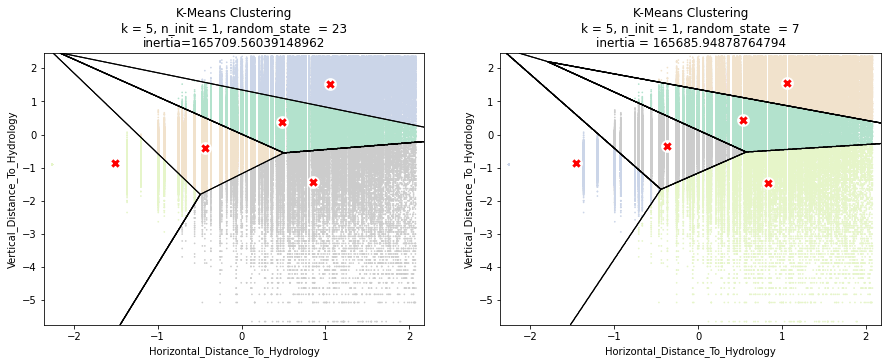

In [ ]:
k = 5
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]
plt.figure(figsize=(15, 5))
n = 1

# best of 1 K-Means clustering random initializations.
plt.subplot(121)
kmeans5 = KMeans(n_clusters=k, init="random", algorithm="full",  n_init=n, random_state=23)
kmeans5_predictions_old = kmeans5.fit_predict(DF_part2[xy])
plt.title(label="K-Means Clustering\nk = {}, n_init = {}, random_state  = {}\ninertia={}".format(k, n, 23, kmeans5.inertia_))
plot_clusters(kmeans5, DF_part2[xy], kmeans5_predictions_old, kmeans5.cluster_centers_)

# best of 1 K-Means clustering random initializations.
plt.subplot(122)
kmeans5 = KMeans(n_clusters=k, init="random", algorithm="full", n_init=n, random_state=7)
kmeans5_predictions = kmeans5.fit_predict(DF_part2[xy])
plt.title(label="K-Means Clustering\nk = {}, n_init = {}, random_state  = {}\ninertia = {}".format(k, n, 7, kmeans5.inertia_))
plot_clusters(kmeans5, DF_part2[xy], kmeans5_predictions, kmeans5.cluster_centers_)

plt.show()

To decide amongst different custerings, there has to be a criteria based on which the performance of the algorithm can be accessed. Since, K-Means clustering uses difference in distances between data points and centroids, the sum of  squared distances between every data point and its closest centroid (a.k.a. here as <b>inertia</b>) can be used as a suitable performance metric.

<b> Possible Solutions</b>
1. <b>Multiple Initialization:</b> This solution invovles running the algorithm multiple times. Each time, the initialization of centroids will be slightly different even if the same random state is used. After obtaining results from <b>multiple initializations</b> the clustering that results in least inertia would be picked.
2. <b>Largest Distance Between Centroids: </b> This solution involves choosing centroids such that they are distant from each other. (Carleton AI Society, 2021)

<font color="blue"><b>OBSERVATION: </b></font>Picking largest distance between centroids can be misleading if some points are too far away from others which is the case here as can be seen from the graphs obtained above where some points on the left hand side of the graph are far removed from others on the right side. So, here, the method of <b>multiple initialization</b> shall be used to determine best clustering. From the above results using 2 diferent random states, it can be seen that clustering using one of the two random states tested above, resulted in better clustering (lower inertia). It is thus expected that best cluetering would likely resemble graph with random state value resulting in lower inertial more than the other one.

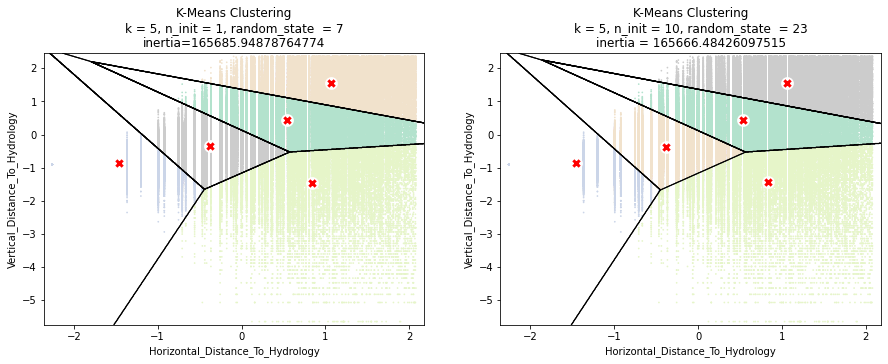

In [ ]:
k = 5
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]
plt.figure(figsize=(15, 5))

# best of 1 K-Means clustering random initializations.
plt.subplot(121)
kmeans5 = KMeans(n_clusters=k, init="random", algorithm="full",  n_init=1, random_state=7)
kmeans5_predictions = kmeans5.fit_predict(DF_part2[xy])
plt.title(label="K-Means Clustering\nk = {}, n_init = {}, random_state  = {}\ninertia={}".format(k, 1, 7, kmeans5.inertia_))
plot_clusters(kmeans5, DF_part2[xy], kmeans5_predictions, kmeans5.cluster_centers_)

# best of 10 K-Means clustering random initializations.
plt.subplot(122)
kmeans5 = KMeans(n_clusters=k, init="random", algorithm="full", n_init=10, random_state=23)
kmeans5_predictions_new = kmeans5.fit_predict(DF_part2[xy])
plt.title(label="K-Means Clustering\nk = {}, n_init = {}, random_state  = {}\ninertia = {}".format(k, 10, 23, kmeans5.inertia_))
plot_clusters(kmeans5, DF_part2[xy], kmeans5_predictions_new, kmeans5.cluster_centers_)

plt.show()

<font color="blue"><b>OBSERVATION: </b></font> As expected, the new best graph resembles the graph corresponding to clustering with lower inertia and 1 initialization obtained previously.

In [ ]:
get_clustering_scores("kmeans, k =5, random state = 23, n_init = 1", DF_part2[xy], kmeans5_predictions_old)
get_clustering_scores("kmeans, k =5, random state = 23, n_init = 10", DF_part2[xy], kmeans5_predictions_new)

kmeans, k =5, random state = 23, n_init = 1 clustering evaluation results: SC = 0.3600133977618205, CH = 416797.580554179, DB = 0.867641830569523
kmeans, k =5, random state = 23, n_init = 10 clustering evaluation results: SC = 0.3600254848688422, CH = 416921.26552864304, DB = 0.8746979127984258


{'SC': 0.3600254848688422, 'CH': 416921.26552864304, 'DB': 0.8746979127984258}

<font color="blue"><b>OBSERVATION: </b></font> Following observations were made from clustering evaluation results.
* SC scores show that 10 iterations resulted in a clustering resulting in more overlapping clusters and higher DB scores show similar clusters for the same. This could be because <b>k=5 may be too many clusters</b>.
* SC scores are closer to 0 than to 1. This shows that inter-cluster distance is small. This the graph shows datapoints spread out almost evenly with no apparent clusters to spot by eye. Thus, the graphs reflect SC scores closer to 0.
* CH score is higher for 10 initializations than 1 initialization. This proves the fact that the method of multiple initializations with an aim to pick clustering with least inertia has indded led to overall better clustering in terms of both inter and intra cluster distances.

### 7.4.2. Optimal k Problem
The no. of discrete possible clusters can range from 1 all the way to the total no. of datapoints. Determining the optimal k value (no. of clusters) for for k-means clustering can be tricky since this is an unsupervised learning algorithm meaning that there is no prior knowledge of no. of clusters/classes.

<b> The following are 2 possible methods to determine an optimal k value.</b> (K. Mahendru, 2019)
1. <b>Elbow Method:</b> This method determines the best k value by <b>plotting inertia, against k for different k values</b>. This results in an <b>elbow plot</b>. The point that forms the elbow in the elbow plot is the point after which increasing the k value does not lead to significant decrease in inertia. So, this elbow point would be the best value resulting in low inertia while having a reasonable no. of clusters.
2. <b>Silhouette method:</b> This method calculates the average distance of points in each cluster from both other points within that cluster and from other points in neighbouring clusters. If points in a cluster is closer to each other than to points from other clusters, the silhouette value will be closer to 1 indicating good clustering. Poor clustering will be indicated by values closer to -1. (K. Naik, 2020)

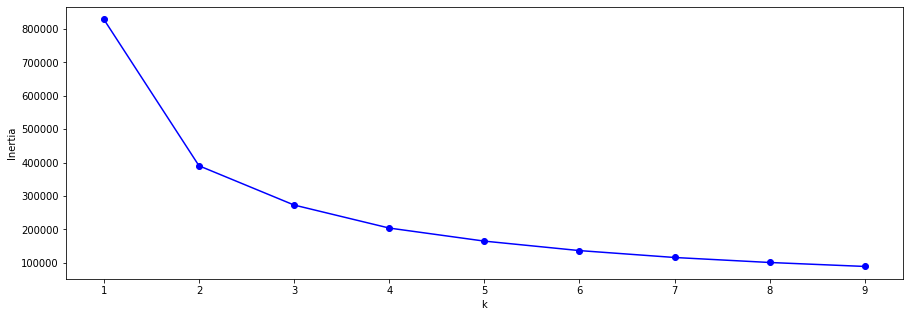

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=23).fit(DF_part2[xy]) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> From the above graph, since the most prominent elbow bent is at k=2, this can be a suitable value for k. But, points corresponding to k=3 and k=4 show quite some decrease in inertia compared to point corresponding to k=2. After k=4, the slope is lesser. So, from the elbow plot, it can be inferred that while k=2 is the most likely choice, k=3, or k=4 could also be a good value for k. Using another validation technique like the Silhouette method can help narrow down on the most optimal value of k.

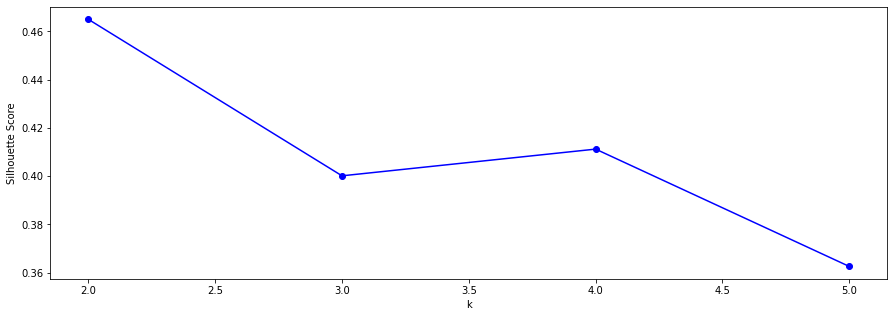

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2,6)
kmeans_per_k = [KMeans(n_clusters=k, random_state=23).fit(DF_part2[xy]) for k in k_range]
silhouette_scores = [silhouette_score(DF_part2[xy], model.labels_, metric='euclidean', sample_size=1000, random_state=23) for model in kmeans_per_k]
fig = plt.figure(figsize=(15, 5))

plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> From above plot, k=2 and k=4 have the best silhouette scores and thus can be considered to be optimal k values.

<font color="blue"><b>OBSERVATION: </b></font> After considering both elbow and silhouette validation methods, <b>k=2</b> has been chosen as optimal no. of clusters here.

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


<AxesSubplot:title={'center':'Intercluster Distance Map'}>

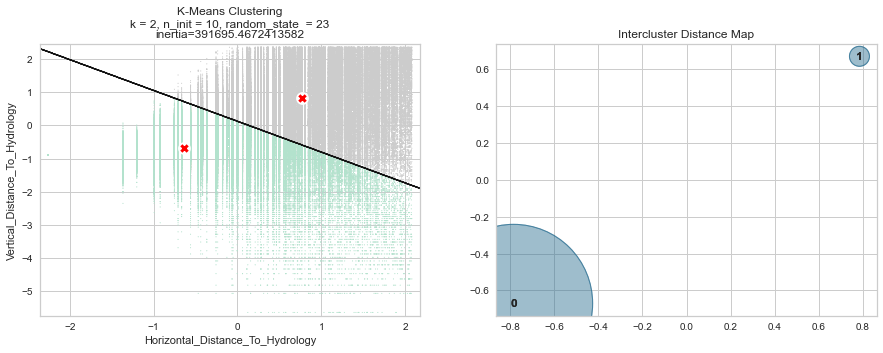

In [ ]:
k = 2
n = 10
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]
plt.figure(figsize=(15, 5))

# best of 10 K-Means clustering random initializations.
plt.subplot(121)
kmeans2 = KMeans(n_clusters=k, init="random", algorithm="full",  n_init=n, random_state=23)
kmeans2_predictions = kmeans2.fit_predict(DF_part2[xy])
plt.title(label="K-Means Clustering\nk = {}, n_init = {}, random_state  = {}\ninertia={}".format(k, n, 23, kmeans2.inertia_))
plot_clusters(kmeans2, DF_part2[xy], kmeans2_predictions, kmeans2.cluster_centers_)

from yellowbrick.cluster import InterclusterDistance
plt.subplot(122)
plt.title(label="Intercluster Distance Map")
visualizer = InterclusterDistance(kmeans2)
visualizer.fit(DF_part2[xy])
visualizer.draw()

<font color="blue"><b>OBSERVATION: </b></font> From the intercluster distance  map obtained above, it can be seen that intercluster distance (distance between clusters) is indeed greater than intracluster distance. However, it is to be noted that points on the right hand side of the graph closer to the boundary, falling in the green cluster seems closer to the grey cluster's centroid than to the green cluster's centroid. Yet it is given a hard cluster assignment of green cluster when it could have a probability of belonging to either. In such scenarios, <b>soft clustering may be better</b>.

In [ ]:
get_clustering_scores("kmeans, k =2, random state = 23, inti = 10", DF_part2[xy], kmeans2_predictions)

kmeans, k =2, random state = 23, inti = 10 clustering evaluation results: SC = 0.4628453333527439, CH = 465198.4143272671, DB = 0.8076657252756556


{'CH': 465198.4143272671, 'DB': 0.8076657252756556, 'SC': 0.4628453333527439}

<font color="blue"><b>OBSERVATION: </b></font> Also SC score is still closer to 0 and DB score is still high. So distance based hard clustering like K-Means clustering may not be the best option here.

### 7.4.3. Spherical Clusters Problem
Since k means clustering uses mean values to calculate centroids, the clusters assigned assume a circular shape. But here, it can be noted that the data points are not clustered together to form circular shapes. In such scenarios, other algorithms like distribution based ones can be considered instead of distance based ones like k means clustering. GMM is a Gaussian distribution based soft clustering algorithm that can be considered. (A. Singh, 2019)

## 7.5. Soft Clustering: GMM
The <b>Gaussian Mixture Model (GMM)</b> algorithm assumes that each cluster follows a Gaussian/Normal distribution. Unlike hard clustring algorithms like K-Means clustering, GMM performs soft clustering. That is, it assign each data point the probability of it belonging to each of k possible clusters. The algorithm begins with a random mean  and variance for each cluster and then for each possible distribution/cluster, the probability of the point belonging to it is assigned to each point. After the probabilities of every data example has been calculated, the algorithm tweaks the mean and covarience values of the clusters to better fit the points and repeats again until a certain no. of iterations are acheved or until the means and standard deviations no longer change. (V. Lavrenko, 2014) (stanfordonline, 2018)

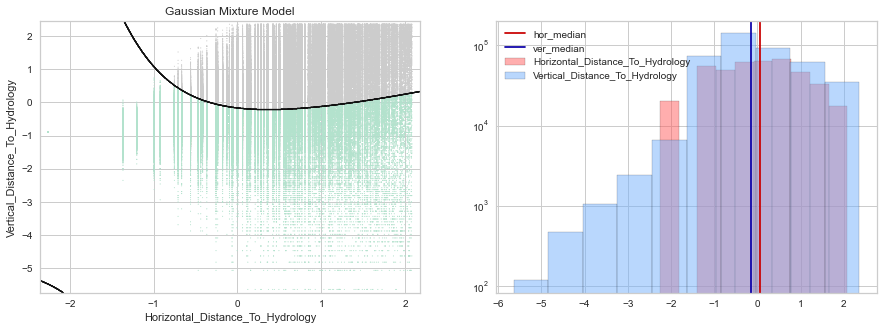

In [ ]:
from sklearn.mixture import GaussianMixture

k = 2
gmm2 = GaussianMixture(n_components=k)
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
gmm2_predictions = gmm2.fit_predict(DF_part2[xy])
plot_clusters(gmm2, DF_part2[xy], gmm2_predictions)
plt.title(label="Gaussian Mixture Model")

plt.subplot(122)
DF_part2["Horizontal_Distance_To_Hydrology"].hist(
    color=Colors.RED, 
    edgecolor='black', 
    alpha=0.5,  
    label="Horizontal_Distance_To_Hydrology",
    log=True
)
DF_part2["Vertical_Distance_To_Hydrology"].hist(
    color=Colors.BLUE, 
    edgecolor='black', 
    alpha=0.5, 
    label="Vertical_Distance_To_Hydrology",
    log=False
)
plt.axvline(np.median(DF_part2["Horizontal_Distance_To_Hydrology"]), color=Colors.DARK_RED, label="hor_median")
plt.axvline(np.median(DF_part2["Vertical_Distance_To_Hydrology"]), color=Colors.DARK_BLUE, label="ver_median")
plt.legend()

plt.show()

<font color="blue"><b>OBSERVATION: </b></font> This clustering seems a bit more logical than that which was obtained with K-Means clustering. GMM seems to have differentiated values based on vertical distance more that horizontal distance. Most values with vertical distance > 0 or < -5 has been calssified into group green with the grey goup being the rest of the values.

In [ ]:
print("point close to boundary prediction probabilities = {}".format(gmm2.predict_proba([[-0.1, 0]]))) # point close to border 
print("point far from boundary prediction probabilities = {}".format(gmm2.predict_proba([[2, 1]]))) # point close to border 

point close to boundary prediction probabilities = [[0.41165776 0.58834224]]
point far from boundary prediction probabilities = [[0.00987433 0.99012567]]


<font color="blue"><b>OBSERVATION: </b></font> The soft clustering nature of GMM algorithm can be seen from the probabilities it assigns to data points. Upon providing a data point close to the decision boundary, GMM give the data point almost equal probability of belonging to either class. But a point that's farther from the boundary is assigned a very high probability of belonging to one class.

In [ ]:
get_clustering_scores("gmm, k =2, random state = 23", DF_part2[xy], gmm2_predictions)

gmm, k =2, random state = 23 clustering evaluation results: SC = 0.4306786738053495, CH = 392105.03275822895, DB = 0.8731098149336992


{'CH': 392105.03275822895, 'DB': 0.8731098149336992, 'SC': 0.4306786738053495}

<font color="blue"><b>OBSERVATION: </b></font> SC score is still closer to 0, CH score has dropped compared to k-means clustering and SB score is higher. This shows that GMM did worse than K-Means Clustering. However, this result must be considered with a grain of salt because all 3 metrices used, Silhouette coefficient, Calinski Harabasz Index and Davies Bouldien Index are all distance based algorithms and hence, are used to compare distance based algorithms like K-Means clustering that tends towards convex/spherical clusters. (H. Wei, 2020). For evaluation of soft clustering, other metrics like Fuzzy V Measure exist but soft clustering results are usually judged by human experts on basis of whether the clustring makes sense w.r.t. the kind of data. In case of scenario explored here, GMM has clustered the datapoints that temselves are difficult to cluster into more logical custers than K-Means clustering.

<font color="blue"><b>OBSERVATION: </b></font> Datapoints here show uneven densities and noise. So, it is worth exploring a density based clustering algorithm like Density Based Spatial Clustering of Application with Noise (DBSCAN) to see if it would do better.

## 7.6. Soft Clustering: DBSCAN
DBSCAN is a density based clustering algorithm. It takes 2 parameters, epsilon (say eps) and min_samples (say z). Eps a distance that will be the radius of neighborhoods that each each would be assumed to be in and z is the threshold value that sets minimum no. of points that each neighborhood must have. The algorithm begins by calculating neighborhoods of each point and then proceeds to assign each point to one of 3 types (core point, boundary point or noise) These assignments are improved upon further iterations. Core points are ones  that are definitly within a cluster. Boundary points are assigned a cluster based on proability depending on cluster/neighborhood density and noise refers to points that dont quite fit into any cluster. The key difference here, is that density is takin into account and noise is identified and separated so as not to affect clustering of rest of the points.
(Normalized Nerd, 2020)

DBSCAN is very sensitive to initila parameter values, epsilon and min_samples. One way to determine optimal eplison is to plot distance of every point to n nearest neighbors to get an elbow plot from which the distance indicated by the elbow bent can be considered as a good value for epsilon. (T. Mullin, 2020)

In [ ]:
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]
X = DF_part2[xy]

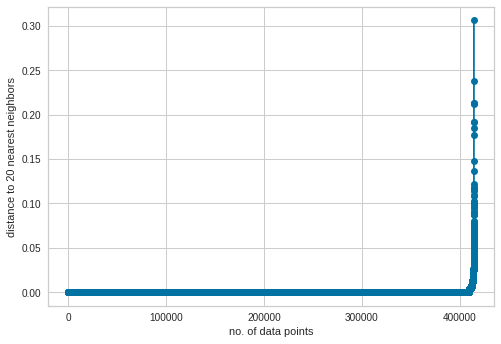

In [ ]:
from sklearn.neighbors import NearestNeighbors
n = 20
neighbors = NearestNeighbors(n_neighbors = n)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances, "bo-")
plt.xlabel("no. of data points")
plt.ylabel("distance to {} nearest neighbors".format(n))
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> Based on above elbow graph, 0.05 has been chosen as epsilon value.

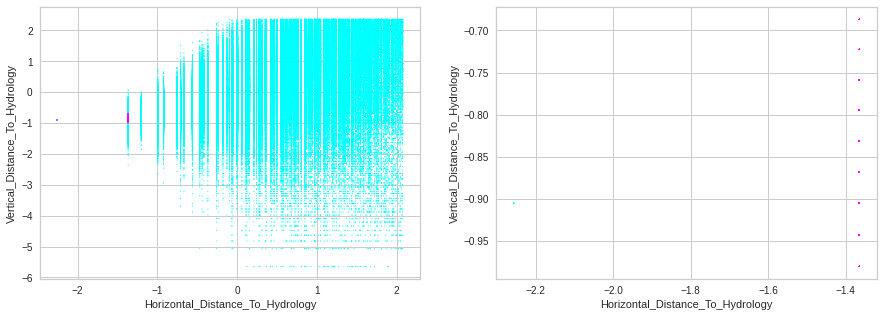

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5000).fit(DF_part2[xy])
dbscan_predictions = dbscan.labels_

fig = plt.figure(figsize=(15,5))

plt.subplot(121)
plot_clusters(dbscan, DF_part2[xy], dbscan_predictions, boundaries=False, cmap='cool')

plt.subplot(122)
plot_clusters(dbscan, DF_part2[xy][dbscan_predictions > -1], dbscan_predictions[dbscan_predictions > -1], boundaries=False, cmap='cool')

plt.show()

In [ ]:
dbscan_clusters = set(dbscan_predictions)
print(len(dbscan_clusters))
display(pd.DataFrame(dbscan_predictions, columns=["Dbscan_Clusters"]).value_counts())

3


Dbscan_Clusters
-1                 375616
 0                  20539
 1                  18431
dtype: int64

In [ ]:
print(get_clustering_scores("dbscan, eps = 0.05, min_samples = 5000", DF_part2[xy], dbscan_predictions))
print(get_clustering_scores("dbscan, eps = 0.05, min_samples = 5000", DF_part2[xy][dbscan_predictions > -1], dbscan_predictions[dbscan_predictions > -1]))

dbscan, eps = 0.05, min_samples = 5000 clustering evaluation results: SC = 0.16581684026834959, CH = 59668.25346234854, DB = 0.5964852764014865
{'SC': 0.16581684026834959, 'CH': 59668.25346234854, 'DB': 0.5964852764014865}
dbscan, eps = 0.05, min_samples = 5000 clustering evaluation results: SC = 0.9479415106340293, CH = 2214401.753362572, DB = 0.0827097861331818
{'SC': 0.9479415106340293, 'CH': 2214401.753362572, 'DB': 0.0827097861331818}


<font color="blue"><b>OBSERVATION: </b></font> The results show that chosen features do not show 2 clear clusters. Th cluster -1 (cyan data points) above refers to clusters that DBSCAN finds as noise which includes a lot of data points. But, if that noise is eliminated, from the SC and DB score, it can be seen that DBSCAN achieved good clustering.

## 7.7. Predicting Clusters
The follwing cells shall attempt to use the Naive Bayes classifier to classify identified clusters. It GMM was most comprehendable among tested clustering algorithms on this dataset so far, GMM's predictions shall be used for following experiments.

In [ ]:
x_title = "Horizontal_Distance_To_Hydrology"
y_title = "Vertical_Distance_To_Hydrology"
xy = [x_title, y_title]

DF_part2_reduced = DF_part2[xy]
cluster_list = list(gmm2_predictions)
DF_part2_reduced.insert(len(DF_part2_reduced.columns), "Cluster", cluster_list, True)

DF_part2_reduced.head()

Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Cluster
0                          0.892836                       -0.020697        0
1                          0.145115                        0.103315        0
2                          0.681652                       -0.115525        0
3                          0.285900                       -0.212002        0
4                         -1.200816                       -0.651489        1

In [ ]:
X = DF_part2_reduced[xy]
y = DF_part2_reduced['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, stratify=y)

Performance of NB_Classifier on Cluster Prediction.

Performance Measures
Accuracy: 0.9528399278319681
Confusion Matrix: [[44207, 3548], [1340, 54552]]
Class Specific Performance: 
	Dimmer: 
		TP: 44207
		TN: 54552
		FP: 1340
		FN: 3548
		Precision: 0.9257041147523819
		Recall: 0.970579840604211
		F: 0.9476109836873807
	Brighter: 
		TP: 54552
		TN: 44207
		FP: 3548
		FN: 1340
		Precision: 0.9760251914406355
		Recall: 0.9389328743545611
		F: 0.957119797880553
ROC: 
	FP Rate: 0.07429588524761806
	TP Rate: 0.9760251914406355
	AUC: 0.9508646530965087


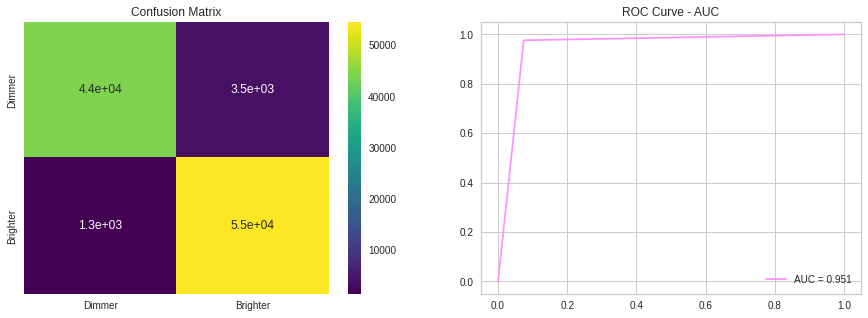

In [ ]:
NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train, y_train)
y_predicted = NB_Classifier.predict(X_test)
NB_Classifier_performance = get_performance_measures("NB_Classifier", "Cluster Prediction", y_test, y_predicted, "Hillshade_Avg_Y")

<font color="blue"><b>OBSERVATION: </b></font> The results of applying Naive Bayes Classifier to try and predict clusters identified by GMM shows  how GMM has classified the dataset based on horizontal distance to hydrology and vertical distance to hydrology well. The NB classifier was able to predict the newly assigned classes with very good accuracy. This is also visible from the ROC AUC value which is 0.95.

## 7.8. Hillshade_Avg Experiment
In Part 1, "Hillshade_Avg_Y" was the class attribute derived from the contibuous attribute, "Hillshade_Avg". It was identified using values of attribute "Slope", "Elevation" and "Aspect", it is possible to classify "Hillshade_Avg_Y" using Naive Bayes Classifier with an accuracy and ROC AUC value of 0.79. Hillshade_Avg was binned into 2 categories, "Dimmer" and "Brighter" since it was known that Hillshade values depict light recieved in an area and ranges from 0 to 255.

In many real world scenarios, one has no idea about how to cluster/bin attributes. This is where undupervised learning comes into play and clustering algorithms are used. In this subsection of part 2, the following experiment shall be conducted.
* Apply GMM to identify 2 clusters (k=2 because Hillshade_Avg_Y had 2 possible values, 1/0) based on Hillshade_Avg and each of the 3 attributes (Slope, Aspect, Elevation) selected in part 1 to predict Hillshade_Avg_Y respectively.
* Add cluster predictions for Hillshade_Avg & Slope, Hillshade_Avg & Aspect and Hillshade_Avg & Elevation as 3 new attributes of a dataset.
* Use Naive Bayes classifier to try and predict Hillshade_Avg_Y values based on only these 3 new attributes all containing cluster predictions w.r.t. Hillshade_Avg and another attribute.

If Naive Bayes classifier is able to predict with good accuracy, then this would demonstrate how clustering algorithms (GMM in this case) are able to identify clusters w.r.t. an attribute based on other attributes in an unsupervised manner such that the culsters likey correspond to some real world clusters that exist in the dataset though not known beforehand. 

In [ ]:
# DF_test = DF_test.drop(["Elevation_Hillshade_Avg_Cluster", "Slope_Hillshade_Avg_Cluster", "Aspect_Hillshade_Avg_Cluster"], axis=1)
DF_test = DF[["Elevation", "Slope", "Aspect", "Hillshade_Avg", "Hillshade_Avg_Y"]]
xy1 = ["Elevation", "Hillshade_Avg"]
xy2 = ["Slope", "Hillshade_Avg"]
xy3 = ["Aspect", "Hillshade_Avg"]
DF_test.head()

Elevation     Slope    Aspect  Hillshade_Avg  Hillshade_Avg_Y
0  -0.478195 -0.075538  0.195764       0.743804                1
1  -0.504050  0.877927  0.641481       1.639666                1
2  -0.148133  0.732384  0.170550       0.304286                1
3  -0.417751  1.156698 -0.951088      -2.099637                0
4  -0.191834 -0.075538 -0.203811      -0.160400                0

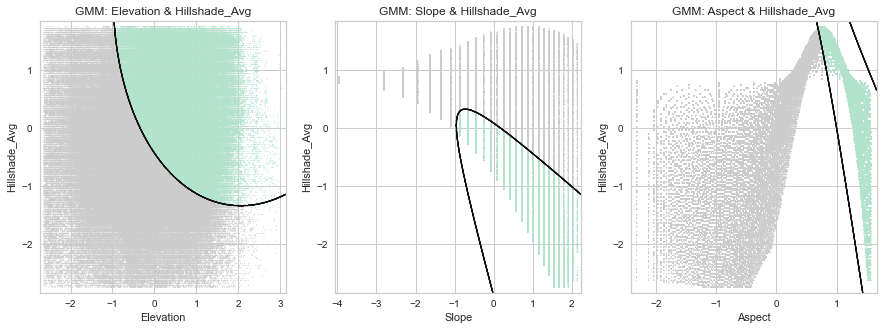

In [ ]:
k = 2
gmm = GaussianMixture(n_components=k)

fig = plt.figure(figsize=(15,5))

plt.subplot(131)
gmm_predictions = gmm.fit_predict(DF_test[xy1])
plot_clusters(gmm, DF_test[xy1], gmm_predictions)
plt.title(label="GMM: {} & {}".format(xy1[0], xy1[1]))
column_title = "_".join(xy1) + "_Cluster"
DF_test.insert(loc=0, column=column_title, value=gmm_predictions)

plt.subplot(132)
gmm_predictions = gmm.fit_predict(DF_test[xy2])
plot_clusters(gmm, DF_test[xy2], gmm_predictions)
plt.title(label="GMM: {} & {}".format(xy2[0], xy2[1]))
column_title = "_".join(xy2) + "_Cluster"
DF_test.insert(loc=0, column=column_title, value=gmm_predictions)

plt.subplot(133)
gmm_predictions = gmm.fit_predict(DF_test[xy3])
plot_clusters(gmm, DF_test[xy3], gmm_predictions)
plt.title(label="GMM: {} & {}".format(xy3[0], xy3[1]))
column_title = "_".join(xy3) + "_Cluster"
DF_test.insert(loc=0, column=column_title, value=gmm_predictions)

plt.show()

In [ ]:
DF_test.head()

Aspect_Hillshade_Avg_Cluster  ...  Hillshade_Avg_Y
0                             1  ...                1
1                             1  ...                1
2                             1  ...                1
3                             1  ...                0
4                             1  ...                0

[5 rows x 8 columns]

In [ ]:
X = DF_test[["Elevation_Hillshade_Avg_Cluster",	"Slope_Hillshade_Avg_Cluster",	"Aspect_Hillshade_Avg_Cluster"]]
y = DF_test[["Hillshade_Avg_Y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, stratify=y)

Performance of NB_Classifier on Hillshade_Avg_Y Prediction Based On Clusters.

Performance Measures
Accuracy: 0.9324148311094388
Confusion Matrix: [[47813, 4535], [2470, 48829]]
Class Specific Performance: 
	Dimmer: 
		TP: 47813
		TN: 48829
		FP: 2470
		FN: 4535
		Precision: 0.9133682280125315
		Recall: 0.950878030348229
		F: 0.9317457688222857
	Brighter: 
		TP: 48829
		TN: 47813
		FP: 4535
		FN: 2470
		Precision: 0.9518509132731632
		Recall: 0.915017614871449
		F: 0.9330709037577749
ROC: 
	FP Rate: 0.08663177198746848
	TP Rate: 0.9518509132731632
	AUC: 0.9326095706428473


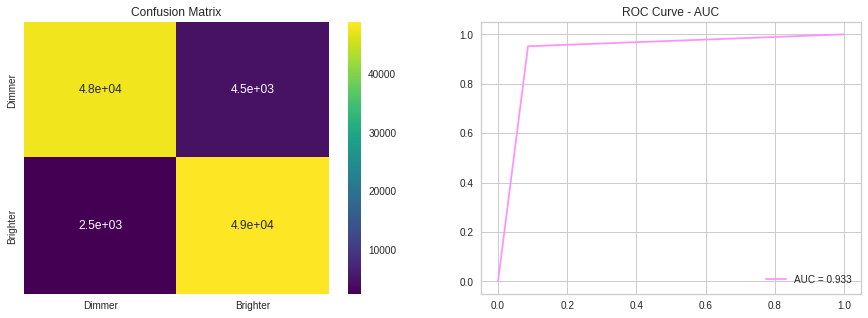

In [ ]:
NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train, y_train.values.ravel())
y_predicted = NB_Classifier.predict(X_test)
NB_Classifier_performance = get_performance_measures("NB_Classifier", "Hillshade_Avg_Y Prediction Based On Clusters", y_test, y_predicted, "Hillshade_Avg_Y")

<font color="blue"><b>OBSERVATION: </b></font> Tryng to classify class attribute "Hillshade_Avg_Y" based on clusters associated with "Hillshade_Avg" values identified though running GMM clustring algorithm  using Naive Bayes classifier was successful with ROC AUC value = 0.93. This suggests that in cases where the class attribute classes are not previously known, clustering algorithms can indeed be used to identify clusters that are likely to correspond to classes of an unkown class attribute.

# <u>Part 3</u>
This time, the aim is to predict "Cover_Type_Y" class attribute which can have 2 possible classes, 1 = "Neota" and 0 = "Others" based on "Aspect" and "Elevation". These features were selected because they show some correlation with "Cover_Type_Y" and also because from experimentation, it was discovered that choosing these attributes makes the well known tendency of tree classifiers to overfit training data more apparent and thereby also makes measures to counter its effects more clear/effective.

In [ ]:
DF_part3 = DF

In [ ]:
X_part3 = DF_part3[["Elevation", "Aspect"]]
display(X_part3.head())

Elevation    Aspect
0  -0.479065  0.193818
1  -0.504928  0.639463
2  -0.148907  0.168608
3  -0.418603 -0.952847
4  -0.192620 -0.205692

In [ ]:
y_part3 = DF_part3[["Cover_Type_Y"]]
display(y_part3.head())

Cover_Type_Y
0             1
1             1
2             1
3             1
4             1

# 8. Decision Trees
(Scikit-Learn, no date)<br>
Decision trees use features from a training dataset to determine decision rules based on which a given data example is classified. The nodes of the tree are decision questions based on a feature and each branch results from one possible answer to those questions. Each leaf node associates to the class attribute and favors one of its classes over the others such that this class would be the output of the tree classifier if this leaf node is reached as a result of classification for a data example.

## 8.1. Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_part3, y_part3, test_size = 0.25, random_state = 23, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(random_state=23)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [ ]:
# # TREE TOO BIG TO PLOT WITHIN A REASONABLE TIMEFRAME
# figure = plt.figure(figsize=(20, 10))
# plot_tree(
#     tree_clf,
#     filled = True,
#     class_names = list(QUALITATIVE_ATTRIBUTES["Cover_Type_Y"].values()),
#     feature_names = list(X_train.columns)
# )
# plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

accuracy score on training set (no cross validation) = 0.8676235531728088
mean accuracy score on training set (10 fold cross validation) = 0.6450429183528785
accuracy score on testing set = 0.6421025210570495
tree max depth = 43


Performance of Tree_Classifier on 'Cover_Type_Y prediction based on Elevation and Aspect.

Performance Measures
Accuracy: 0.8676235531728088
Confusion Matrix: [[135469, 10408], [30753, 134309]]
Class Specific Performance: 
	Other: 
		TP: 135469
		TN: 134309
		FP: 30753
		FN: 10408
		Precision: 0.9286522207064856
		Recall: 0.8149883890219105
		F: 0.8681155658941554
	Pine: 
		TP: 134309
		TN: 135469
		FP: 10408
		FN: 30753
		Precision: 0.8136881898922829
		Recall: 0.9280803222841822
		F: 0.8671278556648448
ROC: 
	FP Rate: 0.0713477792935144
	TP Rate: 0.8136881898922829
	AUC: 0.8711702052993842


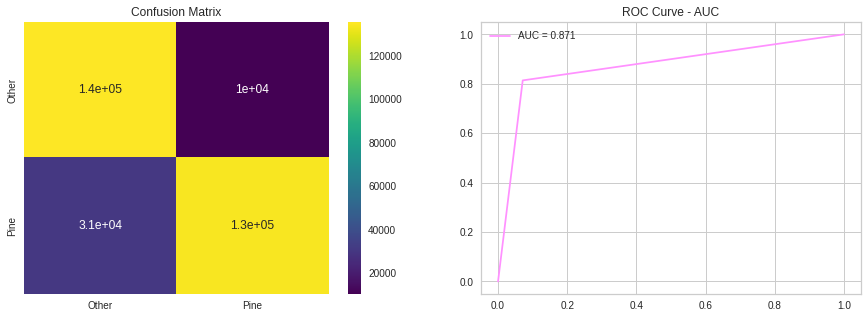

In [ ]:
y_train_pred = tree_clf.predict(X_train)
get_performance_measures("Tree_Classifier", "'Cover_Type_Y prediction based on Elevation and Aspect", y_train, y_train_pred, "Cover_Type_Y");

Performance of Tree_Classifier on 'Cover_Type_Y prediction based on Aspect and Elevation.

Performance Measures
Accuracy: 0.6421025210570495
Confusion Matrix: [[32905, 15496], [21599, 33647]]
Class Specific Performance: 
	Other: 
		TP: 32905
		TN: 33647
		FP: 21599
		FN: 15496
		Precision: 0.6798413255924465
		Recall: 0.6037171583736973
		F: 0.639521889121034
	Pine: 
		TP: 33647
		TN: 32905
		FP: 15496
		FN: 21599
		Precision: 0.6090395684755457
		Recall: 0.6846753352461185
		F: 0.644646466581728
ROC: 
	FP Rate: 0.3201586744075536
	TP Rate: 0.6090395684755457
	AUC: 0.6444404470339962


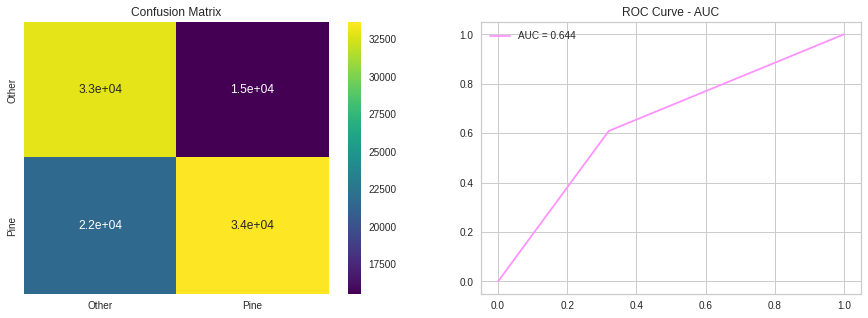

In [ ]:
y_test_pred = tree_clf.predict(X_test)
get_performance_measures("Tree_Classifier", "'Cover_Type_Y prediction based on Aspect and Elevation", y_test, y_test_pred, "Cover_Type_Y");

<font color="blue"><b>OBSERVATION: </b></font> The tree classifier shows best accuracy and ROC AUC value when tested on training data. It performs worse on testing data and the average accuracy reported after 10-fold cross validation is also poorer on testing data than on training data. This suggests that the tree has likely overfit the training dataset.

<font color="blue"><b>OBSERVATION: </b></font> The resulting decision tree is soo large that it could not be plotted within a reasonable timeframe even though the decision tree has only 2 features to choose from and the class variable has only 2 possible values. This too hints at the tree likely overfitting the data.

### 8.1.1 Overfitting Problem
(J. Starmer, 2021), (P, Domingos et al, no date)<br>
Decision trees, especially fully grown ones often overfit the data. This can happen due to a variety of reasons like lack of sufficient data, too much noise/irrelevant features etc.

Following are 2 ways to reduce overfitting in decision trees.
1. <b>Pre-Pruning:</b> Prepruing is usually done by constraining the building of the tree. By setting limits on factors like the depth of the tree, the minimum samples a leaf should have, the no. of leaves a tree can have etc, one can prevent the tree from being bulit in its full form which accounts for every sample in the training set and ends up overfitting it. Regularization parameters like the ones given below can be set with desired values to implement these limits.
    * max_depth (the maximum depth that any branch in a tree can have)
    * min_samples_split (the minimum number of samples a node must have before it can be split)
    * min_samples_leaf (the minimum number of samples a leaf node must have) 
    * min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
    * max_leaf_nodes (maximum number of leaf nodes)
    * max_features (maximum number of features that are evaluated for splitting at each node). 
2. <b>Post Pruning:</b> Pruning of nodes of a decision tree can also be done after then entire tree is built. In such methods, the size of the full tree shall be reduced after it is built based on some calculated metric such that the tree that optimizes this metric shall be considered to be the best one. Cost Complexity Pruning (CCP) is an example of such an algorithm.

In [ ]:
def add_to_testing_set(X_train, X_test, y_train, y_test, x_percent):
    ''' Moves x % of the data from training set to testing set and returns new train and test sets. '''
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=x_percent/100, random_state = 23)
    X_test_new = X_test.append(X_test_new, ignore_index=True)
    y_test_new = y_test.append(y_test_new, ignore_index=True)
    return X_train_new, X_test_new, y_train_new, y_test_new

In [ ]:
print(TextStyle.BOLD("Original Train Test Split"))
tree_clf = DecisionTreeClassifier(random_state=23)
tree_clf.fit(X_train, y_train)
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

Original Train Test Split
accuracy score on training set (no cross validation) = 0.8676235531728088
mean accuracy score on training set (10 fold cross validation) = 0.6450429183528785
accuracy score on testing set = 0.6421025210570495
tree max depth = 43


In [ ]:
print(TextStyle.BOLD("Train Test Split With 40% Tarin Data Moved To Test Set"))
X_train40, X_test40, y_train40, y_test40 = add_to_testing_set(X_train, X_test, y_train, y_test, 40)
tree_clf.fit(X_train40, y_train40)
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train40, y_train40)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train40, y_train40, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test40, y_test40)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

Train Test Split With 40% Tarin Data Moved To Test Set
accuracy score on training set (no cross validation) = 0.9007949057422961
mean accuracy score on training set (10 fold cross validation) = 0.6409202083730385
accuracy score on testing set = 0.6392030628489231
tree max depth = 41


In [ ]:
print(TextStyle.BOLD("Train Test Split With 60% Tarin Data Moved To Test Set"))
X_train60, X_test60, y_train60, y_test60 = add_to_testing_set(X_train, X_test, y_train, y_test, 60)
tree_clf.fit(X_train60, y_train60)
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train60, y_train60)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train60, y_train60, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test60, y_test60)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

Train Test Split With 60% Tarin Data Moved To Test Set
accuracy score on training set (no cross validation) = 0.9232884422110553
mean accuracy score on training set (10 fold cross validation) = 0.6385446344705148
accuracy score on testing set = 0.6376980886320642
tree max depth = 40


<font color="blue"><b>OBSERVATION: </b></font> It can be seen that the tree built using original train test data split has overfit the training dataset from the fact that accuracy on the training set is much higher than on the testing set. As more data is moved from training set to testing set, no. of new examples increase and no. of training examples used to build the tree decreases. As a result, it can be observed how the tree fits the training data better and the testing data worse when there is lesser training data but more testing data. This further demonstrates how the full sized tree is overfitting training data.

The following cells shall explore 2 ways of reducing overfitting of a decision tree.

## 8.1.2. Pre-Pruning: Setting Regularization Parameters

accuracy score on training set (no cross validation) = 0.7256021277485295
mean accuracy score on training set (10 fold cross validation) = 0.7253673496490258
accuracy score on testing set = 0.7248545544009957
tree max depth = 3


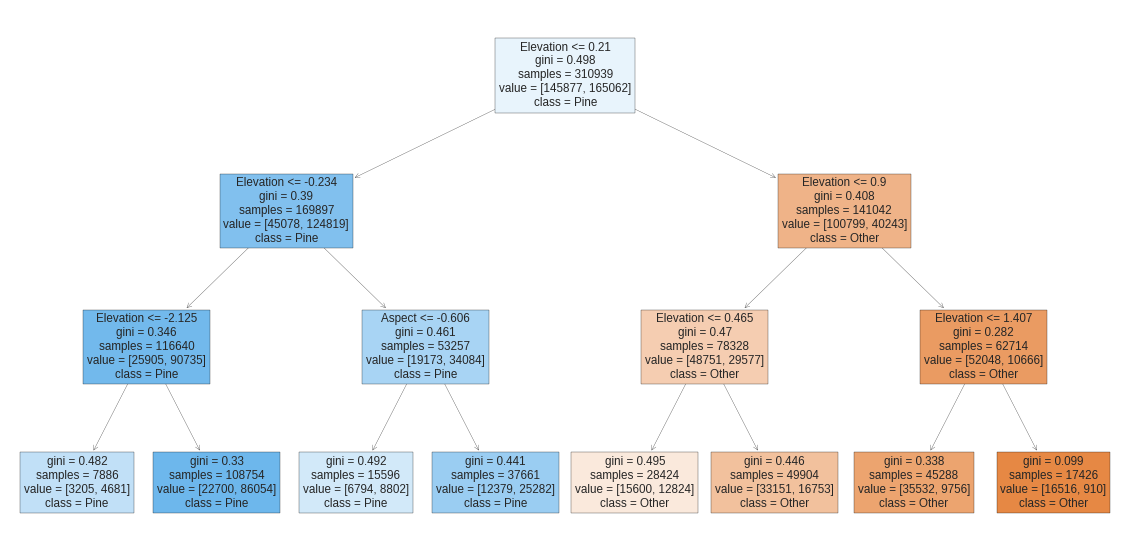

In [ ]:
# Tree with limit on max_depth
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=23)
tree_clf.fit(X_train, y_train)

print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

figure = plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    filled = True,
    class_names = list(QUALITATIVE_ATTRIBUTES["Cover_Type_Y"].values()),
    feature_names = list(X_train.columns)
)
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> Restiricting the depth of the tree has forced the classifier to stop splitting nodes at the depth of 3 even if the leaves are impure as measured using Gini Impurity of nodes (gini impurity is default but this can be changed to other measures of node purity like entropy). As a result, the classifier does not fit the training data as well as before. However, now, it fits training and testing data with about the same accuracy! This means overfitting has been reduced.

In [ ]:
# Tree with limit on min_samples_leaf
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=23)
tree_clf.fit(X_train, y_train)
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

accuracy score on training set (no cross validation) = 0.7670861487301368
mean accuracy score on training set (10 fold cross validation) = 0.7017968074914475
accuracy score on testing set = 0.7013420552452073
tree max depth = 37


<font color="blue"><b>OBSERVATION: </b></font> Setting the minimum no. of samples a leaf must contain will force the tree to stop plitting at a node if splitting it will result in any of the new leaves having less than the set no. of minimum samples in it. It can be observed that this does reduce overfitting but not as well as when the depth was limited earlier.

The values of the regularization parameters chosen for above experiments were random. Different parameter values result in different results.

accuracy score on training set (no cross validation) = 0.7341118354403918
mean accuracy score on training set (10 fold cross validation) = 0.7336937417568627
accuracy score on testing set = 0.7349947417677308
tree max depth = 6


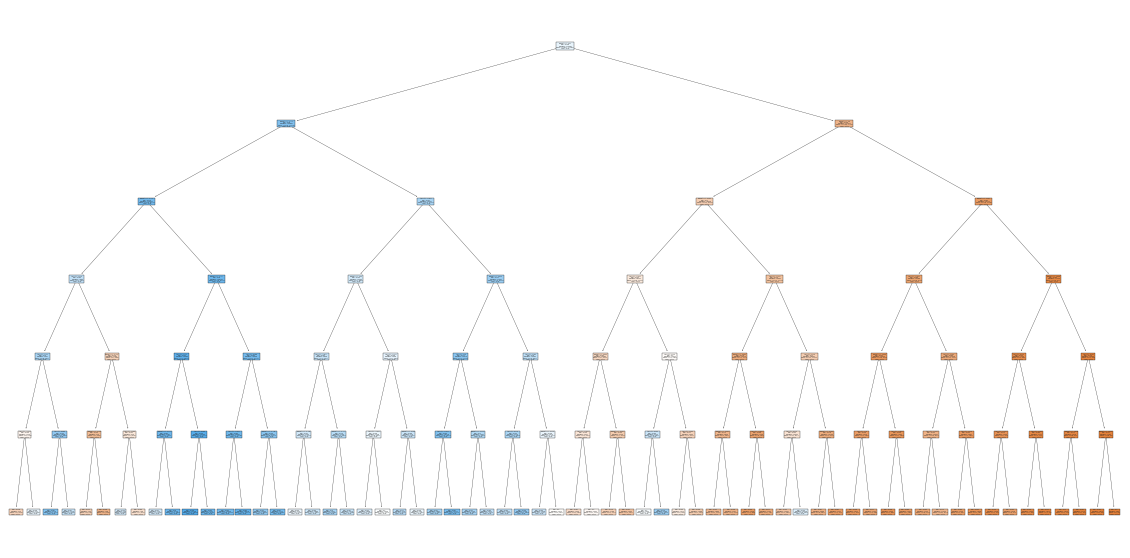

In [ ]:
# Tree with limit on max_depth
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=23)
tree_clf.fit(X_train, y_train)

print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

figure = plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    filled = True,
    class_names = list(QUALITATIVE_ATTRIBUTES["Cover_Type_Y"].values()),
    feature_names = list(X_train.columns)
)
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> Setting max_depth = 6 results in better performance than max_depth = 3. While this discovery is good, it was made by accident through manual trial and error. Determining the optimal value of regularization parameters is therefore an important puzzle to solve.

One way to determine a good value for a regularization parameter is to use cross validation to arrive at better values (J. Starmer, 2021). The following experiment shall attempt to see this idea in practice to determine better values for the <b>min_samples_leaf</b> parameter using <b>4 fold cross validation</b>. (Here, 4 fold cross validation is performed instead of standard 10 fold cross validation to help the code run faster.)

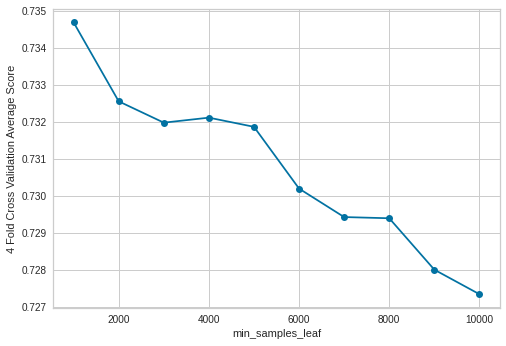

In [ ]:
min_samples_leaf_range = range(1000, 10001, 1000)
tree_clfs = [DecisionTreeClassifier(min_samples_leaf=i, random_state=23) for i in min_samples_leaf_range]
cross_val_mean_scores = [cross_val_score(tree_clf, X_train, y_train, cv=4).mean() for tree_clf in tree_clfs]
plt.plot(min_samples_leaf_range, cross_val_mean_scores, "bo-")
plt.xlabel("min_samples_leaf")
plt.ylabel("4 Fold Cross Validation Average Score")
plt.show()

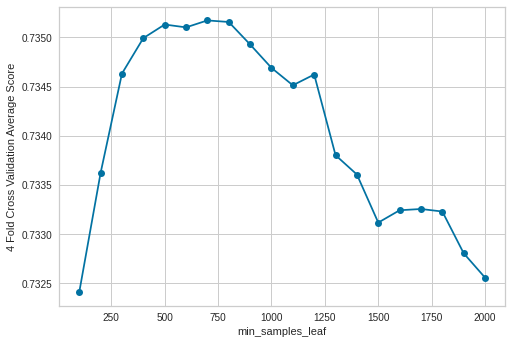

In [ ]:
min_samples_leaf_range = range(100, 2001, 100)
tree_clfs = [DecisionTreeClassifier(min_samples_leaf=i, random_state=23) for i in min_samples_leaf_range]
cross_val_mean_scores = [cross_val_score(tree_clf, X_train, y_train, cv=4).mean() for tree_clf in tree_clfs]
plt.plot(min_samples_leaf_range, cross_val_mean_scores, "bo-")
plt.xlabel("min_samples_leaf")
plt.ylabel("4 Fold Cross Validation Average Score")
plt.show()

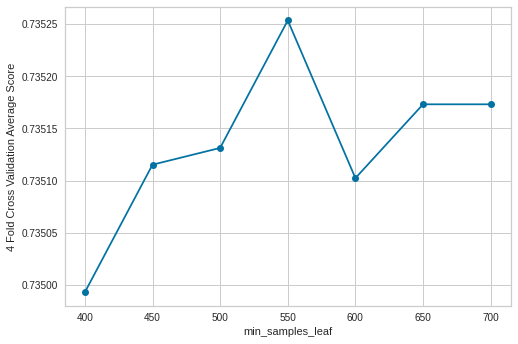

In [ ]:
min_samples_leaf_range = range(400, 750, 50)
tree_clfs = [DecisionTreeClassifier(min_samples_leaf=i, random_state=23) for i in min_samples_leaf_range]
cross_val_mean_scores = [cross_val_score(tree_clf, X_train, y_train, cv=4).mean() for tree_clf in tree_clfs]
plt.plot(min_samples_leaf_range, cross_val_mean_scores, "bo-")
plt.xlabel("min_samples_leaf")
plt.ylabel("4 Fold Cross Validation Average Score")
plt.show()

In [ ]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=550, random_state=23)
tree_clf.fit(X_train, y_train)
print("accuracy score on training set (no cross validation) = {}".format(tree_clf.score(X_train, y_train)))
print("mean accuracy score on training set ({} fold cross validation) = {}".format(10, cross_val_score(tree_clf, X_train, y_train, cv=10).mean()))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

accuracy score on training set (no cross validation) = 0.7364370503539279
mean accuracy score on training set (10 fold cross validation) = 0.7353403656140056
accuracy score on testing set = 0.7366445724430036
tree max depth = 16


Performance of Tree_Classifier on 'Cover_Type_Y prediction based on Aspect and Elevation.

Performance Measures
Accuracy: 0.7366445724430036
Confusion Matrix: [[32214, 16187], [11109, 44137]]
Class Specific Performance: 
	Other: 
		TP: 32214
		TN: 44137
		FP: 11109
		FN: 16187
		Precision: 0.6655647610586558
		Recall: 0.7435773145904023
		F: 0.7024115825738083
	Pine: 
		TP: 44137
		TN: 32214
		FP: 16187
		FN: 11109
		Precision: 0.798917568692756
		Recall: 0.7316656720376633
		F: 0.7638141386172882
ROC: 
	FP Rate: 0.3344352389413442
	TP Rate: 0.798917568692756
	AUC: 0.7322411648757058


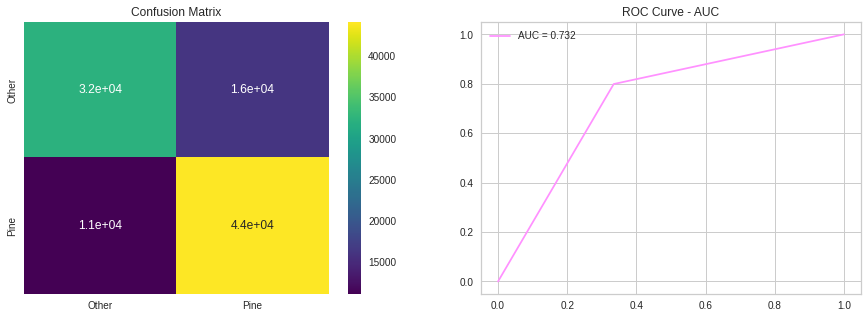

In [ ]:
y_test_pred = tree_clf.predict(X_test)
get_performance_measures("Tree_Classifier", "'Cover_Type_Y prediction based on Aspect and Elevation", y_test, y_test_pred, "Cover_Type_Y");

<font color="blue"><b>OBSERVATION: </b></font> The process of using cross validation to determine progressively better values for the regularization parameter min_samples_leaf has led to the discovery of a good value, 550, for this parameter which results in a tree with better performance than ones constructed using a random min_samples_leaf value.

<font color="blue"><b>OBSERVATION: </b></font> Both setting min_samples_leaf = 450 and max_depth = 6, resulted in similar accuracy scores but the latter has a much lower max depth of 6 compared to the former having a max depth of 16. Thus, choosing which regularization parameter to tweak must also be done wisely. Other techniques of determining optimal decision trees like cost complexity pruning exists which along with measuring inpurity, also take into account complexity factors like the depth of the tree in an attempt to identify the shortest tree with good performance.

## 8.1.3. Post Pruning: Cost Complexity Pruning (CCP)
CCP tries to identify trees that give good accuracy while at the same time are not very deep. It calculates a tree score taking these factors (no, of leaves, tree complexity and impurity of nodes) into account. 

<b>The following rough list tries to describe steps in the CCP algorithm.</b> (J. Starmer, 2021) was where this algorithm was learned from.
1. Let an impurity measure like Gini Impurity (GI) (or any other measure like Sum of Square Residuals, entropy etc.) be chosen.
2. Let tree score = gini impurity + alpha \* T where alpha = tree complexity penalty and T = no. of leaves.
3. Different alpha values are determined as folows :
    1. Build a full decision tree from entire dataset.
    2. Calculate tree score with alpha = 0. This tree would have lowest tree score when alpha = 0 since it can only have lowest tree score when complexity penalty is eliminated from the equation.
    3. Increase alpha until pruning results in a lower tree score.
    4. Continue to do this until tree has only 1 node left.
    5. Divide dataset into training and testing sets.
    6. Build trees using training data and calculate their tree scores such that alpha values correspond to ones discovered previously to result in subtrees starting from full tree and alpha = 0 leading to having progressively fewer leaves as well as tree scores.
    7. Calculate Gini Impurity of each tree so obtained on testing dataset. Select tree with smallest Gini Impurity.
    9. Repeat steps E, F, G for 10-fold cross validation.
4. The value for alpha that gave the lowest average Gini Impurity value is the optimal one.
5. Tree built on entire dataset with optimal alpha value is the optimal tree.

In below cells however, the cross validation step shall not be performed and only 6 values of alpha shall be considered so that cells do not take too long to run. (K. Naik, 2020) and (scikit learn, no date) have been reffered to for implmentation of CCP. 

<font color='red'>Warning: Due to the large size of the dataset, despite limiting no. of alpha values and avoiding cross-validation, the following 3 cells take a long time to run. Avoid running frequently.</font>

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=23)
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = list(set([round(float(alpha), 3) for alpha in path.ccp_alphas]))
ccp_alphas.sort()
print("alpha values = {}".format(ccp_alphas))

alpha values = [0.0, 0.001, 0.002, 0.004, 0.01, 0.1]


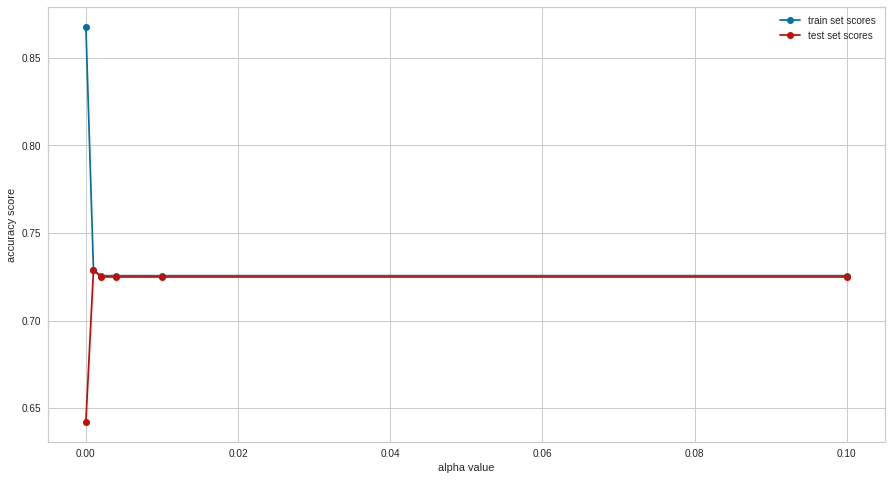

In [ ]:
tree_clfs = [DecisionTreeClassifier(random_state=23, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
tree_train_scores = [clf.score(X_train, y_train) for clf in tree_clfs]
tree_test_scores = [clf.score(X_test, y_test) for clf in tree_clfs]

fig = plt.figure(figsize=(15,8))
plt.plot(ccp_alphas, tree_train_scores, "bo-", label="train set scores")
plt.plot(ccp_alphas, tree_test_scores, "ro-", label="test set scores")
plt.legend()
plt.xlabel("alpha value")
plt.ylabel("accuracy score")
plt.show()

In [ ]:
# From above alpha values, pick the one that results in the best similar accuracy for both training and testing examples.
# The tree constructed using this selected ccp_alpha value shall be an optimal tree.
selected_alpha = 0.001
tree_clf = DecisionTreeClassifier(random_state=23, ccp_alpha=selected_alpha)
tree_clf.fit(X_train, y_train)
print("accuracy score on training set = {}".format(tree_clf.score(X_train, y_train)))
print("accuracy score on testing set = {}".format(tree_clf.score(X_test, y_test)))
print("tree max depth = {}".format(tree_clf.tree_.max_depth))

accuracy score on training set = 0.7285802038341925
accuracy score on testing set = 0.7288488812990246
tree max depth = 6


Performance of Tree_Classifier on 'Cover_Type_Y prediction based on Aspect and Elevation.

Performance Measures
Accuracy: 0.7288488812990246
Confusion Matrix: [[31864, 16537], [11567, 43679]]
Class Specific Performance: 
	Other: 
		TP: 31864
		TN: 43679
		FP: 11567
		FN: 16537
		Precision: 0.6583335055060846
		Recall: 0.733669498745136
		F: 0.6939628887533758
	Pine: 
		TP: 43679
		TN: 31864
		FP: 16537
		FN: 11567
		Precision: 0.79062737573761
		Recall: 0.7253719941543776
		F: 0.7565952434567218
ROC: 
	FP Rate: 0.3416664944939154
	TP Rate: 0.79062737573761
	AUC: 0.7244804406218474


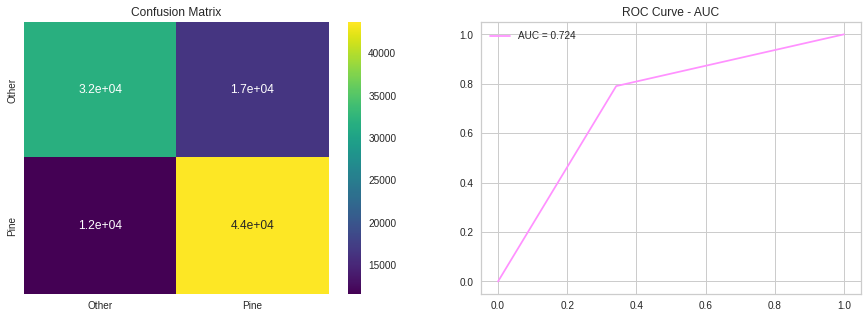

In [ ]:
y_test_pred = tree_clf.predict(X_test)
get_performance_measures("Tree_Classifier", "'Cover_Type_Y prediction based on Aspect and Elevation", y_test, y_test_pred, "Cover_Type_Y");

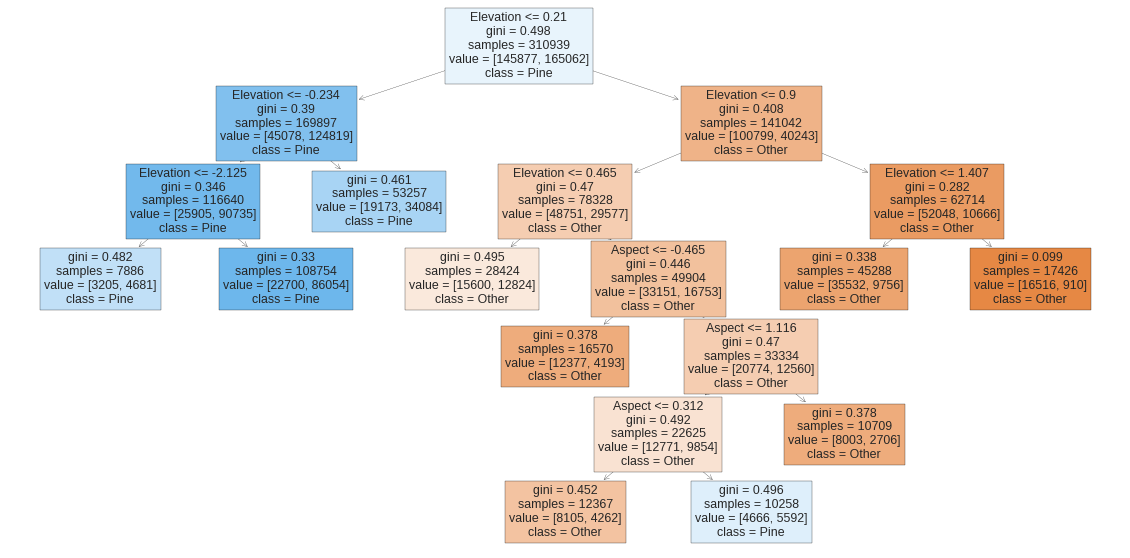

In [ ]:
figure = plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    filled = True,
    class_names = list(QUALITATIVE_ATTRIBUTES["Cover_Type_Y"].values()),
    feature_names = list(X_train.columns)
)
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> It can me seen that using CCP has also successfully determined an optimal (short and fairly accurate) decision tree that does not overfit the training data significantly (accuracy on both training and testing data is similar). While this is a great way to determine a good tree, it takes much longer to execute than pre-pruning techniques.

<font color="blue"><b>OBSERVATION: </b></font> There exist other kinds of tree classifiers like random forest classifier that perform classification with lesser chance of overfitting compared to decision trees. The following cells shall perform classification on the same set of features and class variable but using random forest classifier instead.

## 8.2. Random Forest Classifier
(N. Donges, 2021), (J. Hoare, no date) <br>
The random forest classifier generates various trees with random features as root and continues to make some random decisions for selection of nodes as the tree grows instead of always trying to determine the node that best fits the dataset as is the case in decision trees. This randomness contributes to reduction in overfitting. From decisions of the multiple generated trees, the decision that majority of the trees arrive at may be chosen. 

Random forest classifers are also sensitive to hyperparameters. An important paramenter is n_estimators which is the no. of random trees that will be built by the random forest classifier. One way to determine an optimal value for n_estimations is to try out different estimator values and plot its results. (Unfold Data Science, 2020)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

<font color='red'>Warning: Due to the large size of the dataset, the following 2 cells take a long time to run. Avoid running frequently.</font>

In [ ]:
n_estimators_range = range(30, 131, 30)
rf_clfs = [RandomForestClassifier(n_estimators=n).fit(X_train, y_train.values.ravel()) for n in n_estimators_range]

In [ ]:
y_preds_train_set= [rf_clf.predict(X_train) for rf_clf in rf_clfs]
y_preds_test_set= [rf_clf.predict(X_test) for rf_clf in rf_clfs]
rf_clf_train_roc_auc_scores = []
rf_clf_test_roc_auc_scores = []
for train_pred, test_pred in zip(y_preds_train_set, y_preds_test_set):
    fp_rate, tp_rate, thresholds = roc_curve(y_train, train_pred)
    rf_clf_train_roc_auc_scores.append(auc(fp_rate, tp_rate))
    fp_rate, tp_rate, thresholds = roc_curve(y_test, test_pred)
    rf_clf_test_roc_auc_scores.append(auc(fp_rate, tp_rate))

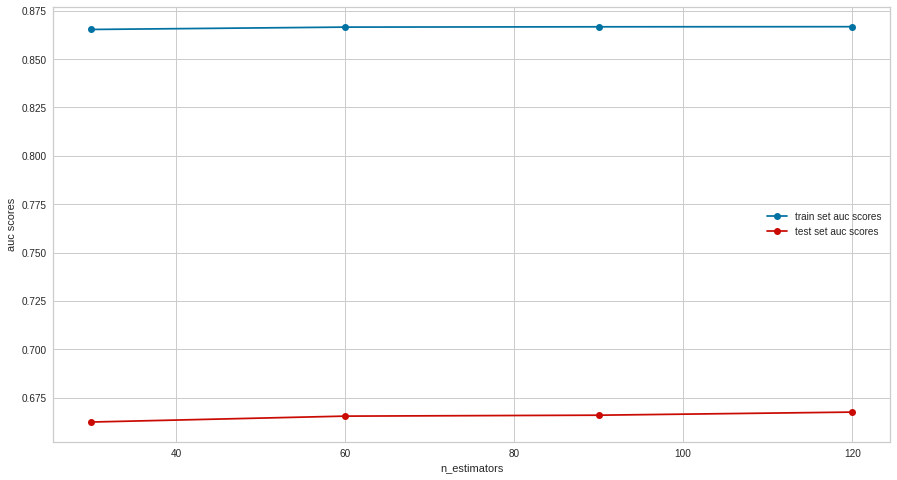

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.plot(n_estimators_range, rf_clf_train_roc_auc_scores, "bo-", label="train set auc scores")
plt.plot(n_estimators_range, rf_clf_test_roc_auc_scores, "ro-", label="test set auc scores")
plt.xlabel("n_estimators")
plt.ylabel("auc scores")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=90)
rf_clf.fit(X_train, y_train.values.ravel())
print("accuracy score on training set = {}".format(rf_clf.score(X_train, y_train)))
print("accuracy score on testing set = {}".format(rf_clf.score(X_test, y_test)))

accuracy score on training set = 0.8675913925239356
accuracy score on testing set = 0.6665219446776076


<font color="blue"><b>OBSERVATION: </b></font> Here, the random forest classifer does not do much better than the initial full depth decision tree classifier.

<font color="blue"><b>OBSERVATION: </b></font> Usually, random forests have reduced overfitting tendeny and results in better accuracy on the test set than simple decision trees. In this case however, random forest classifier performs similar to the decision tree and not much better. This is likely due to the fact that both classfiers are trying to classify the class attribute using the same 2 features. Only 2 features are used as input. Random forests are great for when there are multiple features and its unclear what combinations of them as nodes in a tree lead to better results. Here however, there are only 2 features using which even if generated randomly, most trees would end up with similar performance. This assumption is confirmed by the fact that in the above graph, changing n_estimators dont result in much difference in auc scores. Thus, in such a scenario a simple decision tree may be just as efficent and faster compared to a random forest classifer which is more computationally expensive to both run and experiment with for hyperparameter fine tuning.

<font color="blue"><b>OBSERVATION: </b></font> Better values can be determined for hyperparameters of the random forest classifier like max depth, no. of leaves etc, just like was done for decision trees using cross validation or others methods like grid search (W. Koehrsen, 2018). But, these experiments would be much more computationally expensive and time consuming with the random forest classifier than with the decision tree classifier. In this scenario where ranfom forest presents no significant advantage over decision trees, it can be concluded that the roc auc score achieved by a fine tuned decision tree of >0.70 is the best known performance w.r.t. predicting 'Cover_Type_Y' based on 'Elevation' and 'Aspect' with this dataset. 

# <u>Part 4</u>
It is known from previous experiments that "Hillshade_Avg_Y" derived from "Hillshade_Avg" is a suitable candidate to be predicted based on features like "Slope", "Aspect", "Horizontal_Distance_To_Roadways", "Elevation" and "Horizontal_Distance_To_Fire_Points". Thus, "Hillshade_Avg_Y" derived from "Hillshade_Avg" shall be the target attribute whose classes are to be predicted based on above mentioned features. 

# 9. Linear Classification
Logistic regression based linear classifier is among most popular choices when hoping to perform linear classification.

In [ ]:
DF_part4 = DF[["Slope", "Aspect", "Horizontal_Distance_To_Roadways", "Elevation", "Horizontal_Distance_To_Fire_Points", "Hillshade_Avg_Y", "Hillshade_Avg"]]
target = "Hillshade_Avg_Y"

## 9.1. Linear Separability 
Data is said to show great linear separation if a line passing through the data points can separate the points as per target attribute classes.

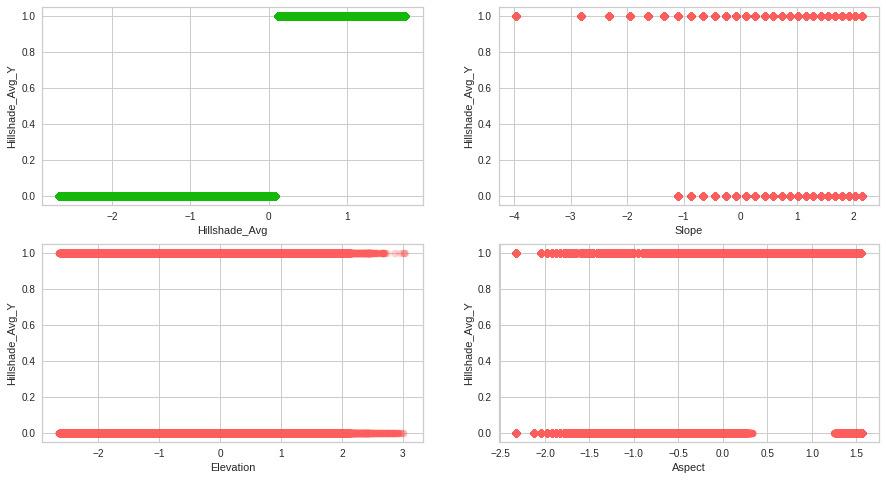

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.xlabel("Hillshade_Avg")
plt.ylabel("Hillshade_Avg_Y")
x_axis = DF_part4["Hillshade_Avg"]
y_axis = DF_part4["Hillshade_Avg_Y"]
plt.scatter(
    x = x_axis,
    y = y_axis,
    color = Colors.GREEN,
    alpha = 0.1,
)

plt.subplot(222)
plt.xlabel("Slope")
plt.ylabel("Hillshade_Avg_Y")
x_axis = DF_part4["Slope"]
y_axis = DF_part4["Hillshade_Avg_Y"]
plt.scatter(
    x = x_axis,
    y = y_axis,
    color = Colors.RED,
    alpha = 0.1,
)

plt.subplot(223)
plt.xlabel("Elevation")
plt.ylabel("Hillshade_Avg_Y")
x_axis = DF_part4["Elevation"]
y_axis = DF_part4["Hillshade_Avg_Y"]
plt.scatter(
    x = x_axis,
    y = y_axis,
    color = Colors.RED,
    alpha = 0.1,
)

plt.subplot(224)
plt.xlabel("Aspect")
plt.ylabel("Hillshade_Avg_Y")
x_axis = DF_part4["Aspect"]
y_axis = DF_part4["Hillshade_Avg_Y"]
plt.scatter(
    x = x_axis,
    y = y_axis,
    color = Colors.RED,
    alpha = 0.1,
)

<font color="blue"><b>OBSERVATION: </b></font> "Hillshade_Avg_Y" was derived from "Hillshade_Avg" so, the plot with these two attributes is used to show what perfectly linearly separable data would look like (plot with green points). A straight line can be drawn through a Hillshade_Avg value slightly > 0 such that it perfectly splits the datapoints w.r.t. Hillshade_Avg_Y. However, this is not observed when Hillshade_Avg_Y is plotted with "Aspect" or "Slope" or "Elevation. This shows that a 2 dimensional plot involving Hillshade_Avg_Y here results in data that is not very linearly separable. Thus, in this case, it might be better to perform linear classification with more than 2 dimensions.

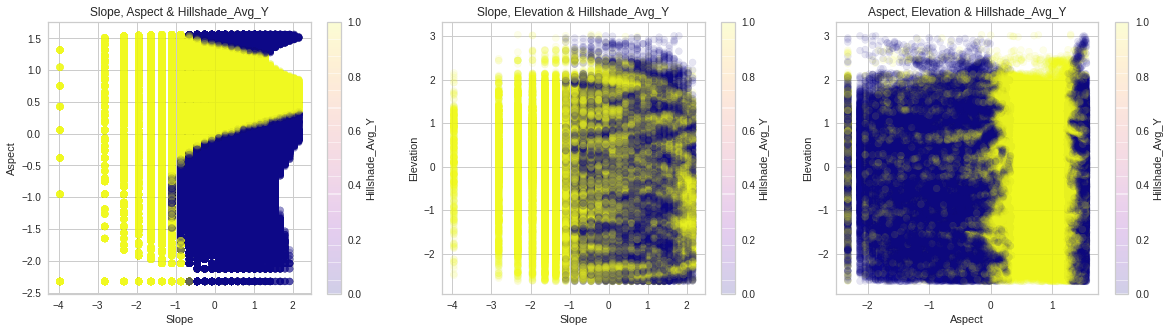

In [ ]:
fig = plt.figure(figsize=(20,5))
color = DF_part4[target]

plt.subplot(131)
plt.title("Slope, Aspect & Hillshade_Avg_Y")
plt.xlabel("Slope")
plt.ylabel("Aspect")
x_axis = DF_part4["Slope"]
y_axis = DF_part4["Aspect"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'plasma'
), label="Hillshade_Avg_Y")

plt.subplot(132)
plt.title("Slope, Elevation & Hillshade_Avg_Y")
plt.xlabel("Slope")
plt.ylabel("Elevation")
x_axis = DF_part4["Slope"]
y_axis = DF_part4["Elevation"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'plasma'
), label="Hillshade_Avg_Y")

plt.subplot(133)
plt.title("Aspect, Elevation & Hillshade_Avg_Y")
plt.xlabel("Aspect")
plt.ylabel("Elevation")
x_axis = DF_part4["Aspect"]
y_axis = DF_part4["Elevation"]
fig.colorbar(plt.scatter(
    x = x_axis,
    y = y_axis,
    c = color,
    alpha = 0.1,
    cmap = 'plasma'
), label="Hillshade_Avg_Y")
plt.show()

<font color="blue"><b>OBSERVATION: </b></font> From above graphs it can noted that selecting "Slope" and "Aspect" as features for predicting "Hillshade_Avg_Y" results in clearer clusters. So, these features shall be selected for classification. But, resulting data points as can be seen from above plot1, do not show perfect linear separation though it is still better than say in plot 2 where "Slope" and "Elevation" are chosen features. In above case, if a line were to be plotted through the 3 plots hoping to separate the yellow points from the blue, then the best achivable result would be with plot 1 and the worst would be with plot 2. Though plot 3 seems more linearly separable than plot 1 at first glance, it is to be noted that the blue and yellow points in plot three overlap much more than in plot1 with more cleaner clustering.
Thus, selecting "Aspect" and "Slope" as features shall result in data with better linear separation and selecting "Elevation" and "Slope" intead will result in worst among identified linearly separable data. Since plot 2 shows too poor linear separability, "Aspect" and "Slope" (plot1) shall be considered for tests with data showing good linear separation and "Elevation" and "Aspect" shall be chosen features for tests with data showing lesser linear separation.

## 9.2. Logistic Regression Based Classifier Experiments

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
X_part4_1 = DF[["Aspect", "Slope"]] # more linear separation
X_part4_2 = DF[["Elevation", "Aspect"]] # less linear separation
y_part4 = DF[target]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_part4_1, y_part4, test_size = 0.25, random_state = 23, stratify=y) # more linear separation
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_part4_2, y_part4, test_size = 0.25, random_state = 23, stratify=y) # less linear separation

In [ ]:
# DATA SHOWING MORE LINEAR SEPARATION (Aspect, Slope)
# no cross validation
log_reg = LogisticRegression(solver="lbfgs", random_state=23)
log_reg.fit(X_train1, y_train1)
y_train_score = log_reg.score(X_train1, y_train1)
y_test_score = log_reg.score(X_test1, y_test1)

# 10 fold stratified cross validation
log_reg = LogisticRegressionCV(solver="lbfgs", random_state=23, cv=10)
log_reg.fit(X_train1, y_train1)
y_train_score_10cv = log_reg.score(X_train1, y_train1)
y_test_score_10cv = log_reg.score(X_test1, y_test1)

# print accuracy
print("accuracy score on training set (no cross validation) = {}".format(y_train_score))
print("accuracy score on testing set (no cross validation) = {}".format(y_test_score))
print("accuracy score on training set (10 fold stratified cross validation) = {}".format(y_train_score_10cv))
print("accuracy score on testing set (10 fold stratified cross validation) = {}".format(y_test_score_10cv))

accuracy score on training set (no cross validation) = 0.7916633165990757
accuracy score on testing set (no cross validation) = 0.7898540237537025
accuracy score on training set (10 fold stratified cross validation) = 0.7923065295765407
accuracy score on testing set (10 fold stratified cross validation) = 0.790809188881492


In [ ]:
# DATA SHOWING LESS LINEAR SEPARATION (Elevation, Slope)
# no cross validation
log_reg = LogisticRegression(solver="lbfgs", random_state=23)
log_reg.fit(X_train2, y_train2)
y_train_score = log_reg.score(X_train2, y_train2)
y_test_score = log_reg.score(X_test2, y_test2)

# 10 fold stratified cross validation
log_reg = LogisticRegressionCV(solver="lbfgs", random_state=23, cv=10)
log_reg.fit(X_train2, y_train2)
y_train_score_10cv = log_reg.score(X_train2, y_train2)
y_test_score_10cv = log_reg.score(X_test2, y_test2)

# print accuracy
print("accuracy score on training set (no cross validation) = {}".format(y_train_score))
print("accuracy score on testing set (no cross validation) = {}".format(y_test_score))
print("accuracy score on training set (10 fold stratified cross validation) = {}".format(y_train_score_10cv))
print("accuracy score on testing set (10 fold stratified cross validation) = {}".format(y_test_score_10cv))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

accuracy score on training set (no cross validation) = 0.7672984090127002
accuracy score on testing set (no cross validation) = 0.7685509469642151
accuracy score on training set (10 fold stratified cross validation) = 0.7672984090127002
accuracy score on testing set (10 fold stratified cross validation) = 0.7685509469642151


<font color="blue"><b>OBSERVATION: </b></font> Logistic regression with chosen target attribute and feature attribute values show similar accuracy with training and testing data (with and without cross validation) suggesting that here, logistic linear classifier is able to generalize to unseen data almost just as well as it performs on known data. Generally linear models show lesser tendency to overfit data compared to non-linear models because linear models have comparatively fewer hyperparameters that can be tweaked. Having more hyperparameters means the model can be adjusted to be highly specialized with the potential to identify every little pattern in the data which like in the case of non-linear models leads to overfitting. This is not to say that linear models never overfit data. It is just that they are less likely to do so compared to other more complex and non-linear models like Neural Networks to be explored in next section or decision trees as was seen in a previous section. (J. Brownlee, 2016)

<font color="blue"><b>OBSERVATION: </b></font> The characteristic of logistic regression where it performs better on data showing more linear separation of data is evident here. In above experiment, logistic regression classifier was able to classify "Hillshade_Avg_Y" better when trained on data showing more linear separation of data points w.r.t. "Hillshade_Avg_Y" classes. The linear classifer performed significantly worse on data that showed less linear separability.

# 10. Neural Networks (NNs)
(Learning Monkey, 2020)

NNs are known for their ability to identify complex decision boundaries on accord of their activation functions introducing non-linearity. A perceptron (building block of NNs) as well as entire NNs, without an activation function is just a linear classifier. Activation functions allow NNs to come up with non-linear functions whose parameter weights can be fine tuned to regress/classify data after training using given labels. This means that NNs are less affected if the dataset is less linearly separable.

<font color="blue"><b>OBSERVATION: </b></font> In this section, "Aspect" and "Slope" shall be chosen as inputs features since it was identified from the previous section that this combination of features result in classes w.r.t. Hillshade_Avg_Y being less linearly separable. The linear classifier in the previous section performed worse given these features compared to when "Aspect" and "Elevation" were chosen as feaures resulting in more linear separabilty. It is <b>expected</b> that NNs without an activation function will show similar performance to that of the linear classifier but with activation functions, a NN would likely perform better than linear classifiers when trained and tested on data that shows less linear separability.

## 10.1. Artifical Neural Networks (ANNs)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron

In [ ]:
X = DF[["Elevation", "Aspect"]]
y = DF[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, stratify=y) 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.5, random_state = 23)

In [ ]:
display(X.describe())

Elevation        Aspect
count  4.145860e+05  4.145860e+05
mean  -3.033324e-14 -1.394832e-14
std    1.000001e+00  1.000001e+00
min   -2.637797e+00 -2.324878e+00
25%   -6.594834e-01 -7.663461e-01
50%    8.856540e-02 -4.305219e-02
75%    7.698800e-01  8.982649e-01
max    3.041186e+00  1.562236e+00

<font color='magenta'><b>Note:</b> Neural networks constructed below are kept simple to ensure a reasonable computing time.</font>

(J. Brownlee, 2018)

The updoming sections shall test the same simple neural network on data showing less linear separability using 3 different popular activation functions as given below.
* sigmoid activation function: f(x) = 1/(1+e^(-x))
* tanh activation function: f(x) = (e^(x) – e^(-x)) / (e^(x) + e^(-x))
* relu activation function: f(x) = max(0,x)

The output layer of all NN models shall make use of softmax activation function to classify "Hillshade_Avg_Y" into 1 of 2 classes.

The performance of all of these NNs shall be compared against that of an NN with same structure but having no activation function. The following model architecture shall be one of different structures experimented with as determining a suitable model structure for a ML problem is often an experimental process. 

<u><b>MODEL ARCHITECTURE 1</b></u>
* input layer = 2 units (layer 1) [no/sigmoid/tanh/relu activation function]
* 1st  hidden layer = 10 units (layer 2) [no/sigmoid/tanh/relu activation function]
* output layer = 2 units (layer 5) [softmax activation function] 
* optimizer = stochastic gradient descent (sgd)
* loss = sparse categorical cross entropy
* metric = accuracy
* epochs = 25

In [ ]:
# NO ACTIVATION FUNCTION
m = keras.models.Sequential([
    keras.layers.Dense(units=2, activation=None),
    keras.layers.Dense(units=10, activation=None),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
m.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_m = m.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validate, y_validate))
m_pred = [np.argmax(pred) for pred in m.predict(X_test)]
m_train_loss, m_train_acc = m.evaluate(X_train,  y_train, verbose=1)
m_validate_loss, m_validate_acc = m.evaluate(X_validate,  y_validate, verbose=1)
m_test_loss, m_test_acc = m.evaluate(X_test,  y_test, verbose=1)

Epoch 1/25
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5859 - accuracy: 0.7641 - val_loss: 0.5877 - val_accuracy: 0.7668
Epoch 2/25
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5853 - accuracy: 0.7675 - val_loss: 0.5880 - val_accuracy: 0.7708
Epoch 3/25
4859/4859 [==============================] - 12s 2ms/step - loss: 0.5853 - accuracy: 0.7676 - val_loss: 0.5878 - val_accuracy: 0.7712
Epoch 4/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.5853 - accuracy: 0.7678 - val_loss: 0.5878 - val_accuracy: 0.7676
Epoch 5/25
4859/4859 [==============================] - 12s 2ms/step - loss: 0.5853 - accuracy: 0.7673 - val_loss: 0.5880 - val_accuracy: 0.7676
Epoch 6/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.5853 - accuracy: 0.7678 - val_loss: 0.5879 - val_accuracy: 0.7670
Epoch 7/25
4859/4859 [==============================] - 12s 2ms/step - loss: 0.5853 - accuracy: 0.7677 - val_loss: 0.5879 - val_ac

In [ ]:
# SIGMOID ACTIVATION
ms = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='sigmoid'),
    keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='softmax')
])
ms.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ms = ms.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validate, y_validate))
ms_pred = [np.argmax(pred) for pred in ms.predict(X_test)]
ms_train_loss, ms_train_acc = ms.evaluate(X_train,  y_train, verbose=1)
ms_validate_loss, ms_validate_acc = ms.evaluate(X_validate,  y_validate, verbose=1)
ms_test_loss, ms_test_acc = ms.evaluate(X_test,  y_test, verbose=1)

Epoch 1/25
4859/4859 [==============================] - 14s 3ms/step - loss: 0.6941 - accuracy: 0.5038 - val_loss: 0.6851 - val_accuracy: 0.6084
Epoch 2/25
4859/4859 [==============================] - 18s 4ms/step - loss: 0.6468 - accuracy: 0.7154 - val_loss: 0.5870 - val_accuracy: 0.7859
Epoch 3/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.5550 - accuracy: 0.7840 - val_loss: 0.5436 - val_accuracy: 0.7821
Epoch 4/25
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5366 - accuracy: 0.7834 - val_loss: 0.5355 - val_accuracy: 0.7823
Epoch 5/25
4859/4859 [==============================] - 17s 3ms/step - loss: 0.5305 - accuracy: 0.7830 - val_loss: 0.5307 - val_accuracy: 0.7809
Epoch 6/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.5263 - accuracy: 0.7831 - val_loss: 0.5271 - val_accuracy: 0.7828
Epoch 7/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.5231 - accuracy: 0.7832 - val_loss: 0.5241 - val_ac

In [ ]:
# TANH ACTIVATION
mt = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='tanh'),
    keras.layers.Dense(units=10, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])
mt.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mt = mt.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validate, y_validate))
mt_pred = [np.argmax(pred) for pred in mt.predict(X_test)]
mt_train_loss, mt_train_acc = mt.evaluate(X_train,  y_train, verbose=1)
mt_validate_loss, mt_validate_acc = mt.evaluate(X_validate,  y_validate, verbose=1)
mt_test_loss, mt_test_acc = mt.evaluate(X_test,  y_test, verbose=1)

Epoch 1/25
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5280 - accuracy: 0.7713 - val_loss: 0.4961 - val_accuracy: 0.7810
Epoch 2/25
4859/4859 [==============================] - 17s 4ms/step - loss: 0.4550 - accuracy: 0.7896 - val_loss: 0.4229 - val_accuracy: 0.8189
Epoch 3/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.4084 - accuracy: 0.8176 - val_loss: 0.4018 - val_accuracy: 0.8201
Epoch 4/25
4859/4859 [==============================] - 17s 4ms/step - loss: 0.3989 - accuracy: 0.8210 - val_loss: 0.3974 - val_accuracy: 0.8222
Epoch 5/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.3970 - accuracy: 0.8212 - val_loss: 0.4018 - val_accuracy: 0.8177
Epoch 6/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.3966 - accuracy: 0.8218 - val_loss: 0.3983 - val_accuracy: 0.8225
Epoch 7/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.3962 - accuracy: 0.8217 - val_loss: 0.3966 - val_ac

In [ ]:
# RELU ACTIVATION
mr = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='relu'),
    keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
mr.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mr = mr.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validate, y_validate))
mr_pred = [np.argmax(pred) for pred in mr.predict(X_test)]
mr_train_loss, mr_train_acc = mr.evaluate(X_train,  y_train, verbose=1)
mr_validate_loss, mr_validate_acc = mr.evaluate(X_validate,  y_validate, verbose=1)
mr_test_loss, mr_test_acc = mr.evaluate(X_test,  y_test, verbose=1)

Epoch 1/25
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5480 - accuracy: 0.7702 - val_loss: 0.4814 - val_accuracy: 0.7826
Epoch 2/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.4437 - accuracy: 0.7965 - val_loss: 0.4256 - val_accuracy: 0.7975
Epoch 3/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.4163 - accuracy: 0.8162 - val_loss: 0.4132 - val_accuracy: 0.8102
Epoch 4/25
4859/4859 [==============================] - 12s 2ms/step - loss: 0.4082 - accuracy: 0.8193 - val_loss: 0.4081 - val_accuracy: 0.8163
Epoch 5/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.4046 - accuracy: 0.8199 - val_loss: 0.4025 - val_accuracy: 0.8220
Epoch 6/25
4859/4859 [==============================] - 12s 3ms/step - loss: 0.4028 - accuracy: 0.8196 - val_loss: 0.4009 - val_accuracy: 0.8219
Epoch 7/25
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4017 - accuracy: 0.8203 - val_loss: 0.4002 - val_ac

In [ ]:
print("no activation: train accuracy = {}".format(m_train_acc))
print("no activation: validate accuracy = {}".format(m_validate_acc))
print("no activation: test accuracy = {}\n".format(m_test_acc))
print("sigmoid: train accuracy = {}".format(ms_train_acc))
print("sigmoid: validate accuracy = {}".format(ms_validate_acc))
print("sigmoid: test accuracy = {}\n".format(ms_test_acc))
print("tanh: train accuracy = {}".format(mt_train_acc))
print("tanh: validate accuracy = {}".format(mt_validate_acc))
print("tanh: test accuracy = {}\n".format(mt_test_acc))
print("relu: train accuracy = {}".format(mr_train_acc))
print("relu: validate accuracy = {}".format(mr_validate_acc))
print("relu: test accuracy = {}".format(mr_test_acc))

no activation: train accuracy = 0.7677993774414062
no activation: validate accuracy = 0.7661928534507751
no activation: test accuracy = 0.7680588960647583

sigmoid: train accuracy = 0.8127601146697998
sigmoid: validate accuracy = 0.8127806186676025
sigmoid: test accuracy = 0.8145242929458618

tanh: train accuracy = 0.8217329382896423
tanh: validate accuracy = 0.8229368925094604
tanh: test accuracy = 0.8237093091011047

relu: train accuracy = 0.8188899159431458
relu: validate accuracy = 0.8193477988243103
relu: test accuracy = 0.8203903436660767


<font color="blue"><b>OBSERVATION: </b></font>
* A NN with no activation function gives performance similar to that of a linear classifier as expected.
* The tanh activation function leads to slightly better performance than when sigmoid activation function was used.
* The relu activation function results in almost same model performance as when tanh activation function was used. Since relu is a much simpler function to compute, it does result in faster training and evaluation than tanh. Hence if the models were many layers deep and had more neurons then relu will definitly be preferred over tanh. 
* All models with activation functions perform better on this data with less linear separability compared to the linear classifier (equivalent to NN model with no activation function)  as expected. This is due to the activation functions introducing non-linearity to the model allowing it to fit more complex curves and not just a line to the data.Non-linear classifiers like NNs are less affected by data that shows less linear sepration of data points w.r.t. the target variable.
* After about 15 epochs, most of the models do not show much improvement in accuracy. Thus, it may not be worth the computation time to train for 20 epochs.
* Usually, a single hidden layer is not enough to capture often complex patterns in real-world datasets like this one. Hence, the models may benefit from adding more layers.

NN models have many hyperparameters like activaiton function, no. of layers, no of neurons in each layer, loss function, no. of epochs and so on. Sometimes the NN can perform well without the need for many layers or neurons. One way to determine best parameters could be to determine most influencial parameters though some experiments and then to use techniques like plotting results of cross validation w.r.t. a parameter to determine the value for it that results in best accuracy/lowest loss. To keep computation as light and within a reasonable time frame as possible, the following experiments shall simply vary some of these parameters and observe the differences in performance if any, instead of trying to implement techniques (like using cross validation) to determine the best possible hyperparameter values.

<u><b>MODEL ARCHITECTURE 2</b></u>
* input layer = <b>2 units (layer 1)</b> [no/sigmoid/tanh/relu activation function]
* 1st  hidden layer = <b>5 units (layer 2)</b> [no/sigmoid/tanh/relu activation function]
* 2nd  hidden layer = <b>10 units (layer 3)</b> [no/sigmoid/tanh/relu activation function]
* 3rd  hidden layer = <b>5 units (layer 4)</b> [no/sigmoid/tanh/relu activation function]
* output layer = 2 units (layer 5) [softmax activation function] 
* optimizer = stochastic gradient descent (sgd)
* loss = sparse categorical cross entropy
* metric = accuracy
* epochs = <b>10</b>

In [ ]:
# NO ACTIVATION FUNCTION
m = keras.models.Sequential([
    keras.layers.Dense(units=2, activation=None),
    keras.layers.Dense(units=5, activation=None),
    keras.layers.Dense(units=10, activation=None),
    keras.layers.Dense(units=5, activation=None),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
m.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_m = m.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validate, y_validate))
m_pred = [np.argmax(pred) for pred in m.predict(X_test)]
m_train_loss, m_train_acc = m.evaluate(X_train,  y_train, verbose=1)
m_validate_loss, m_validate_acc = m.evaluate(X_validate,  y_validate, verbose=1)
m_test_loss, m_test_acc = m.evaluate(X_test,  y_test, verbose=1)

Epoch 1/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5896 - accuracy: 0.7576 - val_loss: 0.5893 - val_accuracy: 0.7559
Epoch 2/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5857 - accuracy: 0.7666 - val_loss: 0.5878 - val_accuracy: 0.7683
Epoch 3/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5856 - accuracy: 0.7669 - val_loss: 0.5892 - val_accuracy: 0.7798
Epoch 4/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5856 - accuracy: 0.7675 - val_loss: 0.5880 - val_accuracy: 0.7576
Epoch 5/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5855 - accuracy: 0.7674 - val_loss: 0.5880 - val_accuracy: 0.7640
Epoch 6/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5856 - accuracy: 0.7669 - val_loss: 0.5880 - val_accuracy: 0.7700
Epoch 7/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5855 - accuracy: 0.7675 - val_loss: 0.5878 - val_ac

In [ ]:
# SIGMOID ACTIVATION
ms = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='sigmoid'),                         
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=10, activation='sigmoid'),
     keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='softmax')
])
ms.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ms = ms.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validate, y_validate))
ms_pred = [np.argmax(pred) for pred in ms.predict(X_test)]
ms_train_loss, ms_train_acc = ms.evaluate(X_train,  y_train, verbose=1)
ms_validate_loss, ms_validate_acc = ms.evaluate(X_validate,  y_validate, verbose=1)
ms_test_loss, ms_test_acc = ms.evaluate(X_test,  y_test, verbose=1)

Epoch 1/10
4859/4859 [==============================] - 14s 3ms/step - loss: 0.6927 - accuracy: 0.5183 - val_loss: 0.6922 - val_accuracy: 0.5099
Epoch 2/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.6921 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5063
Epoch 3/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.6917 - accuracy: 0.5387 - val_loss: 0.6914 - val_accuracy: 0.5063
Epoch 4/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.6909 - accuracy: 0.5507 - val_loss: 0.6904 - val_accuracy: 0.6895
Epoch 5/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.6896 - accuracy: 0.5810 - val_loss: 0.6886 - val_accuracy: 0.5430
Epoch 6/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.6873 - accuracy: 0.6234 - val_loss: 0.6856 - val_accuracy: 0.5062
Epoch 7/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.6821 - accuracy: 0.6696 - val_loss: 0.6771 - val_ac

In [ ]:
# TANH ACTIVATION
mt = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='tanh'),
    keras.layers.Dense(units=5, activation='tanh'),
    keras.layers.Dense(units=10, activation='tanh'),
    keras.layers.Dense(units=5, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])
mt.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mt = mt.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validate, y_validate))
mt_pred = [np.argmax(pred) for pred in mt.predict(X_test)]
mt_train_loss, mt_train_acc = mt.evaluate(X_train,  y_train, verbose=1)
mt_validate_loss, mt_validate_acc = mt.evaluate(X_validate,  y_validate, verbose=1)
mt_test_loss, mt_test_acc = mt.evaluate(X_test,  y_test, verbose=1)

Epoch 1/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5125 - accuracy: 0.7770 - val_loss: 0.4745 - val_accuracy: 0.7857
Epoch 2/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4241 - accuracy: 0.8055 - val_loss: 0.4005 - val_accuracy: 0.8209
Epoch 3/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.3991 - accuracy: 0.8203 - val_loss: 0.4027 - val_accuracy: 0.8159
Epoch 4/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.3973 - accuracy: 0.8206 - val_loss: 0.3971 - val_accuracy: 0.8228
Epoch 5/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.3965 - accuracy: 0.8215 - val_loss: 0.3944 - val_accuracy: 0.8223
Epoch 6/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.3962 - accuracy: 0.8211 - val_loss: 0.3949 - val_accuracy: 0.8227
Epoch 7/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.3960 - accuracy: 0.8209 - val_loss: 0.3943 - val_ac

In [ ]:
# RELU ACTIVATION
mr = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='relu'),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
mr.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mr = mr.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validate, y_validate))
mr_pred = [np.argmax(pred) for pred in mr.predict(X_test)]
mr_train_loss, mr_train_acc = mr.evaluate(X_train,  y_train, verbose=1)
mr_validate_loss, mr_validate_acc = mr.evaluate(X_validate,  y_validate, verbose=1)
mr_test_loss, mr_test_acc = mr.evaluate(X_test,  y_test, verbose=1)

Epoch 1/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.5366 - accuracy: 0.7670 - val_loss: 0.4535 - val_accuracy: 0.7986
Epoch 2/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4140 - accuracy: 0.8168 - val_loss: 0.4024 - val_accuracy: 0.8197
Epoch 3/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.4008 - accuracy: 0.8200 - val_loss: 0.4017 - val_accuracy: 0.8193
Epoch 4/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.3987 - accuracy: 0.8199 - val_loss: 0.3961 - val_accuracy: 0.8210
Epoch 5/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.3967 - accuracy: 0.8208 - val_loss: 0.3951 - val_accuracy: 0.8229
Epoch 6/10
4859/4859 [==============================] - 14s 3ms/step - loss: 0.3959 - accuracy: 0.8209 - val_loss: 0.4048 - val_accuracy: 0.8158
Epoch 7/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.3955 - accuracy: 0.8208 - val_loss: 0.4001 - val_ac

In [ ]:
print("no activation: train accuracy = {}".format(m_train_acc))
print("no activation: validate accuracy = {}".format(m_validate_acc))
print("no activation: test accuracy = {}\n".format(m_test_acc))
print("sigmoid: train accuracy = {}".format(ms_train_acc))
print("sigmoid: validate accuracy = {}".format(ms_validate_acc))
print("sigmoid: test accuracy = {}\n".format(ms_test_acc))
print("tanh: train accuracy = {}".format(mt_train_acc))
print("tanh: validate accuracy = {}".format(mt_validate_acc))
print("tanh: test accuracy = {}\n".format(mt_test_acc))
print("relu: train accuracy = {}".format(mr_train_acc))
print("relu: validate accuracy = {}".format(mr_validate_acc))
print("relu: test accuracy = {}".format(mr_test_acc))

no activation: train accuracy = 0.763920783996582
no activation: validate accuracy = 0.7622692584991455
no activation: test accuracy = 0.7643636465072632

sigmoid: train accuracy = 0.784696638584137
sigmoid: validate accuracy = 0.7839711904525757
sigmoid: test accuracy = 0.7854255437850952

tanh: train accuracy = 0.8223761916160583
tanh: validate accuracy = 0.8225638270378113
tanh: test accuracy = 0.8242785334587097

relu: train accuracy = 0.821958065032959
relu: validate accuracy = 0.8216311931610107
relu: test accuracy = 0.8231400847434998


|Performace Metrics|Model Architecture 1| Model Architecture 2|
|---|---|---|
|<b>none train</b> accuracy|~ 0.767|~ 0.763|
|<b>none validate</b> accuracy|~ 0.766|~ 0.762|
|<b>none test</b> accuracy|~ 0.768|~ 0.764|
|<hr>|<hr>|<hr>|
|<b>sigmoid train</b> accuracy|~ 0.812|~ 0.784|
|<b>sigmoid validate</b> accuracy|~ 0.812|~ 0.783|
|<b>sigmoid test</b> accuracy|~ 0.814|~ 0.785|
|<hr>|<hr>|<hr>|
|<b>tanh train</b> accuracy|~ 0.821|~ 0.822|
|<b>tanh validate</b> accuracy|~ 0.822|~ 0.822|
|<b>tanh test</b> accuracy|~ 0.823|~ 0.824|
|<hr>|<hr>|<hr>|
|<b>relu train</b> accuracy|~ 0.818|~ 0.821|
|<b>relu validate</b> accuracy|~ 0.819|~ 0.821|
|<b>relu test</b> accuracy|~ 0.820|~ 0.823|
|<hr>|<hr>|<hr>|
|<b>data linear separation</b>|less|less|

<font color="blue"><b>OBSERVATION: </b></font>
* With Model Architecture 2 , NNs using activation functions sigmoid and tanh perform worse than they did with Model Architecture 1. This is likely because they are unable to learn fast enough in only 10 epochs. Sigmoid is known to be slow to converge on optimal values.
* NN models using tanh and relu activation functions perform just as well if not better with model architecture 2 compared to with model architecture 1. This confirms the throries suggesting the superior nature of these algorithms over sigmoid and linear activation functions.
* Nevertheless, 10 epochs is perhaps too less for the models to converge on optimal solutions. Few more epochs may lead to better results. Upcoming NN models shall train for few more epochs.
* Models may also benefit from few more neurons in layers as here, results of NN using relu activation function show that it did do a little better with model architecture 2 having more neurons and layers than with model architecture 1.
* The tanh function which like the sigmoid function is also an 's' shaped function, is known to almost always perform better than the sigmoid function as can be observed from above experiments. Thus following experiments shall compare performance of only 3 models using no activation function, tanh activation function and relu activation function respectively.
*  Let upcoming NN models try to classify data using features "Aspect" and "Slope" that result in clear culsters. This can present a better opportunity to judge how well each of the NN models perform. Additionally, train and validation accuracy can be plotted against each other across epochs to gain further understanding of model performance and to see how well the models genaralize to new data.

<u><b>MODEL ARCHITECTURE 3</b></u>
* input layer = 2 units (layer 1) [no/sigmoid/tanh/relu activation function]
* 1st  hidden layer = <b>15</b> units (layer 2) [no/sigmoid/tanh/relu activation function]
* 2nd  hidden layer = 10 units (layer 3) [no/sigmoid/tanh/relu activation function]
* 3rd  hidden layer = <b>15</b> units (layer 4) [no/sigmoid/tanh/relu activation function] 
* 3rd  hidden layer = 2 units (layer 5) [softmax activation function] 
* optimizer = stochastic gradient descent (sgd)
* loss = sparse categorical cross entropy
* metric = accuracy
* epochs = <b>20</b>

In [ ]:
X = DF[["Slope", "Aspect"]]
y = DF[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23, stratify=y) 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.5, random_state = 23)

In [ ]:
display(X_train.head(3))
display(y_train.head(3))

Slope    Aspect
110622 -1.099073 -1.224723
70754   1.296929  1.286773
408876  0.587168 -0.470513

Hillshade_Avg_Y
110622                1
70754                 0
408876                0

In [ ]:
# NO ACTIVATION FUNCTION
m = keras.models.Sequential([
    keras.layers.Dense(units=2, activation=None),
    keras.layers.Dense(units=15, activation=None),
    keras.layers.Dense(units=10, activation=None),
    keras.layers.Dense(units=15, activation=None),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
m.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_m = m.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_validate, y_validate))
m_pred = [np.argmax(pred) for pred in m.predict(X_test)]
m_train_loss, m_train_acc = m.evaluate(X_train,  y_train, verbose=1)
m_validate_loss, m_validate_acc = m.evaluate(X_validate,  y_validate, verbose=1)
m_test_loss, m_test_acc = m.evaluate(X_test,  y_test, verbose=1)

Epoch 1/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.4518 - accuracy: 0.7902 - val_loss: 0.4514 - val_accuracy: 0.7925
Epoch 2/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.4504 - accuracy: 0.7916 - val_loss: 0.4513 - val_accuracy: 0.7929
Epoch 3/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.4504 - accuracy: 0.7915 - val_loss: 0.4509 - val_accuracy: 0.7923
Epoch 4/20
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4503 - accuracy: 0.7915 - val_loss: 0.4509 - val_accuracy: 0.7918
Epoch 5/20
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4503 - accuracy: 0.7917 - val_loss: 0.4509 - val_accuracy: 0.7917
Epoch 6/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.4503 - accuracy: 0.7917 - val_loss: 0.4514 - val_accuracy: 0.7908
Epoch 7/20
4859/4859 [==============================] - 18s 4ms/step - loss: 0.4503 - accuracy: 0.7918 - val_loss: 0.4514 - val_ac

In [ ]:
# TANH ACTIVATION
mt = keras.models.Sequential([
    keras.layers.Dense(units=2, activation="tanh"),
    keras.layers.Dense(units=15, activation="tanh"),
    keras.layers.Dense(units=10, activation="tanh"),
    keras.layers.Dense(units=15, activation="tanh"),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
mt.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mt = mt.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_validate, y_validate))
mt_pred = [np.argmax(pred) for pred in mt.predict(X_test)]
mt_train_loss, mt_train_acc = mt.evaluate(X_train,  y_train, verbose=1)
mt_validate_loss, mt_validate_acc = mt.evaluate(X_validate,  y_validate, verbose=1)
mt_test_loss, mt_test_acc = mt.evaluate(X_test,  y_test, verbose=1)

Epoch 1/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2884 - accuracy: 0.8608 - val_loss: 0.2181 - val_accuracy: 0.8878
Epoch 2/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2055 - accuracy: 0.8957 - val_loss: 0.2194 - val_accuracy: 0.8882
Epoch 3/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2021 - accuracy: 0.8986 - val_loss: 0.1996 - val_accuracy: 0.9009
Epoch 4/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.1839 - accuracy: 0.9117 - val_loss: 0.1591 - val_accuracy: 0.9269
Epoch 5/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.1293 - accuracy: 0.9428 - val_loss: 0.1413 - val_accuracy: 0.9431
Epoch 6/20
4859/4859 [==============================] - 18s 4ms/step - loss: 0.1059 - accuracy: 0.9539 - val_loss: 0.0928 - val_accuracy: 0.9631
Epoch 7/20
4859/4859 [==============================] - 18s 4ms/step - loss: 0.0918 - accuracy: 0.9606 - val_loss: 0.1096 - val_ac

In [ ]:
# RELU ACTIVATION
mr = keras.models.Sequential([
    keras.layers.Dense(2, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(units=10, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(2, activation='softmax')
])
mr.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mr = mr.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_validate, y_validate))
mr_pred = [np.argmax(pred) for pred in mr.predict(X_test)]
mr_train_loss, mr_train_acc = mr.evaluate(X_train,  y_train, verbose=1)
mr_validate_loss, mr_validate_acc = mr.evaluate(X_validate,  y_validate, verbose=1)
mr_test_loss, mr_test_acc = mr.evaluate(X_test,  y_test, verbose=1)

Epoch 1/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2877 - accuracy: 0.8758 - val_loss: 0.2179 - val_accuracy: 0.9038
Epoch 2/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2079 - accuracy: 0.9035 - val_loss: 0.2205 - val_accuracy: 0.8131
Epoch 3/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.1948 - accuracy: 0.9016 - val_loss: 0.1985 - val_accuracy: 0.8744
Epoch 4/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.1035 - accuracy: 0.9560 - val_loss: 0.0581 - val_accuracy: 0.9774
Epoch 5/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.0768 - accuracy: 0.9694 - val_loss: 0.0611 - val_accuracy: 0.9731
Epoch 6/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.0675 - accuracy: 0.9724 - val_loss: 0.0537 - val_accuracy: 0.9748
Epoch 7/20
4859/4859 [==============================] - 13s 3ms/step - loss: 0.0631 - accuracy: 0.9739 - val_loss: 0.1441 - val_ac

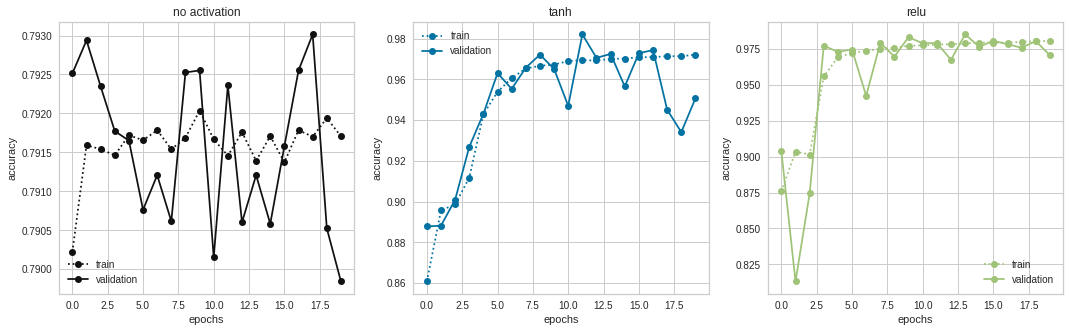

no activation: train accuracy = 0.7901060581207275
no activation: validate accuracy = 0.7898436784744263
no activation: test accuracy = 0.7880208492279053

tanh: train accuracy = 0.9505753517150879
tanh: validate accuracy = 0.9506400227546692
tanh: test accuracy = 0.9498683214187622

relu: train accuracy = 0.970753014087677
relu: validate accuracy = 0.9707274436950684
relu: test accuracy = 0.9704863429069519


In [ ]:
# Plot train, test and validation accuracies.
m_train_accuracy = history_m.history["accuracy"]
m_validation_accuracy = history_m.history["val_accuracy"]

mt_train_accuracy = history_mt.history["accuracy"]
mt_validation_accuracy = history_mt.history["val_accuracy"]

mr_train_accuracy = history_mr.history["accuracy"]
mr_validation_accuracy = history_mr.history["val_accuracy"]

epochs = range(20)

fig = plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.title("no activation")
plt.plot(epochs, m_train_accuracy, "ko:", label="train")
plt.plot(epochs, m_validation_accuracy, "ko-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(132)
plt.title("tanh")
plt.plot(epochs, mt_train_accuracy, "bo:", label="train")
plt.plot(epochs, mt_validation_accuracy, "bo-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(133)
plt.title("relu")
plt.plot(epochs, mr_train_accuracy, "go:", label="train")
plt.plot(epochs, mr_validation_accuracy, "go-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

print("no activation: train accuracy = {}".format(m_train_acc))
print("no activation: validate accuracy = {}".format(m_validate_acc))
print("no activation: test accuracy = {}\n".format(m_test_acc))

print("tanh: train accuracy = {}".format(mt_train_acc))
print("tanh: validate accuracy = {}".format(mt_validate_acc))
print("tanh: test accuracy = {}\n".format(mt_test_acc))

print("relu: train accuracy = {}".format(mr_train_acc))
print("relu: validate accuracy = {}".format(mr_validate_acc))
print("relu: test accuracy = {}".format(mr_test_acc))

|Performace Metrics|Model Architecture 1| Model Architecture 2|Model Architecture 3|
|---|---|---|---|
|<b>none train</b> accuracy|~ 0.767|~ 0.763|~ 0.790|
|<b>none validate</b> accuracy|~ 0.766|~ 0.762|~ 0.789|
|<b>none test</b> accuracy|~ 0.768|~ 0.764|~ 0.788|
|<hr>|<hr>|<hr>|<hr>|
|<b>sigmoid train</b> accuracy|~ 0.812|~ 0.784|n/a|
|<b>sigmoid validate</b> accuracy|~ 0.812|~ 0.783|n/a|
|<b>sigmoid test</b> accuracy|~ 0.814|~ 0.785|n/a|
|<hr>|<hr>|<hr>|<hr>|
|<b>tanh train</b> accuracy|~ 0.821|~ 0.822|~  0.950|
|<b>tanh validate</b> accuracy|~ 0.822|~ 0.822|~  0.950|
|<b>tanh test</b> accuracy|~ 0.823|~ 0.824|~  0.949|
|<hr>|<hr>|<hr>|<hr>|
|<b>relu train</b> accuracy|~ 0.818|~ 0.821|~ 0.970|
|<b>relu validate</b> accuracy|~ 0.819|~ 0.821|~ 0.970|
|<b>relu test</b> accuracy|~ 0.820|~ 0.823|~ 0.970|
|<hr>|<hr>|<hr>|<hr>|
|<b>data linear separation</b>|less|less|more|

<font color="blue"><b>OBSERVATION: </b></font>

*  All models perform better on data showing more (though not perfect) linear separation. Data still does not show enough linear separation for linear model to perform well but non-linear models (NNs with non-linear activation functions) perfom very goodclassification on given input data and target classes since they are less affected by lack of perfect linear separability of datapoints and since chosen features result in clear clusters w.r.t. chosen target attribute classes nevertheless.
* <b>Observations regarding NNs with no activation function:</b>

  * From the accuracy v/s epochs graph, it is clearly visible that this linear model overfits training data (validation line dips below training line often by large amounts even after several epochs) which is not as clearly apparent from the final accuracy scores alone. At the end of the previous section related to linear classifers, the observation was that under given scenario, linear classifers are able to generalize well to novel data. This observation is overruled as a result of latest observation from above graphs suggesting that linear classifers under given conditions and chosen dataset, do not genaralize well to novel data.
  * As epochs increase, the accuracy remains somewhat same. This means the linear model is unable to classify datapoints well and is likely underfitting the train validation and test sets.

* <b>Observations regarding NN with tanh activation function:</b>
  * As epochs increase, the accuracy across all 3 sets (train, validate, test) increase and final accuracy reports are ~ >0.90 which hints at good classification ability.
  * From the accuracy v/s epochs graph and final training, validation and testing set accuracy scores, it is evident that NN using tanh activation function is overfitting training data (validation line dips below training line from time to time by moderate amounts even after several epochs). So, it cannot be said with confidence that this model would genaralize well to new data as it is.

* <b>Observations regarding NN with relu activation function:</b>
  * As epochs increase, the accuracy across all 3 sets increase and final reported  accuracies are all ~ >0.95 which hints at best classification ability compared to other models tested here.
  * From the accuracy v/s epochs graph and final training, validation and testing set accuracy scores, it can be observed that NN using relu activation function shows lesser overfitting than the one using tanh/no activation function (validation line dips below training line occationaly by smaller amounts as epochs pass).

<font color="blue"><b>OBSERVATION: </b></font>

<b><i>Why was tanh better than sigmoid?</i></b>

* The sigmoid function has 2 associated problems. When inputs are farther away from 0, outputs are all either very close to 1 or to 0 meaning that difference between outputs in this case is very small. This means derivative of loss gradients of larger and smaller numbers will be very small and upon getting multiplied together during backpropagation will result in a number so small that it manages to induce only very small changes to weights. This is called the <b>vanishing gradients problem</b> and this leads to the neural network taking longer to converge on minimum loss/maximum accuracy. W.r.t. given inputs however, this may not be the primary problem since data has been normalized/standardized after reducing skewness. As a result, extreme values (negative or positive) are less prevalent. This is probably why despite tanh function also having the vanishing gradients problem, it is able to classify target attribute classes quite well using given inputs. (C.F.Wang, 2019)

* The other problem is that sigmoid function is <b>not centered around 0</b>.  Sigmoid outputs are in the range \[0,1\] resulting in derivative of loss being either all positive or all negative w.r.t. weights of connections to a neuron. This means that in scenarios where some weights would need to be increased and others decreased for optimum output of a neuron, no. of backpropagations needed to correct weights of all connections suitably will be more because all weights would first get, say increased,  which would mean that while the weights that needed to be increased get tweaked for the better, the ones that were to be decresed now need to be decreased futher and this can only happen in subsequent backpropagations when all weights are decreased. This zig zag increase/decrease of all weights in 1 direction (positive/negative) at a time, requires more no. of backpropagations before all weights have optimal values. With the tanh function, one does not face this problem as it is centered around 0. This is likely why the tanh function with an output range \[-1,1\] despite also having the vanishing gradients problem, converges on near optimal values after 20 epochs. The sigmoid function in addition to learning slower due to gradients and thereby weight updates being smaller, also require more no. of backpropagations. Together these problems have led to the NN using sigmoid activation function performing worse than the one using tanh activaiton function as observed above. (R.Varma, no date)

<font color="blue"><b>OBSERVATION: </b></font> Sigmoid function may perform better if the learning rate is increased forcing it to make bigger changes to the weights.

In [ ]:
 # SIGMOID with greater Learning Rate (0.05)
ms2 = keras.models.Sequential([
    keras.layers.Dense(units=2, activation='sigmoid'),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=10, activation='sigmoid'),
    keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
ms2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ms2 = ms2.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_validate, y_validate))
ms2_train_loss, ms2_train_acc = ms2.evaluate(X_train,  y_train, verbose=1)
ms2_validate_loss, ms2_validate_acc = ms2.evaluate(X_validate,  y_validate, verbose=1)
ms2_test_loss, ms2_test_acc = ms2.evaluate(X_test,  y_test, verbose=1)

Epoch 1/10
4859/4859 [==============================] - 14s 3ms/step - loss: 0.6923 - accuracy: 0.5188 - val_loss: 0.6869 - val_accuracy: 0.7769
Epoch 2/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.5623 - accuracy: 0.7445 - val_loss: 0.4034 - val_accuracy: 0.8352
Epoch 3/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.2891 - accuracy: 0.8738 - val_loss: 0.2278 - val_accuracy: 0.8916
Epoch 4/10
4859/4859 [==============================] - 13s 3ms/step - loss: 0.2171 - accuracy: 0.8893 - val_loss: 0.2072 - val_accuracy: 0.8899
Epoch 5/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.2098 - accuracy: 0.8900 - val_loss: 0.2422 - val_accuracy: 0.8674
Epoch 6/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.2083 - accuracy: 0.8902 - val_loss: 0.2471 - val_accuracy: 0.8624
Epoch 7/10
4859/4859 [==============================] - 18s 4ms/step - loss: 0.2078 - accuracy: 0.8904 - val_loss: 0.2017 - val_ac

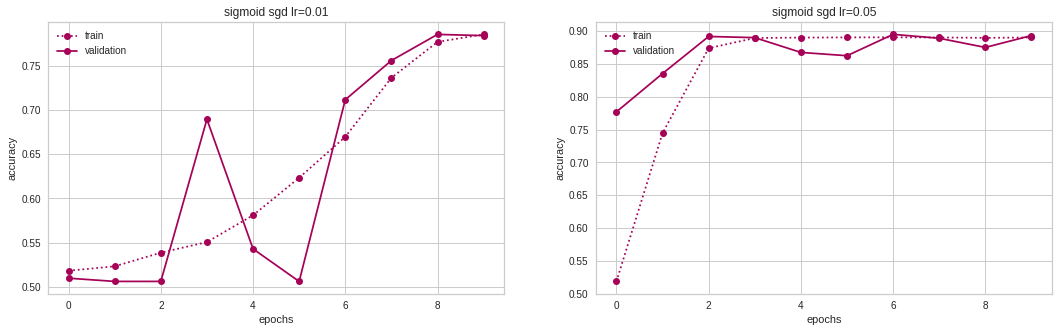

sigmoid sgd lr=0.01: train accuracy = 0.784696638584137
sigmoid sgd lr=0.01: validate accuracy = 0.7839711904525757
sigmoid sgd lr=0.01: test accuracy = 0.7854255437850952
sigmoid sgd lr=0.05: train accuracy = 0.8925380706787109
sigmoid sgd lr=0.05: validate accuracy = 0.8930726051330566
sigmoid sgd lr=0.05: test accuracy = 0.8920470476150513



In [ ]:
# SIGMOID (SGD lr=0.01) VS SIGMOID (SGD lr=0.05)
ms2_train_accuracy = history_ms2.history["accuracy"]
ms2_validation_accuracy = history_ms2.history["val_accuracy"]
ms_train_accuracy = history_ms.history["accuracy"]
ms_validation_accuracy = history_ms.history["val_accuracy"]

epochs = range(10)

fig = plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.title("sigmoid sgd lr=0.01")
plt.plot(epochs, ms_train_accuracy, "mo:", label="train")
plt.plot(epochs, ms_validation_accuracy, "mo-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(122)
plt.title("sigmoid sgd lr=0.05")
plt.plot(epochs, ms2_train_accuracy, "mo:", label="train")
plt.plot(epochs, ms2_validation_accuracy, "mo-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

print("sigmoid sgd lr=0.01: train accuracy = {}".format(ms_train_acc))
print("sigmoid sgd lr=0.01: validate accuracy = {}".format(ms_validate_acc))
print("sigmoid sgd lr=0.01: test accuracy = {}".format(ms_test_acc))
print("sigmoid sgd lr=0.05: train accuracy = {}".format(ms2_train_acc))
print("sigmoid sgd lr=0.05: validate accuracy = {}".format(ms2_validate_acc))
print("sigmoid sgd lr=0.05: test accuracy = {}\n".format(ms2_test_acc))

<font color="blue"><b>OBSERVATION: </b></font> As expected, NN using sigmoid function with higher learning rate of 0.05 achives much better accuracy with lesser overfitting than one using sigmoid function with learning rate 0.01. This leads one to believe that other activation functions used here may also benefit from a slight increase in learning rate.

<font color="blue"><b>OBSERVATION: </b></font>

<b><i>Why was relu better than tanh?</i></b>

* NN models using relu activation function is known to almost always perform just as well, often better than ones using tanh activation function. This is likely because Relu does not have the vanishing gradients problem and it has no upper limit on its output thus leading to bigger derivatives of gradients leading to bigger weight update and thereby faster learning. 
* The only problems that relu functions have are as follows:
  * Relu is also not centered around zero.
  * Often the bigger issue with relu is that of <b>dead neurons</b>. This problem arises because any negative inputs/preactivation values when passed to relu function results in an ouput of 0. This leads to weights associated with corresponding neurons not getting updated and the neuron thus not contributing (is dead) to the learning of the neural net. In this dataset, given selected features, many values are negative. This means chances of dead neurons is more. (Keras, 2020)

<font color="blue"><b>OBSERVATION: </b></font> Using  Leaky relu which is a version of relu that takes measures against the dead neurons issue by ensuring that output is never exactly 0 for numbers <= 0. This is done by setting output of all numbers <=0 to a small fraction (alpha) of the input value, instead of 0. Using leaky relu instead of traditional relu may make performace of associated ANN better. 

In [ ]:
# LEAKY RELU
leaky_relu = keras.layers.LeakyReLU(alpha=0.01)
mlr = keras.models.Sequential([
    keras.layers.Dense(units=2, activation=leaky_relu),
    keras.layers.Dense(units=15, activation=leaky_relu),
    keras.layers.Dense(units=10, activation=leaky_relu),
    keras.layers.Dense(units=15, activation=leaky_relu),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
mlr.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mlr = mlr.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_validate, y_validate))
mlr_train_loss, mlr_train_acc = mlr.evaluate(X_train,  y_train, verbose=1)
mlr_validate_loss, mlr_validate_acc = mlr.evaluate(X_validate,  y_validate, verbose=1)
mlr_test_loss, mlr_test_acc = mlr.evaluate(X_test,  y_test, verbose=1)

Epoch 1/20
4859/4859 [==============================] - 21s 4ms/step - loss: 0.3608 - accuracy: 0.8495 - val_loss: 0.2589 - val_accuracy: 0.9010
Epoch 2/20
4859/4859 [==============================] - 20s 4ms/step - loss: 0.2426 - accuracy: 0.9012 - val_loss: 0.2345 - val_accuracy: 0.8991
Epoch 3/20
4859/4859 [==============================] - 17s 4ms/step - loss: 0.2125 - accuracy: 0.9031 - val_loss: 0.2066 - val_accuracy: 0.8996
Epoch 4/20
4859/4859 [==============================] - 16s 3ms/step - loss: 0.1704 - accuracy: 0.9206 - val_loss: 0.1442 - val_accuracy: 0.9192
Epoch 5/20
4859/4859 [==============================] - 21s 4ms/step - loss: 0.1449 - accuracy: 0.9359 - val_loss: 0.5428 - val_accuracy: 0.9049
Epoch 6/20
4859/4859 [==============================] - 15s 3ms/step - loss: 0.1292 - accuracy: 0.9420 - val_loss: 0.1593 - val_accuracy: 0.9297
Epoch 7/20
4859/4859 [==============================] - 19s 4ms/step - loss: 0.1118 - accuracy: 0.9500 - val_loss: 0.1815 - val_ac

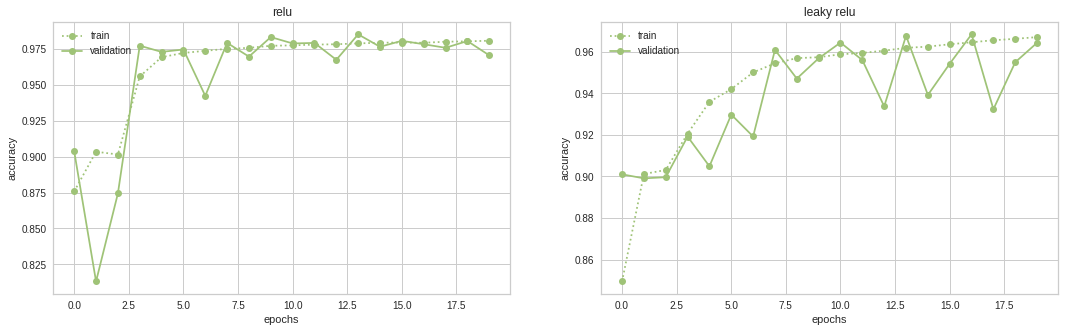

leaky relu: train accuracy = 0.9638898968696594
leaky relu: validate accuracy = 0.9643210768699646
leaky relu: test accuracy = 0.9634721875190735

relu: train accuracy = 0.970753014087677
relu: validate accuracy = 0.9707274436950684
relu: test accuracy = 0.9704863429069519



In [ ]:
# LEAKY RELU v/s RELU 
mr_train_accuracy = history_mr.history["accuracy"]
mr_validation_accuracy = history_mr.history["val_accuracy"]
mlr_train_accuracy = history_mlr.history["accuracy"]
mlr_validation_accuracy = history_mlr.history["val_accuracy"]

epochs = range(20)

fig = plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.title("relu")
plt.plot(epochs, mr_train_accuracy, "go:", label="train")
plt.plot(epochs, mr_validation_accuracy, "go-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(122)
plt.title("leaky relu")
plt.plot(epochs, mlr_train_accuracy, "go:", label="train")
plt.plot(epochs, mlr_validation_accuracy, "go-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

print("leaky relu: train accuracy = {}".format(mlr_train_acc))
print("leaky relu: validate accuracy = {}".format(mlr_validate_acc))
print("leaky relu: test accuracy = {}\n".format(mlr_test_acc))
print("relu: train accuracy = {}".format(mr_train_acc))
print("relu: validate accuracy = {}".format(mr_validate_acc))
print("relu: test accuracy = {}\n".format(mr_test_acc))

<font color="blue"><b>OBSERVATION: </b></font> Using only leaky relu as activation function of an NN led to worse performance than when only relu was used. This may be because Leaky Relu while avoiding the dead neuron problem would reintroduce the vanishing gradients problem because it multiplies all small inputs with a small number (alpha) like 0.01. It can be concluded that here, best option would be to build a model that uses a combination of both relu and leaky relu with most layers using relu activation and few using leaky relu since here the vanishing gradients problem is likely slightly bigger than the dead neurons problem.

<font color="blue"><b>OBSERVATION: </b></font> Dropout is a famous technique to combat overfitting which invovles randomly selecting and disabling/dropping some neurons to force the NN to learn new paths. Dropout can however reduce fitting so much so that overall accuracy suffers. So it must be used carefully and in moderation. The following cell shall see if adding a dropout layer can make a NN model using both relu and leaky relu show good accuracy with less overfitting. (J. Brownlee, 2016)

In [ ]:
# IMPROVED RELU NN
leaky_relu = keras.layers.LeakyReLU(alpha=0.01)
mir = keras.models.Sequential([
    keras.layers.Dense(units=2, activation=leaky_relu),
    keras.layers.Dense(units=15, activation=leaky_relu),
    keras.layers.Dropout(rate=0.1, seed=23, input_shape=(15,)), # added dropout
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
mir.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mir = mir.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_validate, y_validate))
mir_train_loss, mir_train_acc = mir.evaluate(X_train,  y_train, verbose=1)
mir_validate_loss, mir_validate_acc = mir.evaluate(X_validate,  y_validate, verbose=1)
mir_test_loss, mir_test_acc = mir.evaluate(X_test,  y_test, verbose=1)

Epoch 1/20
4859/4859 [==============================] - 19s 4ms/step - loss: 0.4256 - accuracy: 0.8304 - val_loss: 0.2055 - val_accuracy: 0.9035
Epoch 2/20
4859/4859 [==============================] - 15s 3ms/step - loss: 0.1492 - accuracy: 0.9336 - val_loss: 0.1208 - val_accuracy: 0.9438
Epoch 3/20
4859/4859 [==============================] - 19s 4ms/step - loss: 0.1134 - accuracy: 0.9492 - val_loss: 0.0986 - val_accuracy: 0.9567
Epoch 4/20
4859/4859 [==============================] - 20s 4ms/step - loss: 0.0950 - accuracy: 0.9589 - val_loss: 0.0756 - val_accuracy: 0.9665
Epoch 5/20
4859/4859 [==============================] - 15s 3ms/step - loss: 0.0841 - accuracy: 0.9647 - val_loss: 0.1380 - val_accuracy: 0.9492
Epoch 6/20
4859/4859 [==============================] - 15s 3ms/step - loss: 0.0806 - accuracy: 0.9661 - val_loss: 0.0647 - val_accuracy: 0.9717
Epoch 7/20
4859/4859 [==============================] - 15s 3ms/step - loss: 0.0772 - accuracy: 0.9679 - val_loss: 0.0840 - val_ac

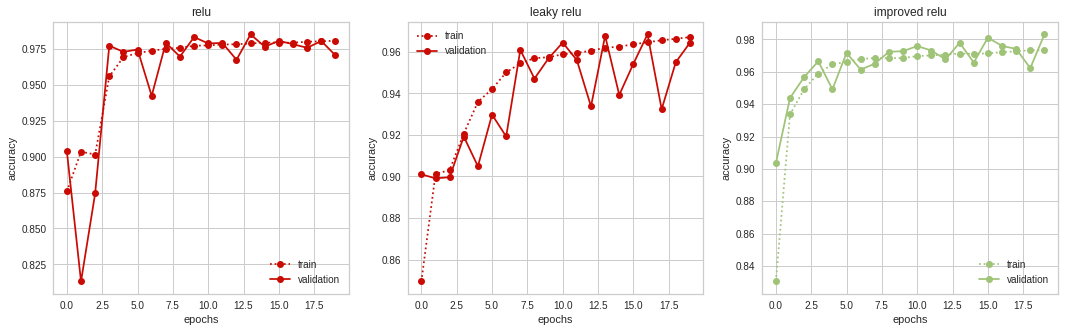

leaky relu: train accuracy = 0.9638898968696594
leaky relu: validate accuracy = 0.9643210768699646
leaky relu: test accuracy = 0.9634721875190735

relu: train accuracy = 0.970753014087677
relu: validate accuracy = 0.9707274436950684
relu: test accuracy = 0.9704863429069519

improved relu: train accuracy = 0.9833600521087646
improved relu: validate accuracy = 0.9831736087799072
improved relu: test accuracy = 0.9824307560920715


In [ ]:
# RELU v/s LEAKY RELU v/s IMPROVED RELU NN
mr_train_accuracy = history_mr.history["accuracy"]
mr_validation_accuracy = history_mr.history["val_accuracy"]
mlr_train_accuracy = history_mlr.history["accuracy"]
mlr_validation_accuracy = history_mlr.history["val_accuracy"]
mir_train_accuracy = history_mir.history["accuracy"]
mir_validation_accuracy = history_mir.history["val_accuracy"]

epochs = range(20)

fig = plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.title("relu")
plt.plot(epochs, mr_train_accuracy, "ro:", label="train")
plt.plot(epochs, mr_validation_accuracy, "ro-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(132)
plt.title("leaky relu")
plt.plot(epochs, mlr_train_accuracy, "ro:", label="train")
plt.plot(epochs, mlr_validation_accuracy, "ro-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.subplot(133)
plt.title("improved relu")
plt.plot(epochs, mir_train_accuracy, "go:", label="train")
plt.plot(epochs, mir_validation_accuracy, "go-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

print("leaky relu: train accuracy = {}".format(mlr_train_acc))
print("leaky relu: validate accuracy = {}".format(mlr_validate_acc))
print("leaky relu: test accuracy = {}\n".format(mlr_test_acc))
print("relu: train accuracy = {}".format(mr_train_acc))
print("relu: validate accuracy = {}".format(mr_validate_acc))
print("relu: test accuracy = {}\n".format(mr_test_acc))
print("improved relu: train accuracy = {}".format(mir_train_acc))
print("improved relu: validate accuracy = {}".format(mir_validate_acc))
print("improved relu: test accuracy = {}".format(mir_test_acc))

<font color="blue"><b>OBSERVATION: </b></font> The NN using both relu and leaky relu activation function with an added dropout layer does indeed show superior performance w.r.t. increased classification accuracy and decreased overfitting compared to all other models previously tested.

## 10.2. Convolutional Neural Networks (CNNs)
(S. Saha, 2018)

### 10.2.1. Preparing Data For CNN

While CNNs can be applied to numeric data, it is commonly used when images are input. This dataset contains only numeric data. Here, 16 features are selected. 5 of them are known from previous parts, to aid in predicting "Hillshade_Avg_Y" classes. But the collective usefulness of the other features w.r.t. predicting target variable classes is unknown and thus represent the uncertain/noisy features often found in images that may or may not be useful for classificatoin. For each data instance, values from these 16 features shall be converted into a 4x4 matrix that can act like a very unrealistically small 4x4 image just to serve the perpose of this experiment with CNNs and to make up for the lack of images in this dataset.

In [ ]:
from PIL import Image

In [ ]:
# (Jerry, 2014)
def range_convert(old_value, old_min, old_max, new_min=0, new_max=255): 
  ''' Converts given number to equivalent number between a new range ([0, 255] by default). '''
  return ((old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

In [ ]:
X = DF.drop([
             "Hillshade_Avg_Y",
              "Hillshade_Avg",
              "Hillshade_Noon",
              "Hillshade_9am",
              "Hillshade_3pm",
             "Slope_Class",
             "Geologic_Zone"
              ], axis=1)
X = X.reset_index(drop=True)
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
y = DF[[target]]
y = y.reset_index(drop=True)

In [ ]:
display(X.head(3))
display(y.head(3))
print(len(X_train.columns))

Vertical_Distance_To_Hydrology  ...  Wilderness_Area_Y
0                       -0.020697  ...           0.954861
1                        0.103315  ...           0.954861
2                       -0.115525  ...           0.954861

[3 rows x 16 columns]

Hillshade_Avg_Y
0                1
1                1
2                1

2


In [ ]:
matrix_size = 4
column_names = np.array_split(X.columns, matrix_size)
Xmin = min(np.array(X).flatten())
Xmax = max(np.array(X).flatten())
X_imgs = []
for index, row in X.iterrows():
    img = []
    for i in range(len(column_names)):
        img.append([range_convert(row[name], old_min=Xmin, old_max=Xmax) for name in column_names[i]])
    X_imgs.append(img)
X_imgs = np.array(X_imgs)
print(X_imgs.shape)

(414586, 4, 4)


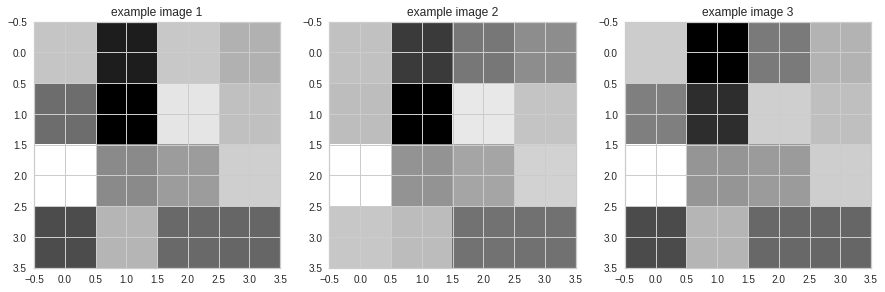

In [ ]:
example_imgs = X_imgs[:3]
fig = plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("example image 1")
plt.imshow(example_imgs[0])
plt.subplot(132)
plt.title("example image 2")
plt.imshow(example_imgs[1])
plt.subplot(133)
plt.title("example image 3")
plt.imshow(example_imgs[2])
plt.show()

### 10.2.2. Experiments With CNN

In [ ]:
Xcnn = X_imgs
ycnn = y
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(Xcnn, ycnn, test_size = 0.25, random_state = 23, stratify=y) 
Xcnn_train, Xcnn_validate, ycnn_train, ycnn_validate = train_test_split(Xcnn_train, ycnn_train, test_size = 0.5, random_state = 23)
print(Xcnn_train.shape, Xcnn_validate.shape, Xcnn_test.shape)
print(ycnn_train.shape, ycnn_validate.shape, ycnn_test.shape)

(155469, 4, 4) (155470, 4, 4) (103647, 4, 4)
(155469, 1) (155470, 1) (103647, 1)


In [ ]:
Xcnn_train = Xcnn_train.reshape( Xcnn_train.shape[0], Xcnn_train.shape[1], Xcnn_train.shape[2], 1) # (N, H, W, C)
Xcnn_validate = Xcnn_validate.reshape(Xcnn_validate.shape[0], Xcnn_validate.shape[1], Xcnn_validate.shape[2], 1)
Xcnn_test = Xcnn_test.reshape(Xcnn_test.shape[0], Xcnn_test.shape[1], Xcnn_test.shape[2], 1)
print(Xcnn_train.shape, Xcnn_validate.shape, Xcnn_test.shape)
print(ycnn_train.shape, ycnn_validate.shape, ycnn_test.shape)

(155469, 4, 4, 1) (155470, 4, 4, 1) (103647, 4, 4, 1)
(155469, 1) (155470, 1) (103647, 1)


<b><i>Note:</i></b> In following experiments, adam optimizer shall be used instead of sgd to try out a different optimizer and since it has been shown to perform just as good if not better than sgd in most cases. (S.Park, 2021)

<b><u>CNN Architecture 1</u></b>

The formula used to calulate the output feature map dimension of each layer is <b><i>(((n+2p-f)/s)+1) \* (((n+2p-f)/s)+1) \* no. of filters</i></b> where n = input image/filter width/height, f = kernel width/height, s = stride and p=padding. (Aarohi, 2020)

|Layer Name|Layer Type|Filters|Output Size|Kernel Size|Stride|Padding|Activation|
|---|---|---|---|---|---|---|---|
|Input|Image|1|4x4x1|n/a|n/a|n/a|n/a|
|1|CV|8|4x4x8|1x1|1|0|relu|
|2|<b>MP</b>|8|2x2x8|2x2|2|0|n/a|
|3|CV|16|2x2x16|1x1|1|0|relu|
|4|FC|n/a|64|n/a|n/a|n/a|relu|
|Output|FC|n/a|2|n/a|n/a|n/a|softmax|

Optimizer = adam
loss = sparse categorical cross entropy
metrics = accuracy

Epoch 1/20
4859/4859 [==============================] - 17s 3ms/step - loss: 0.7093 - accuracy: 0.5195 - val_loss: 0.6878 - val_accuracy: 0.5247
Epoch 2/20
4859/4859 [==============================] - 16s 3ms/step - loss: 0.6858 - accuracy: 0.5380 - val_loss: 0.6835 - val_accuracy: 0.5473
Epoch 3/20
4859/4859 [==============================] - 16s 3ms/step - loss: 0.6822 - accuracy: 0.5534 - val_loss: 0.6821 - val_accuracy: 0.5462
Epoch 4/20
4859/4859 [==============================] - 21s 4ms/step - loss: 0.6766 - accuracy: 0.5726 - val_loss: 0.6743 - val_accuracy: 0.5827
Epoch 5/20
4859/4859 [==============================] - 22s 4ms/step - loss: 0.6729 - accuracy: 0.5832 - val_loss: 0.6694 - val_accuracy: 0.5882
Epoch 6/20
4859/4859 [==============================] - 21s 4ms/step - loss: 0.6708 - accuracy: 0.5859 - val_loss: 0.6692 - val_accuracy: 0.5862
Epoch 7/20
4859/4859 [==============================] - 17s 3ms/step - loss: 0.6690 - accuracy: 0.5893 - val_loss: 0.6661 - val_ac

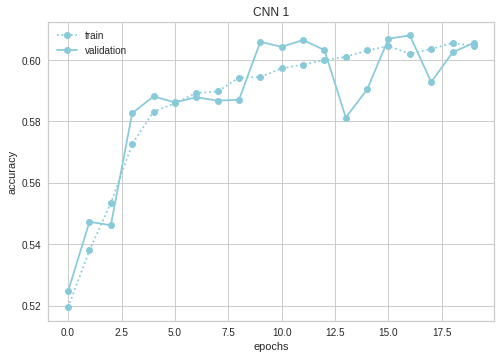

cnn: train accuracy = 0.6066482663154602
cnn: validate accuracy = 0.6056538224220276
cnn: test accuracy = 0.6067131757736206



In [ ]:
mcnn1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=8, kernel_size=(1,1), strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
mcnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mcnn1 = mcnn1.fit(x=Xcnn_train, y=ycnn_train, epochs=20, validation_data=(Xcnn_validate, ycnn_validate))
mcnn1.summary()

mcnn1_train_accuracy = history_mcnn1.history["accuracy"]
mcnn1_validation_accuracy = history_mcnn1.history["val_accuracy"]
mcnn1_train_loss, mcnn1_train_acc = mcnn1.evaluate(Xcnn_train,  ycnn_train, verbose=1)
print('\nCNN model test accuracy:', mcnn1_train_acc)
mcnn1_validate_loss, mcnn1_validate_acc = mcnn1.evaluate(Xcnn_validate,  ycnn_validate, verbose=1)
print('\nCNN model validate accuracy:', mcnn1_validate_acc)
mcnn1_test_loss, mcnn1_test_acc = mcnn1.evaluate(Xcnn_test,  ycnn_test, verbose=1)
print('\nCNN model test accuracy:', mcnn1_test_acc)

epochs = range(20)

plt.title("CNN 1")
plt.plot(epochs, mcnn1_train_accuracy, "co:", label="train")
plt.plot(epochs, mcnn1_validation_accuracy, "co-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

print("cnn: train accuracy = {}".format(mcnn1_train_acc))
print("cnn: validate accuracy = {}".format(mcnn1_validate_acc))
print("cnn: test accuracy = {}\n".format(mcnn1_test_acc))

<b><u>CNN Architecture 2</u></b>

|Layer Name|Layer Type|Filters|Output Size|Kernel Size|Stride|Padding|Activation|
|---|---|---|---|---|---|---|---|
|Input|Image|1|4x4x1|n/a|n/a|n/a|n/a|
|1|CV|8|4x4x8|<b>2x2</b>|1|0|relu|
|2|CV|16|3x3x16|1x1|1|0|relu|
|3|FC|n/a|<b>144</b>|n/a|n/a|n/a|relu|
|Output|FC|n/a|2|n/a|n/a|n/a|softmax|

Oprimizer = adam
loss = sparse categorical cross entropy
metrics = accuracy

Epoch 1/20
4859/4859 [==============================] - 21s 4ms/step - loss: 0.2704 - accuracy: 0.8778 - val_loss: 0.1601 - val_accuracy: 0.9335
Epoch 2/20
4859/4859 [==============================] - 24s 5ms/step - loss: 0.1513 - accuracy: 0.9345 - val_loss: 0.1309 - val_accuracy: 0.9525
Epoch 3/20
4859/4859 [==============================] - 24s 5ms/step - loss: 0.1271 - accuracy: 0.9456 - val_loss: 0.1181 - val_accuracy: 0.9468
Epoch 4/20
4859/4859 [==============================] - 19s 4ms/step - loss: 0.1099 - accuracy: 0.9538 - val_loss: 0.1285 - val_accuracy: 0.9396
Epoch 5/20
4859/4859 [==============================] - 24s 5ms/step - loss: 0.1041 - accuracy: 0.9562 - val_loss: 0.0851 - val_accuracy: 0.9657
Epoch 6/20
4859/4859 [==============================] - 19s 4ms/step - loss: 0.0967 - accuracy: 0.9593 - val_loss: 0.0853 - val_accuracy: 0.9649
Epoch 7/20
4859/4859 [==============================] - 20s 4ms/step - loss: 0.0976 - accuracy: 0.9586 - val_loss: 0.0904 - val_ac

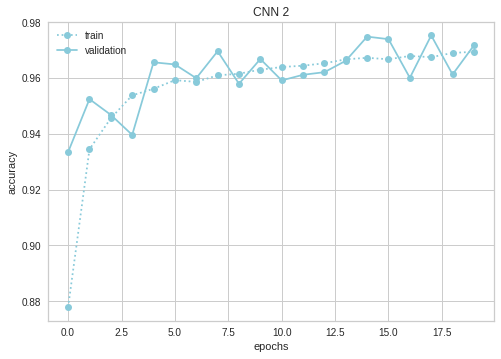

cnn2: train accuracy = 0.9736474752426147
cnn2: validate accuracy = 0.9717373251914978
cnn2: test accuracy = 0.9719432592391968



In [ ]:
mcnn2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(144, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
mcnn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mcnn2 = mcnn2.fit(x=Xcnn_train, y=ycnn_train, epochs=20, validation_data=(Xcnn_validate, ycnn_validate))
mcnn2.summary()

mcnn2_train_accuracy = history_mcnn2.history["accuracy"]
mcnn2_validation_accuracy = history_mcnn2.history["val_accuracy"]
mcnn2_train_loss, mcnn2_train_acc = mcnn2.evaluate(Xcnn_train,  ycnn_train, verbose=1)
print('\nCNN model test accuracy:', mcnn2_train_acc)
mcnn2_validate_loss, mcnn2_validate_acc = mcnn2.evaluate(Xcnn_validate,  ycnn_validate, verbose=1)
print('\nCNN model validate accuracy:', mcnn2_validate_acc)
mcnn2_test_loss, mcnn2_test_acc = mcnn2.evaluate(Xcnn_test,  ycnn_test, verbose=1)
print('\nCNN model test accuracy:', mcnn2_test_acc)

epochs = range(20)

plt.title("CNN 2")
plt.plot(epochs, mcnn2_train_accuracy, "co:", label="train")
plt.plot(epochs, mcnn2_validation_accuracy, "co-", label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

print("cnn2: train accuracy = {}".format(mcnn2_train_acc))
print("cnn2: validate accuracy = {}".format(mcnn2_validate_acc))
print("cnn2: test accuracy = {}\n".format(mcnn2_test_acc))

|Performace Metrics|Improved Relu NN|CNN Architecture 1|CNN Architecture 2|
|---|---|---|---|
|<b>train</b> accuracy|~ 0.983|~ 0.606|~ 0.973|
|<b>validate</b> accuracy|~ 0.983|~ 0.605|~ 0.971|
|<b>test</b> accuracy|~ 0.982|~ 0.606|~ 0.971|

<font color="blue"><b>OBSERVATION: </b></font>

* CCN with max pooling does poorly compared to other models. This is likely because when working with very small inputs like this one which is only 4x4, there is no need to reduce intermediate feature maps using Max Pooling (MP). Max pooling is often done to reduce input size to subsequent layers. In the process, MP results in loss of detail/identified features. In this scenario max pooling would select maximum value out of every 2x2 matrix that makes up each of 8 identified 4x4 feature maps thus leading to the loss of detail that was represented by the 3 values < max value from each 2x2 part of the original feature maps. Also, this leads to a reduction in size of input to the next layer from 4x4x8 to 2x2x8 thereby reducing possible no. of features that can be identified. This loss in detail and reduced opportunity for identification of more features is what leads to loss in accuracy. 
* The CNN without an MP layer show better performance of ~ > 0.95 accuracy with little overfitting. This improved CNN is likely to genaralize to novel data better than the previous version.
* The better CNN model above is still less accurate than the best ANN obtained (using combination of rel and leaky relu as activation functions with added dropout layer). This is likely because of the model getting confused by added noisy features that were used to create the 4x4 matrix input.
* It can be concluded that with numeric data sets like this one where the most useful features have already been identified using statistical (calculating correlation) and experimental (ablation tests) methods, it is wiser to use best identified features with an ANN having enough layers and neurons for classification than going for a CNN model.

# Conclusion
This project contains a comprehensive exploration of various Data Science techniques and experiments conducted using various Machine Learning (ML) algorithms on a large real world dataset. This portfolio began with EDA and data processing which prepared the data for ML algorithms. Suitable class attributes and features were determined based on inferences made. Several ML algorithms (naive bayes classifiers, hard/soft clustering algorithms, decision trees, neural networks) were then applied to perform classification and clustering. Problems with each method and solutions for the same have been discussed and demonstrated. All observations have been documented in blue. 

# References
* <b>A:</b>
    * Aarohi, Code With Aarohi. (2020) <i>AlexNet Explained Step by Step</i>, YouTube Video, [URL](https://www.youtube.com/watch?v=EmFnW6fYyYY&t=1168s). \[Last Accessed: 26 Nov 2021\]
    * Abhishek Barai. (2020) <i>Normal Distribution and Machine Learning</i> [URL](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070). \[Last Accessed: 12 October 2021\]
    * Aishwarya Singh. (2019) 'Build Better and Accurate Clusters with Gaussian Mixture Models' [URL](https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/). \[Last Accessed: 5 Nov 2021\]
    * Anderson David R, Sweeney, Dennis J, Williams Thomas A. (2020) <i>statistics</b>, Encyclopedia Britannica [URL](https://www.britannica.com/science/statistics). \[Last Accessed: 2 Oct 2021\]
    * ArcGIS Pro 2.8. (no date) <i>How Density-based Clustering works</i> [URL](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-density-based-clustering-works.htm). \[Last Accessed: 3 Nov 2021\]
    * Ashutosh Bhardwaj. (2020) <i>Silhouette Coefficient</i> [URL](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c). \[Last Accessed: 10 Nov 2021\]
   
* <b>C:</b>
    * Carleton AI Society. (2021) <i>CAIS Presents Clustering (Kmeans Vs. Gaussian Mixture Models) Lecture</i> [URL](https://www.youtube.com/watch?v=4FG0TWJRRPI). \[Last Accessed: 3 Nov 2021\]
    * Chi-Feng Wang. (2019) <i>The Vanishing Gradient Problem</i>, [URL](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484). \[Last Accessed: 26 Nov 2021\]
    * Crawford Scott. (2014) <i>Interval vs Ratio Data</i>, YouTube Video [URL](https://www.youtube.com/watch?v=goamUEWUyKY). \[Last Accessed: 5 Oct 2021\]
    
* <b>D:</b>
    * Das Sukamal. (2020) 
        * <i>Handling Outliers</i>, YouTube Video [URL](https://www.youtube.com/watch?v=T-ubh8EWpTg). \[Last Accessed: 1 Oct 2021\]
        * <i>Handling Categorical Data</i>, YouTube Video [URL](https://www.youtube.com/watch?v=cPr7yTKCQiI&t=2s). \[Last Accessed: 1 Oct 2021\]
    
* <b>F:</b>
    * Frost Jim. (no date), 
        * <i>Using Histograms to Understand Your Data</i> [URL](https://statisticsbyjim.com/basics/histograms/). \[Last Accessed: 30 Sep 2021\]
        * <i>Independent and Dependent Variables</i>, "Statistics By Jim" [URL](https://statisticsbyjim.com/regression/independent-dependent-variables/). \[Last Accessed: 5 Oct 2021\]
    
* <b>G:</b>
    * Geeks For Geeks. (2021) <i>Calinski-Harabasz Index – Cluster Validity indices | Set 3</i> [URL](https://www.geeksforgeeks.org/calinski-harabasz-index-cluster-validity-indices-set-3/). \[Last Accessed: 10 Nov 2021\]
    * geography.hunter, jochen, cuny.edu. (no date) <i>Hillshade</i>, gtech361, lecture11 [URL](http://www.geography.hunter.cuny.edu/~jochen/gtech361/lectures/lecture11/concepts/hillshade.htm). \[Last Accessed: 25 September 2021\]
    * GISGeography. (2021) <i>What is an Aspect Map?</i> [URL](https://gisgeography.com/aspect-map/). \[Last Accessed: 29 Sep 2021\]
    * Goyal Chirag. (2021) <i>Why You Shouldn’t Just Delete Outliers</i>, May 16 [URL](https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/). \[Last Accessed: 1 Oct 2021\]
    
* <b>H:</b>
    * Haitian Wei. (2020) <i>How to measure clustering performances when there are no ground truth?</i> [URL](https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c). \[Last Accessed: 10 Nov 2021\]

* <b>J:</b>
    * Jason Brownlee. (2016) 
      * <i>Overfitting and Underfitting With Machine Learning Algorithms</i> [URL](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/). \[Last Accessed: 25 November 2021\]
      * <i>Dropout Regularization in Deep Learning Models With Keras</i> [URL](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). \[Last Accessed: 27 November 2021\]
    * Jason Brownlee. (2018) <i>How to Configure the Number of Layers and Nodes in a Neural Network</i>, [URL](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/). \[Last Accessed: 26 Nov 2021\]
    * Jake Hoare. (no date) <i>What is a Random Forest?</i> [URL](https://www.displayr.com/what-is-a-random-forest/). \[Last Accessed: 16 Nov 2021\]
    * Jeff Hale. (2019) <i>Scale, Standardize, or Normalize with Scikit-Learn</i>, towards data science [URL](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler%20standardizes%20a%20feature%20by,values%20by%20the%20standard%20deviation.&text=StandardScaler%20makes%20the%20mean%20of,be%20between%20%2D1%20and%201). \[Last Accessed: 1 Nov 2021\]
    * Jerry JVL. (2014) <i>Convert a number range to another range, maintaining ratio</i>, Stack Overflow [URL](https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio). \[Last Accessed: 26 Nov 2021\]
    * Josh Thompson. (2019) <i>Choosing the Right Clustering Algorithm for your Dataset</i>, Digital Vidya, [URL](https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html). \[Last Accessed: 3 Nov 2021\]
    * Jost Starmer, StatQuest. (2021) <i>CART - Classification And Regression Trees Playlist</i>, YouTube Video Playlist, [URL](https://www.youtube.com/watch?v=_L39rN6gz7Y&list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH). \[Last Accessed: 12 Nov 2021\]
    
* <b>K:</b>
    * Keras. (2020) <i>What is the Dying ReLU problem in Neural Networks?</i>, [URL](https://androidkt.com/what-is-the-dying-relu-problem-in-neural-networks/). \[Last Accessed: 26 Nov 2021\]
    * Khyati Mahendru. (2019) <i>How to Determine the Optimal K for K-Means?</i>, Analytics Vidhya, [URL](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). \[Last Accessed: 6 Nov 2021\]
    * Krish Naik. (2019) <i>Silhouette (clustering)- Validating Clustering Models- Unsupervised Machine Learning</i>, YouTube video [URL](https://www.youtube.com/watch?v=DpRPd274-0E). \[Last Accessed: 3 Nov 2021\]
    * Krish Naik. (2020) <i>How To Perform Post Pruning In Decision Tree? Prevent Overfitting- Data Science</i>, YouTube video [URL](https://www.youtube.com/watch?v=SLOyyFHbiqo). \[Last Accessed: 14 Nov 2021\]
* <b>L:</b>
    * Learning Monkey. (2020) <i>Understanding Nervous System for Neural Networks || Lesson 1 ||Deep Learning || Learning Monkey ||</i>, Abstract [URL](https://www.youtube.com/watch?v=P3yfgV3hL2M&list=PLAoF4o7zqskTBdfRT4MD1aXis5iO2reXt). \[Last Accessed: 25 Nov 2021\]
* <b>M:</b>
    * Manish Pathak. (2020) <i>Quick Guide to Evaluation Metrics for Supervised and Unsupervised Machine Learning</i>, Analytics Vidhya, [URL](https://www.analyticsvidhya.com/blog/2020/10/quick-guide-to-evaluation-metrics-for-supervised-and-unsupervised-machine-learning/). \[Last Accessed: 10 Nov 2021\]
    * Merriam-Webster.com, Dictionary. (no date) <i>Azimuth</i>. [URL](https://www.merriam-webster.com/dictionary/azimuth). \[Last Accessed: 25 Sep 2021\]
    
* <b>N:</b>
    * Naik Krish. (2019) <i>Why and When Should we Perform Feature Normalization?</i>, YouTube Video [URL](https://www.youtube.com/watch?v=s9e2A04lmXI). \[Last Accessed: 1 Oct 2021\]
    * Niklas Donges. (2021) <i>A Complete Guide to the Random Forest Algorithm</i> [URL](https://builtin.com/data-science/random-forest-algorithm). \[Last Accessed: 16 Nov 2021\]
    * Normalized Nerd. (2020) <i>DBSCAN Algorithm | Machine Learning with Scikit-Learn Python</i>, YouTube Video, [URL](https://www.youtube.com/watch?v=Q7iWANbkFxk). \[Last Accessed: 10 Nov 2021\]
    * NPS.gov. (2019) <i>Subalpine Ecosystem</i> [URL](https://www.nps.gov/romo/learn/nature/subalpine_ecosystem.htm). \[Last Accessed: 2 Oct 2021\]

* <b>P:</b>
    * Pedro Domingos, M. desJardins, T. Finin. (no date) <i>Decision Trees: Overfitting</i>, Lecture 4, washington.edu, [URL](https://courses.cs.washington.edu/courses/cse446/20wi/Lecture4/04a_Overfitting.pdf). \[Last Accessed: 12 Nov 2021\]
    * P. K. Sikdar, S. Chakraborty, Enakshi Adhya, P.K. Paul. (2004) <i>Land Use/Land Cover Changes and Groundwater Potential Zoning in  and around Raniganj coal mining area, Bardhaman District, West Bengal –  A GIS and Remote Sensing Approach</i> (Table 2, pg 11).
    * PSU, The Pennsylvania State University. (No Date) <i>3.2 - Identifying Outliers: IQR Method</i>, STAT 200, Elementary Statistics, Lesson 3: "Describing Data, Part 2" [URL](https://online.stat.psu.edu/stat200/lesson/3/3.2Y). \[Last Accessed: 29 Sep 2021\]
    
* <b>Q:</b>
    * Quora. (2017) <i>What are useful evaluation measures for fuzzy clustering?</i> [URL](https://www.quora.com/What-are-useful-evaluation-measures-for-fuzzy-clustering). \[Last Accessed: 10 Nov 2021\]
    
* <b>R:</b>
    * RapidMiner Studio Core. (no date) <i>Expectation Maximization Clustering</i> [URL](https://docs.rapidminer.com/latest/studio/operators/modeling/segmentation/expectation_maximization_clustering.html). \[Last Accessed: 3 Nov 2021\]
    * Rohan Varma. (no date) <i>Downsides of the sigmiod activation and why you should center your inputs</i>, [URL](https://rohanvarma.me/inputnormalization/). \[Last Accessed: 26 Nov 2021\]

* <b>S:</b>
    * Scikit-Learn. (no date)
        * <i>1.10. Decision Trees</i>, [URL](https://scikit-learn.org/stable/modules/tree.html). \[Last Accessed: 17 Nov 2021\]
        * <i>Post pruning decision trees with cost complexity pruning</i> [URL](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). \[Last Accessed: 14 Nov 2021\]
    * Shaikh Rahil. (2018) <i>Feature Selection Techniques in Machine Learning with Python</i> [URL](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e). \[Last Accessed: 5 Oct 2021\]
    * Shivangi Singh. (2021) <i>K Means Clustering on High Dimensional Data</i>, towards data science [URL](https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240). \[Last Accessed: 2 Nov 2021\]
    * Sieun Park. (2021) <i>A 2021 Guide to improving CNNs-Optimizers: Adam vs SGD</i>, [URL](https://medium.com/geekculture/a-2021-guide-to-improving-cnns-optimizers-adam-vs-sgd-495848ac6008). \[Last Accessed: 26 Nov 2021\]
    * Sindler Meghan. (2015) <i>Soils and Climate
</i> [URL](https://www.soils.org/files/sssa/iys/november-soils-overview.pdf). \[Last Accessed: 5 Oct 2021\]
    * Srinivasan. (2018) <i>The Top 5 Clustering Algorithms Data Scientists Should Know</i>, Digital Vidya, [URL](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/). \[Last Accessed: 3 Nov 2021\]
    * stanfordonline. (2018) <i>Lecture 14 - Expectation-Maximization Algorithms | Stanford CS229: Machine Learning (Autumn 2018)</i> [URL](https://www.youtube.com/watch?v=rVfZHWTwXSA). \[Last Accessed: 9 November 2021\]
    * stat.aukland. (no date) <i>Examining and Comparing Distributions</i>, lectures-distrib.pdf [URL](https://www.stat.auckland.ac.nz/~ihaka/787/lectures-distrib.pdf). \[Last Accessed: 1 Oct 2021\]
    * Sumit Saha. (2018) <i>A Comprehensive Guide to Convolutional Neural Networks— the ELI5 way</i>, [URL](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53). \[Last Accessed: 27 Nov 2021\]
    
* <b>T:</b>
    * Tara Mullin. (2020) <i>DBSCAN Parameter Estimation Using Python</i>, YouTube Video, [URL](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd). \[Last Accessed: 10 Nov 2021\] 
    * Tom. (2016) <i>Davies-Bouldin Index</i> [URL](https://tomron.net/2016/11/30/davies-bouldin-index/). \[Last Accessed: 10 Nov 2021\]
    
* <b>U:</b>
    * Unfold Data Science. (2020) <i>Implementing Random Forest In Python|How to Implement Random Forest In Python|Random Forest ML</i>, YouTube Video, [URL](https://www.youtube.com/watch?v=MxiktOPmhV8). [Last Accessed: 17 Nov 2021]
    
* <b>V:</b>
    * Vandit Jain. (2019) <i>Everything you need to know about “Activation Functions” in Deep learning models</i>, [URL](https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253). \[Last Accessed: 26 Nov 2021\]
    * Victor Lavrenko. (2014) <i>EM algorithm: how it works</i>, YouTube video, [URL](https://www.youtube.com/watch?v=REypj2sy_5U). \[Last Accessed: 9 November 2021\]

* <b>W:</b>
    * Wicklin. (2011) <i>Log transformations: How to handle negative data values?</i> [URL](https://blogs.sas.com/content/iml/2011/04/27/log-transformations-how-to-handle-negative-data-values.html). \[Last Accessed: 12 October 2021\]
    * Wikipedia. (2021) <i>Aspect (geography)</i> [URL](https://en.wikipedia.org/wiki/Aspect_(geography)). \[Last Accessed: 26 September 2021\]
    * Will Koehrsen. (2018) <i>Hyperparameter Tuning the Random Forest in Python</i>, towards data science, [URL](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74). [Last Accessed: 17 Nov 2021]

* <b>Y:</b>
    * Yang Jie, A. El-Kassaby Yousry  & Guan Wenbin. (2020) <i>The effect of slope aspect on vegetation attributes in a mountainous dry valley, Southwest China</i>, Abstract [URL](https://www.nature.com/articles/s41598-020-73496-0). \[Last Accessed: 2 Oct 2021\]